In [1]:
%reload_ext autoreload
%autoreload 2

import math
from functools import reduce

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import json
import folium

from utils import (create_dataframe_from_given_dataframe_and_variable,
                   create_dataframe_from_csv_file,
                   select_columns,
                   display_missing_data_from_dataframe,
                   REFERENCE_VARIABLE
                  )

%matplotlib inline

pd.set_option("display.max_columns", None)
pd.options.mode.chained_assignment = None  # default='warn'

sns.set()

list_regions = ['East Asia & Pacific',
                'South Asia',
                'Sub-Saharan Africa',
                'Europe & Central Asia',
                'Middle East & North Africa',
                'Latin America & Caribbean',
                'North America'
               ]

country_geo = 'world-countries.json'

# EdStatsCountry.csv

## Initial analysis

In [2]:
# Let's convert EdStatsData.csv file into a Pandas dataframe 
# 'create_dataframe_from_csv_file' function is defined in utils.py. It factors some code which will be repeated for each csv. file conversion into a pandas dataframe
df_edstats_country = create_dataframe_from_csv_file("EdStatsCountry.csv")

# Show
df_edstats_country.head(6)

241 rows in dataframe
32 columns in dataframe
Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       'System of National Accounts', 'Alternative conversion factor',
       'PPP survey year', 'Balance of Payments Manual in use',
       'External debt Reporting status', 'System of trade',
       'Government Accounting concept', 'IMF data dissemination standard',
       'Latest population census', 'Latest household survey',
       'Source of most recent Income and expenditure data',
       'Vital registration complete', 'Latest agricultural census',
       'Latest industrial data', 'Latest trade data',
       'Latest water withdrawal data', 'Unnamed: 31'],
      dtype='object')


Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   
5          ARB   Arab World   Arab World                    Arab World   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   
5           1A             NaN   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   
5  Arab World aggregate. Arab World is composed o...   

                      Region          Income Group WB-2 code  \
0  Latin America & Caribbean  High income: nonOECD        AW   
1                 South Asia            Low income        AF   
2         Sub-Saharan Africa   Upper middle income        AO   
3      Europe & Central Asia   Upper middle income        AL   
4      Europe & Central Asia  High income: nonOECD        AD   
5                        NaN                   NaN        1A   

                         National accounts base year  \
0                                               2000   
1                                            2002/03   
2                                               2002   
3  Original chained constant price data are resca...   
4                                               1990   
5                                                NaN   

   National accounts reference year                   SNA price valuation  \
0                               NaN     Value added at basic prices (VAB)   
1                               NaN     Value added at basic prices (VAB)   
2                               NaN  Value added at producer prices (VAP)   
3                            1996.0     Value added at basic prices (VAB)   
4                               NaN                                   NaN   
5                               NaN                                   NaN   

  Lending category Other groups  \
0              NaN          NaN   
1              IDA         HIPC   
2             IBRD          NaN   
3             IBRD          NaN   
4              NaN          NaN   
5              NaN          NaN   

                         System of National Accounts  \
0  Country uses the 1993 System of National Accou...   
1  Country uses the 1993 System of National Accou...   
2  Country uses the 1993 System of National Accou...   
3  Country uses the 1993 System of National Accou...   
4  Country uses the 1968 System of National Accou...   
5                                                NaN   

  Alternative conversion factor PPP survey year  \
0                           NaN             NaN   
1                           NaN             NaN   
2                       1991–96            2005   
3                           NaN         Rolling   
4                           NaN             NaN   
5                           NaN             NaN   

              Balance of Payments Manual in use  \
0  IMF Balance of Payments Manual, 6th edition.   
1                                           NaN   
2  IMF Balance of Payments Manual, 6th edition.   
3  IMF Balance of Payments Manual, 6th edition.   
4                                           NaN   
5                                           NaN   

  External debt Reporting status       System of trade  \
0                            NaN  Special trade system  

In [3]:
# Check number of unique countries, 'Country Code' : 241
df_edstats_country.describe(include = "all")

Country Code Short Name Table Name             Long Name 2-alpha code  \
count           241        241        241                   241          238   
unique          241        241        241                   241          238   
top             JPN   Barbados  St. Lucia  Kingdom of Swaziland           TV   
freq              1          1          1                     1            1   
mean            NaN        NaN        NaN                   NaN          NaN   
std             NaN        NaN        NaN                   NaN          NaN   
min             NaN        NaN        NaN                   NaN          NaN   
25%             NaN        NaN        NaN                   NaN          NaN   
50%             NaN        NaN        NaN                   NaN          NaN   
75%             NaN        NaN        NaN                   NaN          NaN   
max             NaN        NaN        NaN                   NaN          NaN   

       Currency Unit                                      Special Notes  \
count            215                                                145   
unique           152                                                131   
top             Euro  April 2012 database update: Based on official ...   
freq              23                                                  6   
mean             NaN                                                NaN   
std              NaN                                                NaN   
min              NaN                                                NaN   
25%              NaN                                                NaN   
50%              NaN                                                NaN   
75%              NaN                                                NaN   
max              NaN                                                NaN   

                       Region         Income Group WB-2 code  \
count                     214                  214       240   
unique                      7                    5       240   
top     Europe & Central Asia  Upper middle income        TV   
freq                       57                   55         1   
mean                      NaN                  NaN       NaN   
std                       NaN                  NaN       NaN   
min                       NaN                  NaN       NaN   
25%                       NaN                  NaN       NaN   
50%                       NaN                  NaN       NaN   
75%                       NaN                  NaN       NaN   
max                       NaN                  NaN       NaN   

       National accounts base year  National accounts reference year  \
count                          205                          32.00000   
unique                          43                               NaN   
top                           2005                               NaN   
freq                            34                               NaN   
mean                           NaN                        2001.53125   
std                            NaN                           5.24856   
min                            NaN                        1987.00000   
25%                            NaN                        1996.75000   
50%                            NaN                        2002.00000   
75%                            NaN                        2005.00000   
max                            NaN                        2012.00000   

                      SNA price valuation Lending category Other groups  \
count                                 197              144           58   
unique                                  2                3            2   
top     Value added at basic prices (VAB)             IBRD         HIPC   
freq                                  163               67           40   
mean                                  NaN              NaN          NaN   
std                                   NaN              NaN   

In [4]:
# Check data type
df_edstats_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [5]:
# Check general % of missing data in dataframe
df_edstats_country.isnull().mean().mean()

0.3052385892116183

<AxesSubplot:>

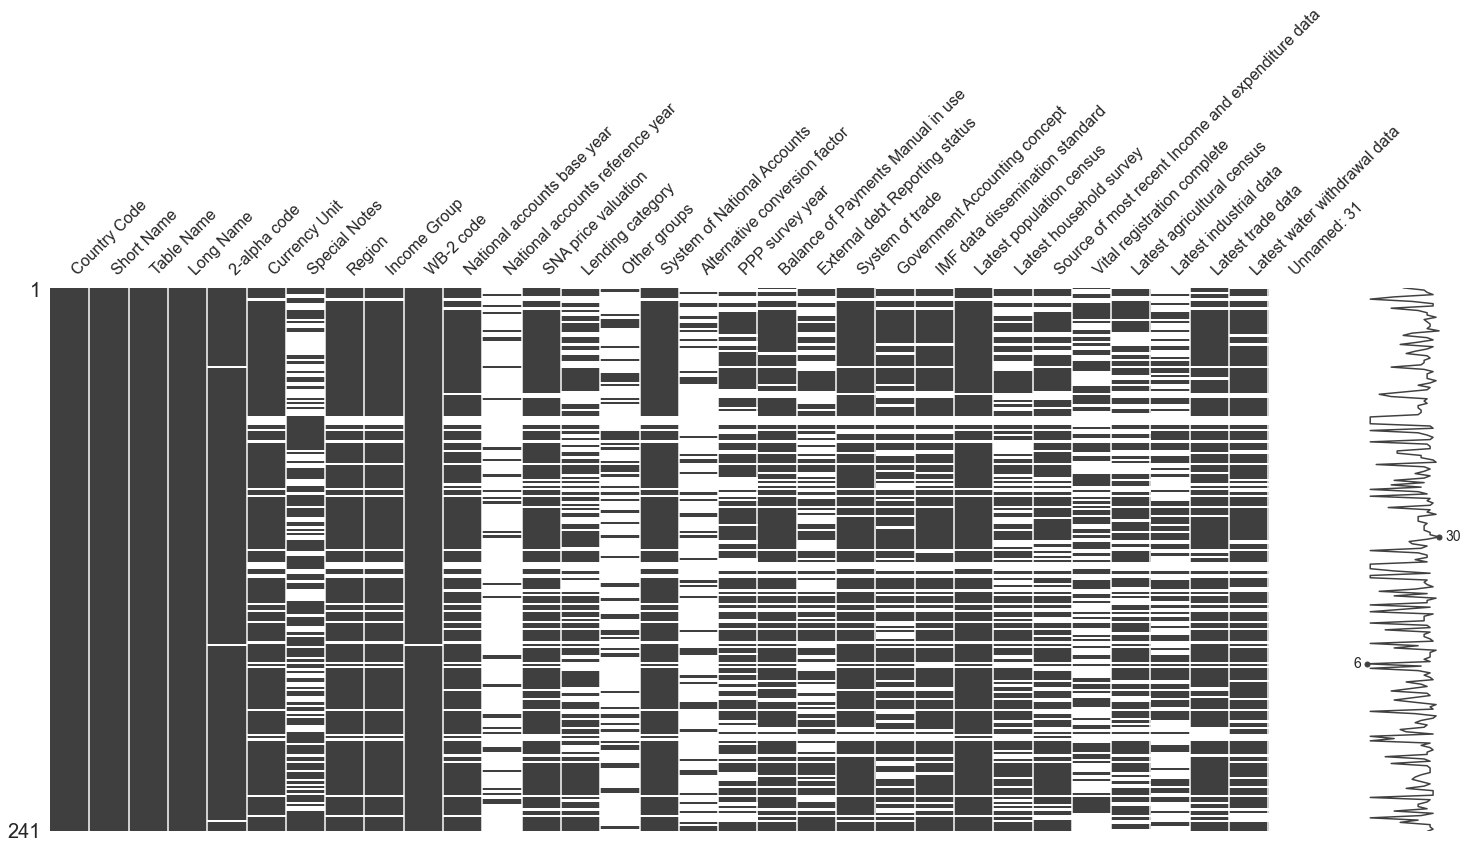

In [6]:
# Let's use  "msno" class and its methods .matrix() and .bar() given in the ressources of this project to check missing data
msno.matrix(df_edstats_country)

<AxesSubplot:>

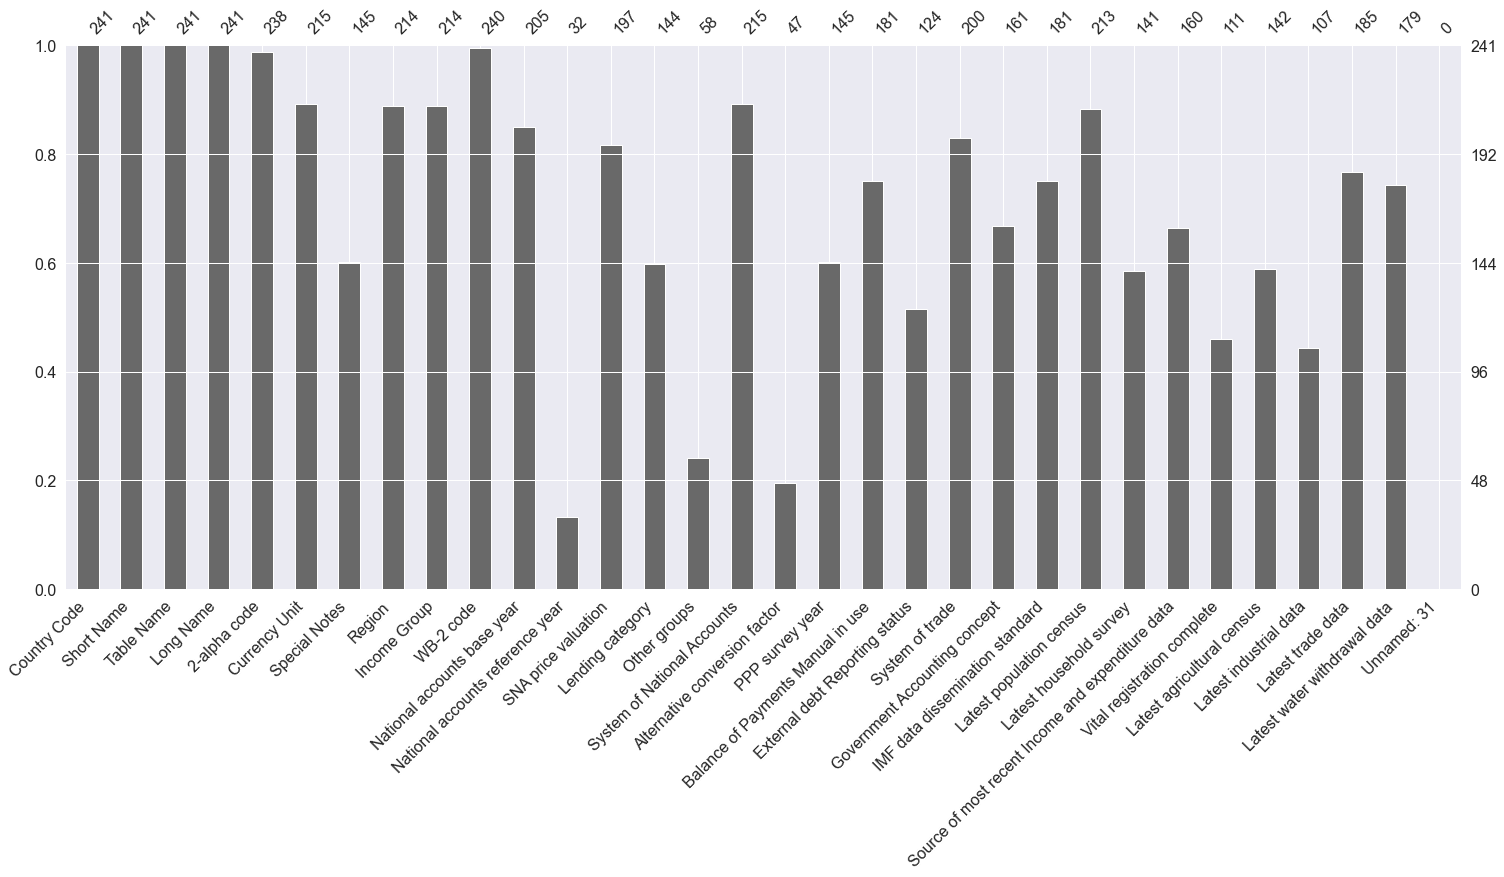

In [7]:
# Check missing data
msno.bar(df_edstats_country)

In [8]:
# Display % of missing data for each column 
df_edstats_country.isnull().mean()

Country Code                                         0.000000
Short Name                                           0.000000
Table Name                                           0.000000
Long Name                                            0.000000
2-alpha code                                         0.012448
Currency Unit                                        0.107884
Special Notes                                        0.398340
Region                                               0.112033
Income Group                                         0.112033
WB-2 code                                            0.004149
National accounts base year                          0.149378
National accounts reference year                     0.867220
SNA price valuation                                  0.182573
Lending category                                     0.402490
Other groups                                         0.759336
System of National Accounts                          0.107884
Alternat

## Clean - Ignore rows with "NaN" Region (fake countries)

In [9]:
# Let's ignore countries for which "Region" variable is not filled 
# These are supposedly not real countries
df_edstats_country_cleaned = df_edstats_country[df_edstats_country['Region'].notna()]

# Print number of rows after cleaning
print(str(len(df_edstats_country_cleaned)) + " " + "rows in df_edstats_country_cleaned dataframe")

# Show
df_edstats_country_cleaned['Short Name'].unique()

214 rows in df_edstats_country_cleaned dataframe


array(['Aruba', 'Afghanistan', 'Angola', 'Albania', 'Andorra',
       'United Arab Emirates', 'Argentina', 'Armenia', 'American Samoa',
       'Antigua and Barbuda', 'Australia', 'Austria', 'Azerbaijan',
       'Burundi', 'Belgium', 'Benin', 'Burkina Faso', 'Bangladesh',
       'Bulgaria', 'Bahrain', 'The Bahamas', 'Bosnia and Herzegovina',
       'Belarus', 'Belize', 'Bermuda', 'Bolivia', 'Brazil', 'Barbados',
       'Brunei', 'Bhutan', 'Botswana', 'Central African Republic',
       'Canada', 'Switzerland', 'Channel Islands', 'Chile', 'China',
       "Côte d'Ivoire", 'Cameroon', 'Dem. Rep. Congo', 'Congo',
       'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica', 'Cuba',
       'Curaçao', 'Cayman Islands', 'Cyprus', 'Czech Republic', 'Germany',
       'Djibouti', 'Dominica', 'Denmark', 'Dominican Republic', 'Algeria',
       'Ecuador', 'Egypt', 'Eritrea', 'Spain', 'Estonia', 'Ethiopia',
       'Finland', 'Fiji', 'France', 'Faeroe Islands', 'Micronesia',
       'Gabon', 'United Kingdom

In [10]:
# Display ignored countries 
fake_countries = df_edstats_country[~df_edstats_country['Region'].notna()]
print(str(len(fake_countries)) + " " + "rows in df_fake_countries dataframe")
fake_countries['Short Name']
# There are 27 ignored countries
# We can see geographic zones (Arab World, North America,...), geographic zones by developement level or income level (East Asia & Pacific (developing only),...), small countries (Nauru, Gibraltar), income categories (High Income, Low Income,...) or other categories (Indebted, OECD members, Least developed,...)
# These data are to be excluded from our anaylsis 

27 rows in df_fake_countries dataframe


5                                          Arab World
57              East Asia & Pacific (developing only)
58            East Asia & Pacific (all income levels)
59            Europe & Central Asia (developing only)
60          Europe & Central Asia (all income levels)
63                                          Euro area
68                                     European Union
78                                          Gibraltar
89                                        High income
92             Heavily indebted poor countries (HIPC)
116       Latin America & Caribbean (developing only)
122     Latin America & Caribbean (all income levels)
123      Least developed countries: UN classification
124                                        Low income
127                               Lower middle income
128                               Low & middle income
140    Middle East & North Africa (all income levels)
143                                     Middle income
148      Middle East & North

In [11]:
# From now on we will work on 'Country Code' variable because this indicator is common to the diffrent files and is unambiguous
# The global variable 'REFERENCE_VARIABLE' is set to 'Country Code' but also on 'Country Name' and 'Region' for convenience puproses (cf. utils.py)


# EdStatsData.csv

## Initial analysis

In [12]:
# Let's convert EdStatsData.csv file into a Pandas dataframe 
# "create_dataframe_from_csv_file" function is in utils.py. It factors some code which will be repeated for each csv. file conversion into a pandas dataframe
df_edstats_data = create_dataframe_from_csv_file("EdStatsData.csv")

# Show
df_edstats_data.head(5)

886930 rows in dataframe
70 columns in dataframe
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')


Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975       1976  \
0        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN        NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  60.999962   

       1977      1978       1979       1980       1981       1982       1983  \
0       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
1       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
2       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
3       NaN       NaN        NaN        NaN        NaN        NaN        NaN   
4  61.92268  62.69342  64.383186  65.617767  66.085152  66.608139  67.290451   

        1984       1985       1986      1987       1988       1989       1990  \
0        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN       NaN        NaN        NaN        NaN   
4  68.510094  69.033211  69.944908  71.04187  71.693779  71.699097  71.995819   

        1991       1992       1993       1994      1995       1996       1997  \
0        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN       NaN        NaN        NaN   
4  72.602837  70.032722  70.464821  72.645683  71.81176  73.903511  74.425201   

        1998       1999       2000       2001       2002       2003  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4  75.110817  76.254318  77.245682  78.800522  80.051399  80.805389   

        2004       2005       2006       2007       2008       2009  \
0        NaN        NaN        NaN        NaN        NaN        NaN   
1        NaN        NaN        NaN        NaN        NaN        NaN   
2        NaN        NaN        NaN        NaN        NaN        NaN   
3        NaN        NaN        NaN        NaN        NaN        NaN   
4  81.607063  82.489487  82.685509  83.280342  84.011871  84.195961   

        2010      2011       2012      2013       2014  2015  2016  2017  \
0        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
1        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
2        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
3        NaN       NaN        NaN       NaN        NaN   NaN   NaN   NaN   
4  85.211998  85.24514  86.101669  85.51194  85.320152   NaN   NaN   NaN   

   2020  2025  2030  2035  2040  2045  2050  2055  2060  2065  2070  2075  \
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

In [13]:
# Check number of unique countries in this file, 'Country Code' : 241
df_edstats_data.describe(include = "all")

Country Name Country Code  \
count                886930       886930   
unique                  242          242   
top     St. Kitts and Nevis          KHM   
freq                   3665         3665   
mean                    NaN          NaN   
std                     NaN          NaN   
min                     NaN          NaN   
25%                     NaN          NaN   
50%                     NaN          NaN   
75%                     NaN          NaN   
max                     NaN          NaN   

                                           Indicator Name  \
count                                              886930   
unique                                               3665   
top     EGRA: Listening Comprehension - Share of stude...   
freq                                                  242   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

             Indicator Code          1970          1971          1972  \
count                886930  7.228800e+04  3.553700e+04  3.561900e+04   
unique                 3665           NaN           NaN           NaN   
top     UIS.EA.UK.AG25T99.F           NaN           NaN           NaN   
freq                    242           NaN           NaN           NaN   
mean                    NaN  1.974772e+09  4.253638e+09  4.592365e+09   
std                     NaN  1.211687e+11  1.804814e+11  1.914083e+11   
min                     NaN -1.435564e+00 -1.594625e+00 -3.056522e+00   
25%                     NaN  8.900000e-01  8.853210e+00  9.240920e+00   
50%                     NaN  6.317724e+00  6.316240e+01  6.655139e+01   
75%                     NaN  6.251250e+01  5.655200e+04  5.863650e+04   
max                     NaN  1.903929e+13  1.986457e+13  2.100916e+13   

                1973          1974          1975          1976          1977  \
count   3.554500e+04  3.573000e+04  8.730600e+04  3.748300e+04  3.757400e+04   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    5.105006e+09  5.401493e+09  2.314288e+09  5.731808e+09  6.124437e+09   
std     2.059170e+11  2.112150e+11  1.375059e+11  2.215546e+11  2.325489e+11   
min    -4.032582e+00 -4.213563e+00 -3.658569e+00 -2.950945e+00 -3.174870e+00   
25%     9.595200e+00  9.861595e+00  1.400000e+00  9.312615e+00  9.519913e+00   
50%     6.969595e+01  7.087760e+01  9.677420e+00  7.101590e+01  7.133326e+01   
75%     6.202900e+04  6.383675e+04  7.854163e+01  5.682800e+04  5.739175e+04   
max     2.238367e+13  2.282991e+13  2.300634e+13  2.424128e+13  2.521383e+13   

                1978          1979          1980          1981          1982  \
count   3.757600e+04  3.680900e+04  8.912200e+04  3.877700e+04  3.751100e+04   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    6.671489e+09  7.436724e+09  3.283898e+09  7.664969e+09  7.913722e+09   
std     2.473986e+11  2.660957e+11  1.780774e+11  2.744142e+11  2.790549e+11   
min    -3.558749e+00 -2.973612e+00 -1.404240e+00 -1.478345e+00 -2.358765e+00   
25%     1.000000e+01  1.000000e+01  1.770000e+00  9.468690e+00  9.989330e+00   
50%     7.290512e+01  7.510173e+01  1.107000e+01  7.467213e+01  7.710972e+01   
75%     5.940425e+04  6.411500e+04  8.202760e+01  6.310400e+04  6.923300e+04   
max     2.622101e+13  2.730873e+13 

In [14]:
# Type of data
df_edstats_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

<AxesSubplot:>

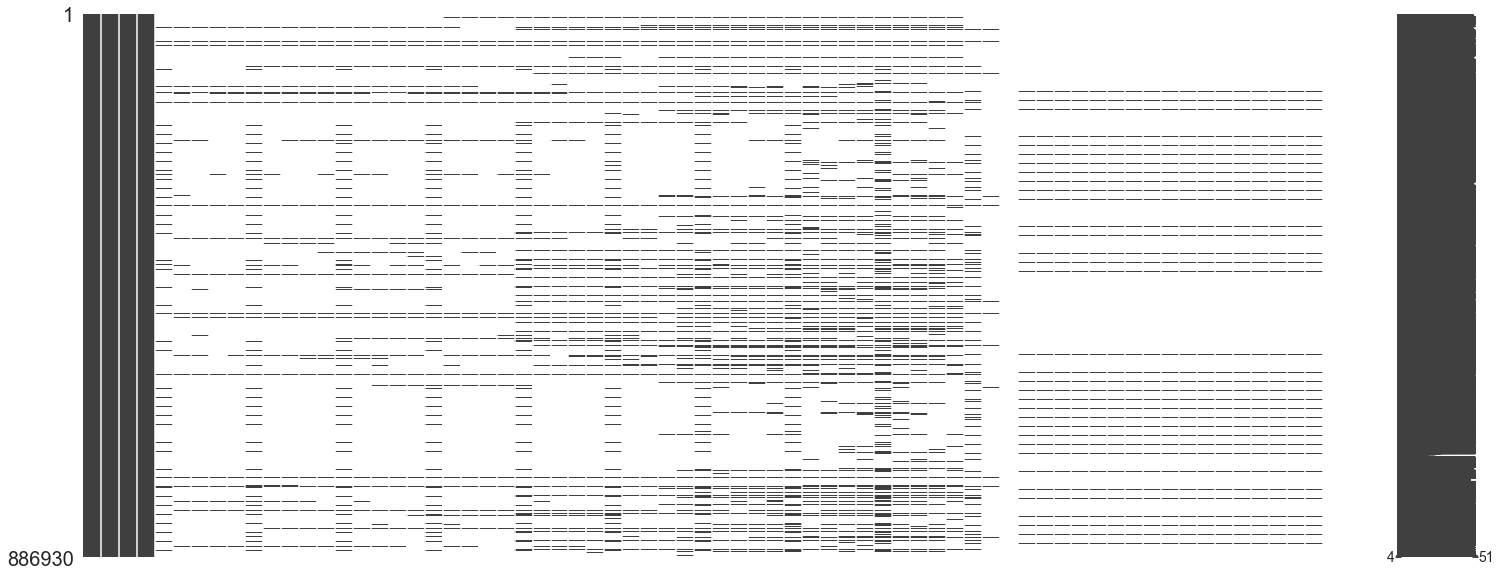

In [15]:
# Let's use  "msno" class and its methods .matrix() and .bar() given in the ressources of this project in order to check missing data
msno.matrix(df_edstats_data)

<AxesSubplot:>

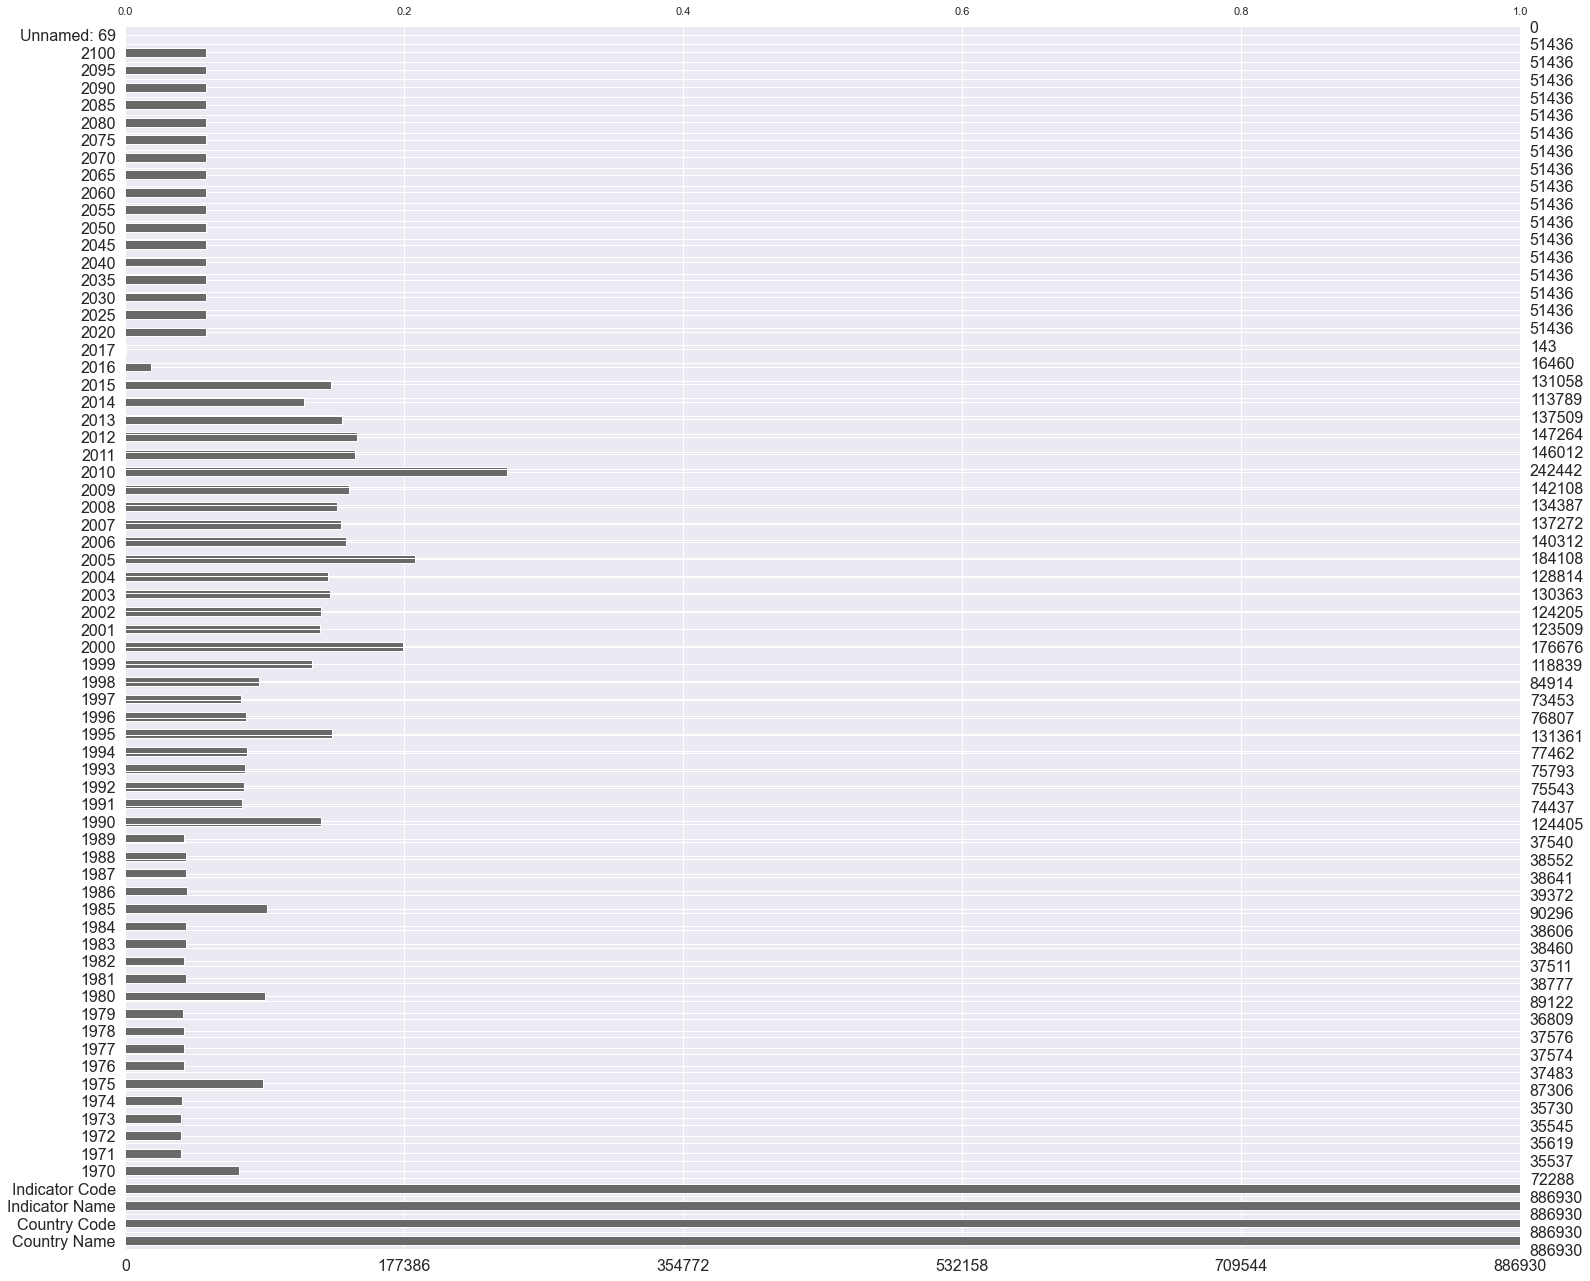

In [153]:
# Check missing data
msno.bar(df_edstats_data)

In [154]:
# Display % of missing data for each column 
df_edstats_data.isnull().mean()

Country Name      0.000000
Country Code      0.000000
Indicator Name    0.000000
Indicator Code    0.000000
1970              0.918496
                    ...   
2085              0.942007
2090              0.942007
2095              0.942007
2100              0.942007
Unnamed: 69       1.000000
Length: 70, dtype: float64

In [155]:
# Display % of missing data for dataframe
df_edstats_data.isnull().mean().mean()

0.8609985165522801

## Pre filter - Use countries from df_edstats_country_cleaned by merging

In [156]:
# First of all let's compare countries in Country with countries in Data

# All countries in Data are in Country at the exception of "Virgin Islands" 
set(df_edstats_data["Country Code"].unique()).difference(set(df_edstats_country["Country Code"].unique()))

{'VGB'}

In [157]:
# All countries in Country are in Data
set(df_edstats_country["Country Code"].unique()).difference(set(df_edstats_data["Country Code"].unique()))

set()

In [158]:
# Second let's compare countries in Country cleaned with countries in Data

# Countries differing between Data and Country cleaned are exactly the same ones as the ones in 'fake_countries' of Country at the exception of 'Virgin Islands' specific to Data
set(df_edstats_data["Country Code"].unique()).difference(set(df_edstats_country_cleaned["Country Code"].unique()))

{'ARB',
 'EAP',
 'EAS',
 'ECA',
 'ECS',
 'EMU',
 'EUU',
 'GIB',
 'HIC',
 'HPC',
 'LAC',
 'LCN',
 'LDC',
 'LIC',
 'LMC',
 'LMY',
 'MEA',
 'MIC',
 'MNA',
 'NAC',
 'NRU',
 'OED',
 'SAS',
 'SSA',
 'SSF',
 'UMC',
 'VGB',
 'WLD'}

In [159]:
# All countries in Country cleaned are in Data
set(df_edstats_country_cleaned["Country Code"].unique()).difference(set(df_edstats_data["Country Code"].unique()))

set()

In [160]:
# To sum up we will use the countries from df_edstats_country_cleaned for the rest of the study. It allows us to dismiss the non relevant rows of the non-countries.
# We will use a merge between the two tables to proceed.


In [161]:
# Select relevant columns from Country dataframe and merge them with Data dataframe on 'Country Code'
merge_df_edstats_country_cleaned_with_df_edstats_data = pd.merge(df_edstats_country_cleaned[['Country Code', 'Short Name', 'Long Name', 'Region', 'Currency Unit', 'Income Group']], df_edstats_data, left_on = 'Country Code', right_on = 'Country Code')

# Sort values
df_edstats_data_with_country_cleaned_sorted_by_country_code = merge_df_edstats_country_cleaned_with_df_edstats_data.sort_values(by = ["Country Code"])

# Show
df_edstats_data_with_country_cleaned_sorted_by_country_code.head(5)


Country Code Short Name Long Name                     Region  \
0             ABW      Aruba     Aruba  Latin America & Caribbean   
2437          ABW      Aruba     Aruba  Latin America & Caribbean   
2438          ABW      Aruba     Aruba  Latin America & Caribbean   
2439          ABW      Aruba     Aruba  Latin America & Caribbean   
2440          ABW      Aruba     Aruba  Latin America & Caribbean   

      Currency Unit          Income Group Country Name  \
0     Aruban florin  High income: nonOECD        Aruba   
2437  Aruban florin  High income: nonOECD        Aruba   
2438  Aruban florin  High income: nonOECD        Aruba   
2439  Aruban florin  High income: nonOECD        Aruba   
2440  Aruban florin  High income: nonOECD        Aruba   

                                         Indicator Name     Indicator Code  \
0     Adjusted net enrolment rate, lower secondary, ...         UIS.NERA.2   
2437                      Population, ages 10-18, total  SP.POP.1018.TO.UN   
2438                     Population, ages 11-15, female  SP.POP.1115.FE.UN   
2439                       Population, ages 11-15, male  SP.POP.1115.MA.UN   
2440                      Population, ages 11-15, total  SP.POP.1115.TO.UN   

      1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  \
0      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2437   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2438   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2439   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2440   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

      1982  1983  1984  1985  1986  1987  1988  1989    1990    1991    1992  \
0      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN     NaN     NaN   
2437   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  8385.0  8899.0  9138.0   
2438   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  2334.0  2526.0  2591.0   
2439   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  2349.0  2599.0  2673.0   
2440   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  4683.0  5125.0  5264.0   

        1993    1994     1995     1996     1997     1998         1999  \
0        NaN     NaN      NaN      NaN      NaN      NaN     59.33213   
2437  9524.0  9780.0  10103.0  10493.0  10728.0  10997.0  11044.00000   
2438  2695.0  2769.0   2864.0   2982.0   3054.0   3131.0   3171.00000   
2439  2783.0  2871.0   2950.0   3057.0   3108.0   3162.0   3172.00000   
2440  5478.0  5640.0   5814.0   6039.0   6162.0   6293.0   6343.00000   

              2000          2001         2002         2003         2004  \
0        56.156502     45.716419     52.99646     49.96508     53.09684   
2437  11819.000000  11936.000000  12288.00000  12640.00000  13036.00000   
2438   3336.000000   3378.000000   3481.00000   3596.00000   3662.00000   
2439   3350.000000   3403.000000   3493.00000   3615.00000   3703.00000   
2440   6686.000000   6781.000000   6974.00000   7211.00000   7365.00000   

              2005     2006          2007          2008          2009  \
0        59.058441      NaN     60.718788     60.643719     62.808041   
2437  13273.000000  13370.0  13354.000000  13269.000000  13176.000000   
2438   3700.000000   3724.0   3715.000000   3684.000000   3650.000000   
2439   3761.000000   3789.0   3783.000000   3759.000000   3734.000000   
2440   7461.000000   7513.0   7498.000000   7443.000000   7384.000000   

         2010          2011     2012     2013     2014     2015  2016  2017  \
0         NaN     78.047157      NaN      NaN      NaN      NaN   NaN   NaN   
2437  13118.0  13112.000000  13137.0  13178.0  13217.0  13225.0   NaN   NaN   
2438   3626.0   3616.000000   3615.0   3617.0   3621.0   3617.0   NaN   NaN   
2439   3716.0   3715.000000   3724.0   3734.0   3744.0   3746.0   NaN   NaN   
2440   7342.0   7331.000000   7339.0   7351.0   7365.0   7363.0   NaN   NaN   

      

<AxesSubplot:>

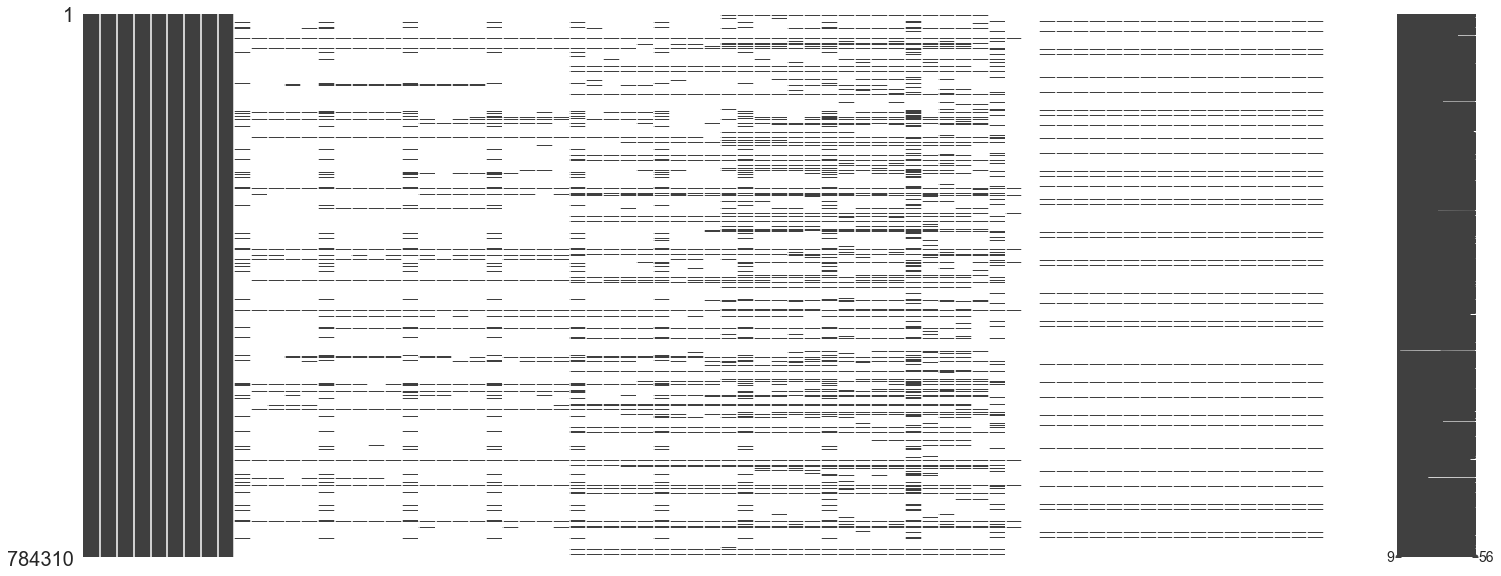

In [162]:
# Let's use  "msno" class and its methods .matrix() and .bar() given in the ressources of this project in order to check missing data
msno.matrix(df_edstats_data_with_country_cleaned_sorted_by_country_code)

## Variable "Internet users (per 100 people)"

In [163]:
# Selected variables are summed up in Indicators.txt

### Initial Analysis

In [164]:
# Let's create a sub dataframe stemming from Data for 'Internet users (per 100 people)' variable called df_internet_users
# 'create_dataframe_from_given_dataframe_and_variable' function is defined in utils.py. 
# This function extracts rows for which Indicator Name equals 'Internet users (per 100 people)' and it factors code which will be repeated for each sub dataframe creation stemming from Data. 
df_internet_users = create_dataframe_from_given_dataframe_and_variable(df_edstats_data_with_country_cleaned_sorted_by_country_code, "Internet users (per 100 people)")

# Show
df_internet_users.head(5)

214 rows in dataframe
75 columns in dataframe
Index(['Country Code', 'Short Name', 'Long Name', 'Region', 'Currency Unit',
       'Income Group', 'Country Name', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')


Country Code   Short Name                     Long Name  \
1375           ABW        Aruba                         Aruba   
5040           AFG  Afghanistan  Islamic State of Afghanistan   
8705           AGO       Angola   People's Republic of Angola   
12370          ALB      Albania           Republic of Albania   
16035          AND      Andorra       Principality of Andorra   

                          Region   Currency Unit          Income Group  \
1375   Latin America & Caribbean   Aruban florin  High income: nonOECD   
5040                  South Asia  Afghan afghani            Low income   
8705          Sub-Saharan Africa  Angolan kwanza   Upper middle income   
12370      Europe & Central Asia    Albanian lek   Upper middle income   
16035      Europe & Central Asia            Euro  High income: nonOECD   

      Country Name                   Indicator Name  Indicator Code  1970  \
1375         Aruba  Internet users (per 100 people)  IT.NET.USER.P2   NaN   
5040   Afghanistan  Internet users (per 100 people)  IT.NET.USER.P2   NaN   
8705        Angola  Internet users (per 100 people)  IT.NET.USER.P2   NaN   
12370      Albania  Internet users (per 100 people)  IT.NET.USER.P2   NaN   
16035      Andorra  Internet users (per 100 people)  IT.NET.USER.P2   NaN   

       1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  1982  \
1375    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5040    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8705    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
12370   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
16035   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  1994  \
1375    NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   
5040    NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   
8705    NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   
12370   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   
16035   NaN   NaN   NaN   NaN   NaN   NaN   NaN   0.0   NaN   NaN   NaN   NaN   

           1995      1996      1997      1998      1999       2000       2001  \
1375        NaN  2.768383       NaN       NaN  4.506179  15.442823  17.100000   
5040        NaN       NaN       NaN       NaN       NaN        NaN   0.004723   
8705        NaN  0.000776  0.005674  0.018454  0.071964   0.105046   0.136014   
12370  0.011169  0.032197  0.048594  0.065027  0.081437   0.114097   0.325798   
16035       NaN  1.526601  3.050175  6.886209  7.635686  10.538836        NaN   

            2002       2003       2004       2005       2006       2007  \
1375   18.800000  20.800000  23.000000  25.400000  28.000000  30.900000   
5040    0.004561   0.087891   0.105809   1.224148   2.107124   1.900000   
8705    0.270377   0.370682   0.464815   1.143367   1.500000   1.700000   
12370   0.390081   0.971900   2.420388   6.043891   9.609991  15.036115   
16035  11.260469  13.546413  26.837954  37.605766  48.936847  70.870000   

        2008   2009  2010  2011       2012  2013   2014       2015       2016  \
1375   52.00  58.00  62.0  69.0  74.000000  78.9  83.78  88.661227  93.542454   
5040    1.84   3.55   4.0   5.0   5.454545   5.9   7.00   8.260000  10.595726   
8705    1.90   2.30   2.8   3.1   6.500000   8.9  10.20  12.400000  13.000000   
12370  23.86  41.20  45.0  49.0  54.655959  57.2  60.10  63.252933  66.363445   
16035  70.04  78.53  81.0  81.0  86.434425  94.0  95.90  96.910000  97.930637   

       2017  2020  2025  2030  2035  2040  2045  2050  2055  2060  2065  2070  \
1375    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
5040    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8705    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [165]:
# Check stats
df_internet_users.describe()

1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  \
count   7.0   0.0   0.0   0.0   0.0   7.0   7.0   7.0   7.0   7.0   7.0   7.0   
mean    0.0   NaN   NaN   NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
std     0.0   NaN   NaN   NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
min     0.0   NaN   NaN   NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
25%     0.0   NaN   NaN   NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
50%     0.0   NaN   NaN   NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
75%     0.0   NaN   NaN   NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
max     0.0   NaN   NaN   NaN   NaN   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

       1982  1983  1984  1985  1986  1987  1988  1989        1990       1991  \
count   7.0   7.0   7.0   7.0   7.0   7.0   7.0   8.0  205.000000  39.000000   
mean    0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.024551   0.280305   
std     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.110711   0.439930   
min     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.000000   0.000000   
25%     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.000000   0.003335   
50%     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.000000   0.048789   
75%     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.000000   0.254678   
max     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    0.784729   1.407395   

            1992       1993       1994        1995        1996        1997  \
count  50.000000  65.000000  91.000000  138.000000  171.000000  180.000000   
mean    0.399037   0.463765   0.665616    0.954541    1.460657    2.471251   
std     0.623811   0.745376   1.272152    2.107824    3.200340    5.014548   
min     0.000000   0.000000   0.000000    0.000000    0.000000    0.000000   
25%     0.003524   0.006678   0.004305    0.007701    0.012160    0.031328   
50%     0.073449   0.122462   0.055487    0.083984    0.192725    0.334983   
75%     0.423192   0.519762   0.707450    0.731584    1.230359    2.195542   
max     2.216366   2.783991   6.794812   13.900304   18.250311   27.478869   

             1998        1999        2000        2001        2002        2003  \
count  186.000000  193.000000  195.000000  196.000000  198.000000  192.000000   
mean     3.941828    5.917855    8.709802   10.726869   13.638411   16.247703   
std      7.381244   10.299427   13.322787   15.551448   18.494974   20.471585   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.067169    0.146669    0.359502    0.431238    1.029851    1.514017   
50%      0.629826    1.119909    2.434398    2.973655    4.613088    6.608140   
75%      3.336675    5.456444    9.282820   13.566060   19.227500   23.932815   
max     36.264207   42.803316   52.000000   64.000000   79.120000   83.140000   

             2004        2005        2006        2007        2008        2009  \
count  195.000000  197.000000  196.000000  203.000000  202.000000  201.000000   
mean    18.678142   20.854323   23.416416   25.472095   28.280368   30.952151   
std     21.871312   23.079793   24.191474   25.273241   26.270160   27.008789   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      2.137762    2.851752    3.753439    4.250000    5.612500    6.920000   
50%      8.528818   11.483198   14.513474   16.300000   21.385000   26.000000   
75%     27.958955   34.000000   37.995000   40.780000   45.632500   50.800000   
max     83.890000   87.000000   89.510000   90.600000   91.000000   93.000000   

             2010        2011        2012        2013        2014        2015  \
count  201.000000  203.000000  201.000000  201.000000  201.000000  201.000000   
mean    34.107044   36.834036   39.900525   42.854551   45.790927   48.785759   
std     27.404923   27.900390   28.594727   28.973733   28.837174   28.542027   
min      0.000000    0.000000    0.000000    0.900000    0.990000    

In [166]:
# Check data type
df_internet_users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1375 to 782020
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    214 non-null    object 
 1   Short Name      214 non-null    object 
 2   Long Name       214 non-null    object 
 3   Region          214 non-null    object 
 4   Currency Unit   214 non-null    object 
 5   Income Group    214 non-null    object 
 6   Country Name    214 non-null    object 
 7   Indicator Name  214 non-null    object 
 8   Indicator Code  214 non-null    object 
 9   1970            7 non-null      float64
 10  1971            0 non-null      float64
 11  1972            0 non-null      float64
 12  1973            0 non-null      float64
 13  1974            0 non-null      float64
 14  1975            7 non-null      float64
 15  1976            7 non-null      float64
 16  1977            7 non-null      float64
 17  1978            7 non-null   

<AxesSubplot:>

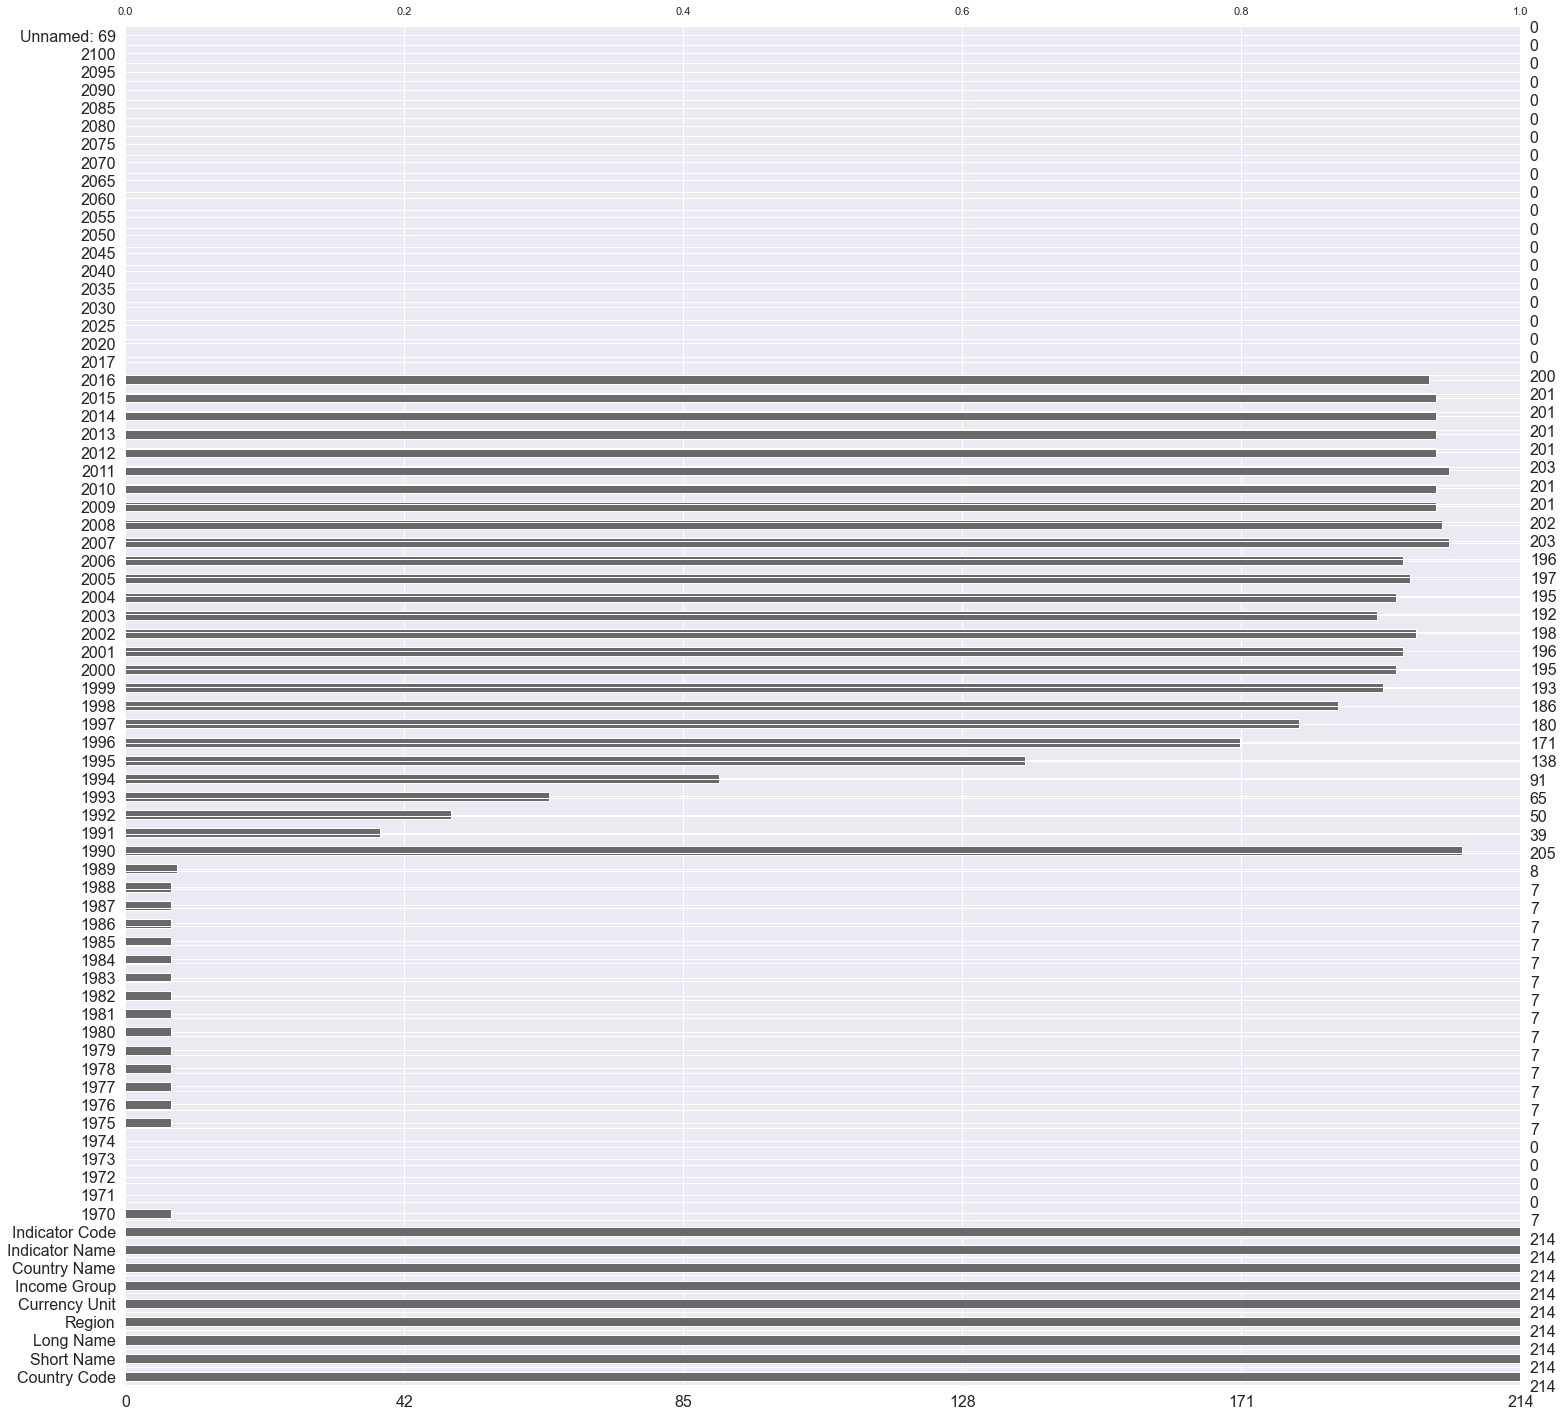

In [167]:
#Check missing data
msno.bar(df_internet_users)

### Select columns from 2006 to 2016

In [168]:
# Let's start by slecting the relevant time columns for the study of our variable. 
# 'select_columns' function is defined in utils.py. 

# Discussion :
# Only the most recent years are of relevance for this indicator but we will select the last 10 years for exploration puproses.
# (cf. Plot 1 section) 
df_internet_users_subset = select_columns(df_internet_users, '2006', '2016')

#Change index to "REFERENCE_VARIABLE"
df_internet_users_subset = df_internet_users_subset.set_index(REFERENCE_VARIABLE)

#Show
df_internet_users_subset

2006       2007  \
Country Name Country Code Region                                             
Aruba        ABW          Latin America & Caribbean   28.000000  30.900000   
Afghanistan  AFG          South Asia                   2.107124   1.900000   
Angola       AGO          Sub-Saharan Africa           1.500000   1.700000   
Albania      ALB          Europe & Central Asia        9.609991  15.036115   
Andorra      AND          Europe & Central Asia       48.936847  70.870000   
...                                                         ...        ...   
Kosovo       XKX          Europe & Central Asia             NaN        NaN   
Yemen, Rep.  YEM          Middle East & North Africa   1.247824   5.010000   
South Africa ZAF          Sub-Saharan Africa           7.607140   8.065375   
Zambia       ZMB          Sub-Saharan Africa           4.159913   4.870000   
Zimbabwe     ZWE          Sub-Saharan Africa           2.400000   3.000000   

                                                       2008   2009   2010  \
Country Name Country Code Region                                            
Aruba        ABW          Latin America & Caribbean   52.00  58.00  62.00   
Afghanistan  AFG          South Asia                   1.84   3.55   4.00   
Angola       AGO          Sub-Saharan Africa           1.90   2.30   2.80   
Albania      ALB          Europe & Central Asia       23.86  41.20  45.00   
Andorra      AND          Europe & Central Asia       70.04  78.53  81.00   
...                                                     ...    ...    ...   
Kosovo       XKX          Europe & Central Asia         NaN    NaN    NaN   
Yemen, Rep.  YEM          Middle East & North Africa   6.89   9.96  12.35   
South Africa ZAF          Sub-Saharan Africa           8.43  10.00  24.00   
Zambia       ZMB          Sub-Saharan Africa           5.55   6.31  10.00   
Zimbabwe     ZWE          Sub-Saharan Africa           3.50   4.00   6.40   

                                                        2011       2012  2013  \
Country Name Country Code Region                                                
Aruba        ABW          Latin America & Caribbean   69.000  74.000000  78.9   
Afghanistan  AFG          South Asia                   5.000   5.454545   5.9   
Angola       AGO          Sub-Saharan Africa           3.100   6.500000   8.9   
Albania      ALB          Europe & Central Asia       49.000  54.655959  57.2   
Andorra      AND          Europe & Central Asia       81.000  86.434425  94.0   
...                                                      ...        ...   ...   
Kosovo       XKX          Europe & Central Asia          NaN        NaN   NaN   
Yemen, Rep.  YEM          Middle East & North Africa  14.905  17.446500  20.0   
South Africa ZAF          Sub-Saharan Africa          33.970  41.000000  46.5   
Zambia       ZMB          Sub-Saharan Africa          11.500  13.468200  15.4   
Zimbabwe     ZWE          Sub-Saharan Africa           8.400  12.000000  15.5   

                                                          2014       2015  \
Country Name Country Code Region                                            
Aruba        ABW          Latin America & Caribbean   83.78000  88.661227   
Afghanistan  AFG          South Asia                   7.00000   8.260000   
Angola       AGO          Sub-Saharan Africa          10.20000  12.400000   
Albania      ALB          Europe & Central Asia       60.10000  63.252933   
Andorra      AND          Europe & Central Asia       95.90000  96.910000   
...                                                        ...        ...   
Kosovo       XKX          Europe & Central Asia            NaN        NaN   
Yemen, Rep.  YEM          Middle East & North Africa  22.55000  24.085409   
South Africa ZAF          Sub-Saharan Africa          49.00000  51.919116   
Zambia       ZMB          Sub-Saharan Africa          19.00000  21.000000   
Zimbabwe     ZWE          Sub-Saharan Africa          16.36474  

<AxesSubplot:>

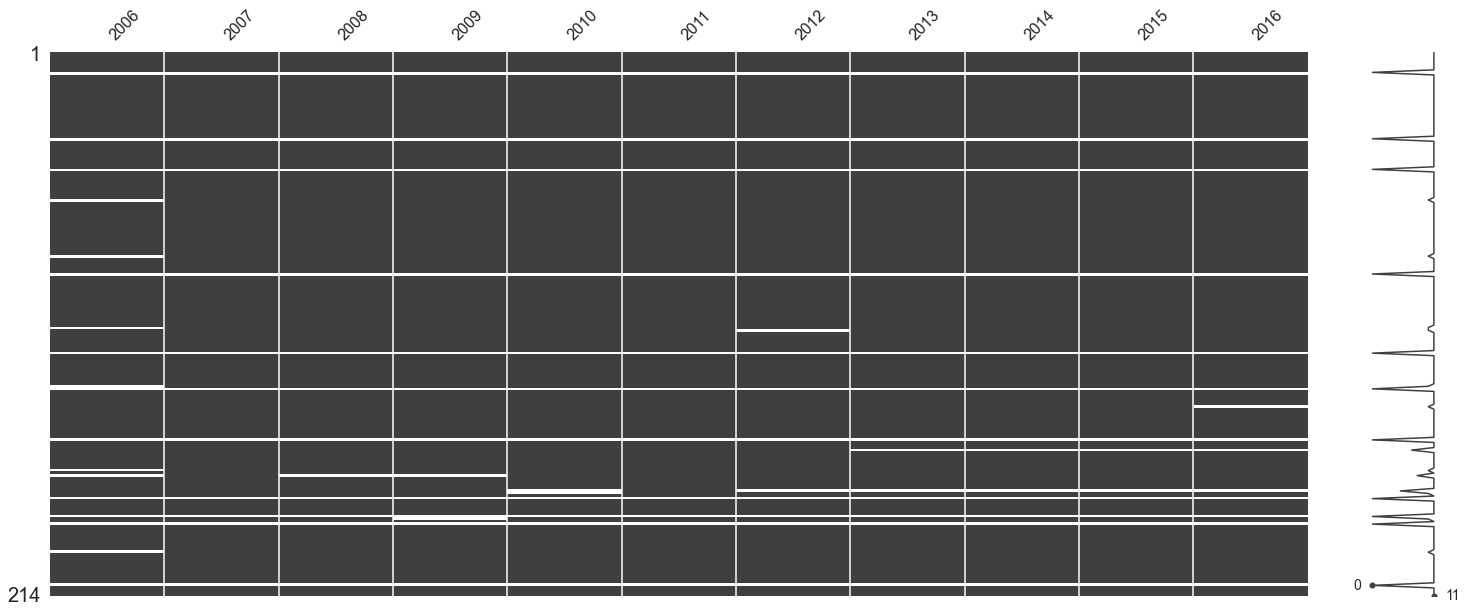

In [169]:
#Check missing data
msno.matrix(df_internet_users_subset)

<AxesSubplot:>

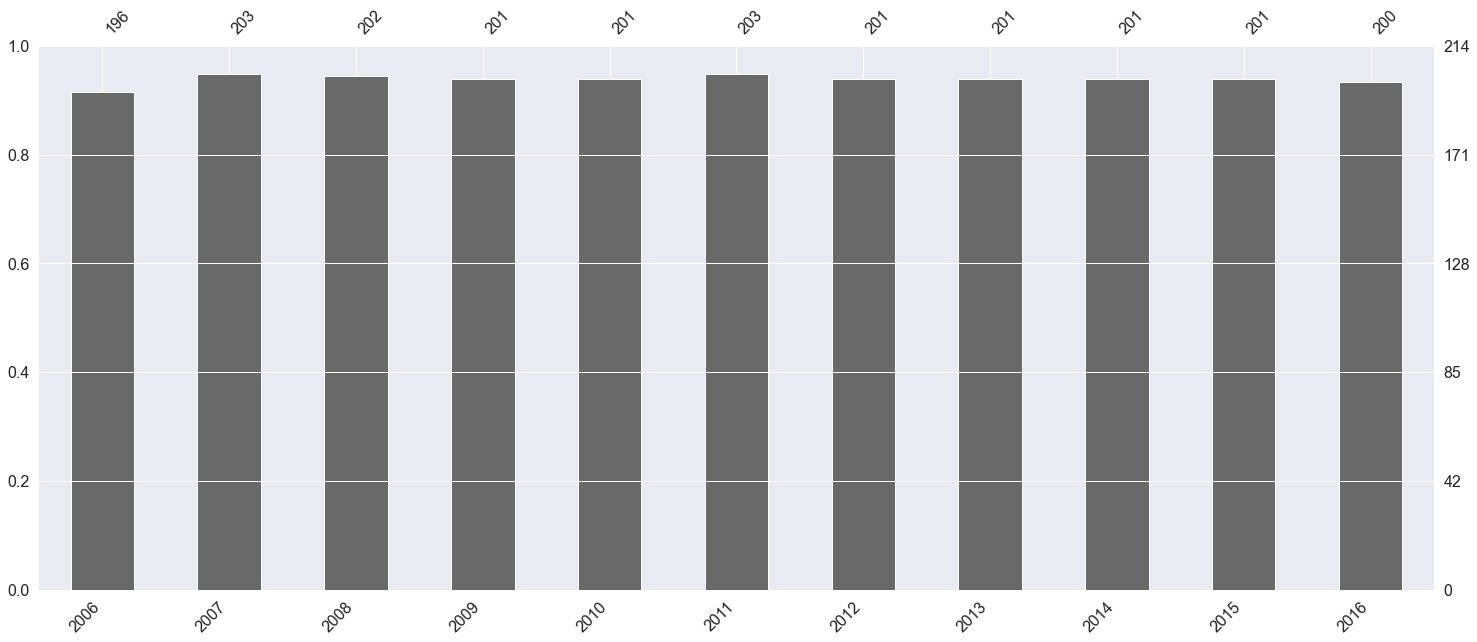

In [170]:
#Check missing data
msno.bar(df_internet_users_subset)

###  Clean 1 - Dismiss rows with full NaN values from 2006 to 2016

<AxesSubplot:>

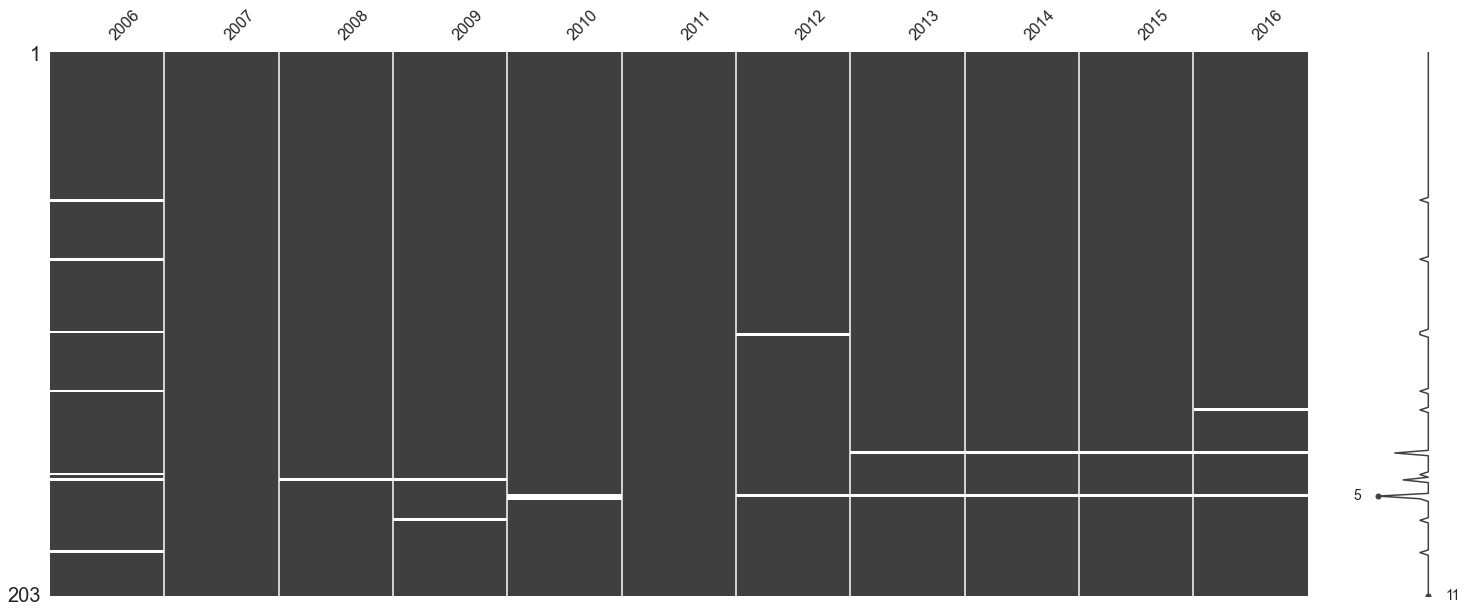

In [171]:
# First let's dismiss rows/countries for which no data is available from 2006 to 2016
df_internet_users_subset_cleaned1 = df_internet_users_subset.dropna(subset=['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'], how = 'all')

# Check missing data
msno.matrix(df_internet_users_subset_cleaned1)


### Clean 2 - Imputation by the last non-NaN value for any NaN value on each row

<AxesSubplot:>

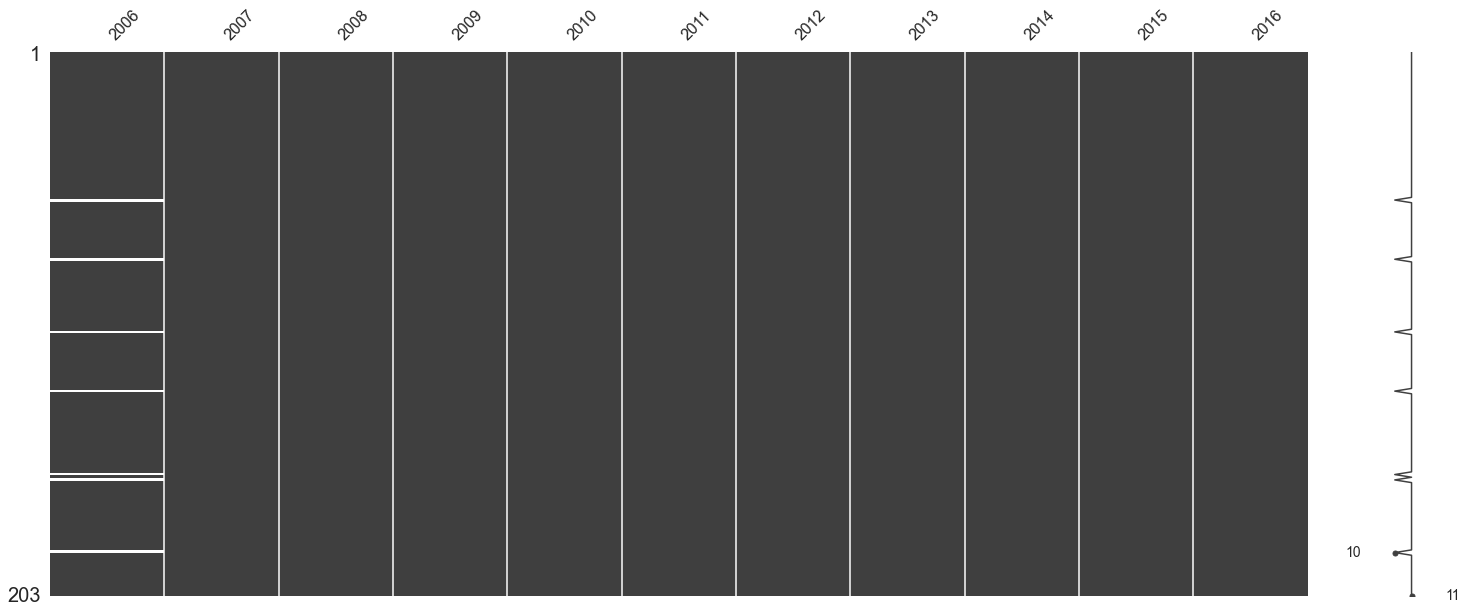

In [172]:
# Second let's impute by the last non-NaN value for any NaN value on each row
# Discussion :
# (cf. Plot 1 section)
df_internet_users_subset_cleaned2 = df_internet_users_subset_cleaned1.fillna(method = 'ffill', axis = 1)

# Check missing data
msno.matrix(df_internet_users_subset_cleaned2)
#df_internet_users_subset_cleaned2.info()

### Filter - Select rows with > X% internet users in 2016

In [173]:
df_internet_users_subset_cleaned2.describe()

2006        2007        2008        2009        2010        2011  \
count  196.000000  203.000000  203.000000  203.000000  203.000000  203.000000   
mean    23.416416   25.472095   28.183716   30.889076   34.043775   36.834036   
std     24.191474   25.273241   26.241213   26.928682   27.403724   27.900390   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      3.753439    4.250000    5.675000    7.045000    8.000000   10.035000   
50%     14.513474   16.300000   21.060000   26.000000   30.000000   34.950000   
75%     37.995000   40.780000   45.265000   50.721014   54.125000   57.744989   
max     89.510000   90.600000   91.000000   93.000000   93.390000   94.819687   

             2012        2013        2014        2015        2016  
count  203.000000  203.000000  203.000000  203.000000  203.000000  
mean    39.820717   42.676674   45.584120   48.549447   51.051608  
std     28.519171   28.990527   28.874871   28.606137   28.538088  
min      0.000000    0.000000    0.000000    0.000000    0.000000  
25%     12.540030   15.000000   17.650000   21.708049   25.306275  
50%     37.500000   43.300000   46.200000   50.139318   53.226773  
75%     62.124985   66.225000   69.890000   72.999350   76.143368  
max     96.209800   96.546800   98.160000   98.323610   98.240016

In [174]:
# Discussion :
# Our service requires a wide adoption of the internet among the population.
# We will set the limit at 1 inferior std from the mean.
# (cf. Plot 2 & 3)

# Compute lower limit (1 std below mean)
lower_limit = df_internet_users_subset_cleaned2["2016"].mean() - df_internet_users_subset_cleaned2["2016"].std()

# Select rows above limit 
df_internet_users_subset_cleaned2_superior_X_for_2016 = df_internet_users_subset_cleaned2[df_internet_users_subset_cleaned2['2016'] > lower_limit]

#Sort
df_internet_users_subset_cleaned2_superior_X_for_2016 = df_internet_users_subset_cleaned2_superior_X_for_2016.sort_values('2016', ascending=False)

# Show
df_internet_users_subset_cleaned2_superior_X_for_2016.head(10)


2006       2007  \
Country Name  Country Code Region                                             
Iceland       ISL          Europe & Central Asia       89.510000  90.600000   
Liechtenstein LIE          Europe & Central Asia       64.214161  65.080218   
Bermuda       BMU          North America               69.899655  74.350594   
Bahrain       BHR          Middle East & North Africa  28.243952  32.910000   
Andorra       AND          Europe & Central Asia       48.936847  70.870000   
Luxembourg    LUX          Europe & Central Asia       72.510000  78.920000   
Norway        NOR          Europe & Central Asia       82.550000  86.930000   
Denmark       DNK          Europe & Central Asia       86.650000  85.030000   
Monaco        MCO          Europe & Central Asia       61.476040  64.377682   
Faroe Islands FRO          Europe & Central Asia       69.359445  75.980000   

                                                        2008   2009   2010  \
Country Name  Country Code Region                                            
Iceland       ISL          Europe & Central Asia       91.00  93.00  93.39   
Liechtenstein LIE          Europe & Central Asia       70.00  75.00  80.00   
Bermuda       BMU          North America               82.30  83.25  84.21   
Bahrain       BHR          Middle East & North Africa  51.95  53.00  55.00   
Andorra       AND          Europe & Central Asia       70.04  78.53  81.00   
Luxembourg    LUX          Europe & Central Asia       82.23  87.31  90.62   
Norway        NOR          Europe & Central Asia       90.57  92.08  93.39   
Denmark       DNK          Europe & Central Asia       85.02  86.84  88.72   
Monaco        MCO          Europe & Central Asia       67.25  70.10  75.00   
Faroe Islands FRO          Europe & Central Asia       75.57  75.18  75.20   

                                                            2011       2012  \
Country Name  Country Code Region                                             
Iceland       ISL          Europe & Central Asia       94.819687  96.209800   
Liechtenstein LIE          Europe & Central Asia       85.000000  89.407700   
Bermuda       BMU          North America               88.336000  91.299305   
Bahrain       BHR          Middle East & North Africa  76.999966  88.000000   
Andorra       AND          Europe & Central Asia       81.000000  86.434425   
Luxembourg    LUX          Europe & Central Asia       90.029859  91.949924   
Norway        NOR          Europe & Central Asia       93.489983  94.649978   
Denmark       DNK          Europe & Central Asia       89.810013  92.260012   
Monaco        MCO          Europe & Central Asia       80.300000  87.000000   
Faroe Islands FRO          Europe & Central Asia       80.732173  85.335189   

                                                           2013       2014  \
Country Name  Country Code Region                                            
Iceland       ISL          Europe & Central Asia       96.54680  98.160000   
Liechtenstein LIE          Europe & Central Asia       93.80000  95.210000   
Bermuda       BMU          North America               95.30000  96.800000   
Bahrain       BHR          Middle East & North Africa  90.00004  90.503133   
Andorra       AND          Europe & Central Asia       94.00000  95.900000   
Luxembourg    LUX          Europe & Central Asia       93.77650  94.670000   
Norway        NOR          Europe & Central Asia       95.05340  96.300000   
Denmark       DNK          Europe & Central Asia       94.62970  95.990000   
Monaco        MCO          Europe & Central Asia       90.70000  92.400000   
Faroe Islands FRO          Europe & Central Asia       90.00000  93.300000   

                                                            2015       2016  
Country Name  Country Code Region                                            
Iceland       ISL          Europe & Central Asia       98.200000  98.240016  
Liechtenstein LIE          Europe & Central Asia      

<AxesSubplot:>

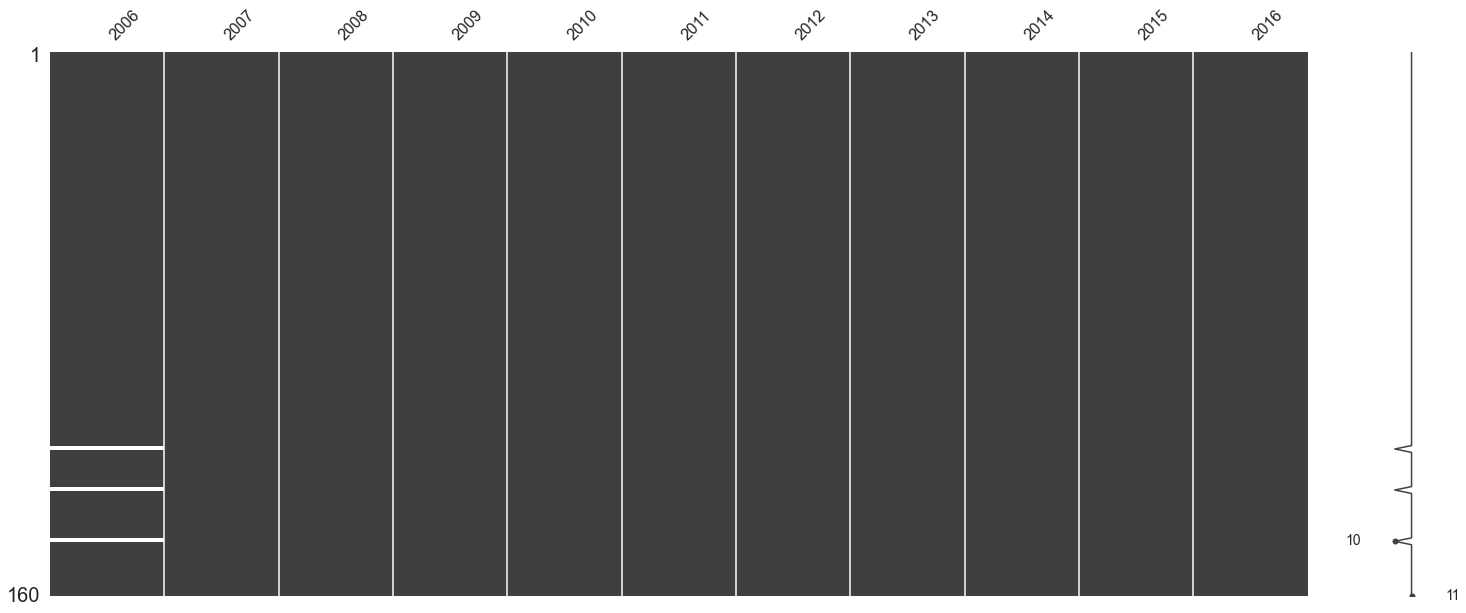

In [175]:
msno.matrix(df_internet_users_subset_cleaned2_superior_X_for_2016)

### Plot - Global

#### Plot - Folium

In [176]:
# Reset index
df_internet_users_subset_cleaned2_superior_X_for_2016.reset_index(REFERENCE_VARIABLE, inplace = True)

# Setup a folium map at a high-level zoom
map = folium.Map(location = [20, 15], zoom_start = 1.5)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
map.choropleth(geo_data = country_geo, data = df_internet_users_subset_cleaned2_superior_X_for_2016,
                 columns = [REFERENCE_VARIABLE[1], '2016'],
                 key_on = 'feature.id',
                 fill_color = 'YlGnBu', fill_opacity = 0.7, line_opacity = 0.2,
                 legend_name = 'Internet users (per 100 people)')

map

/Users/romain/opt/anaconda3/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


#### Plot 1 - (Line Plot) Evolution of Internet Users by Country (%) 

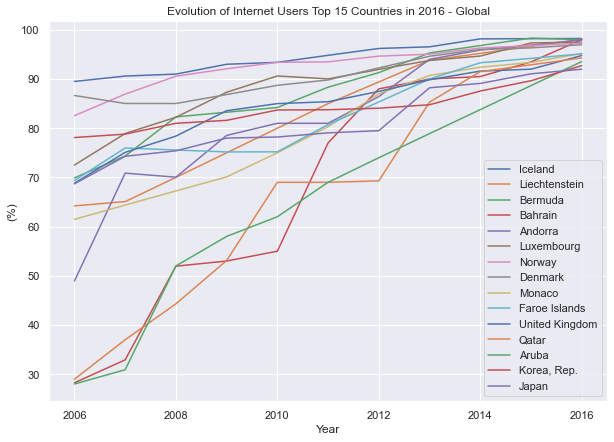

In [177]:
# Let's consider the 15 countries with the highest percentage of internet users in 2016 

# Plot
(df_internet_users_subset_cleaned2_superior_X_for_2016
.set_index('Country Name')
.drop(['Country Code', 'Region'], axis = 1)
.head(15).T
.plot(figsize = (10,7), title = 'Evolution of Internet Users Top 15 Countries in 2016 - Global', xlabel = 'Year', ylabel = '(%)')
.legend(loc = 'lower right')
) 

plt.show()
# Discussion :
# We can notice a strong increase of internet users for most countries from 2006 to 2013 and a relative stabilization from 2013 onwards. 
# This confirms the relevance of considering only the most recent values for our study.
# It also validates our 'Clean 2' strategy of imputing by the last non-NaN value.

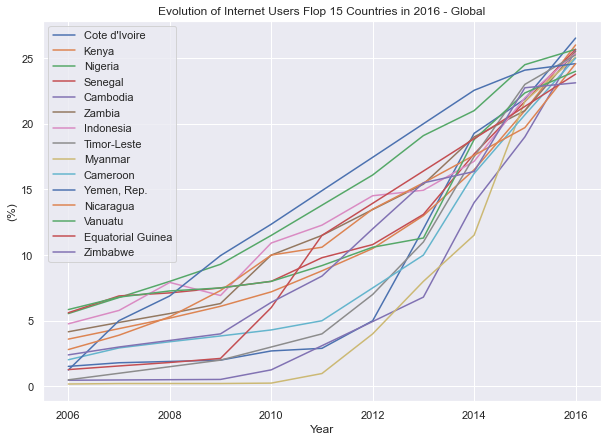

In [178]:
# Let's consider the 15 countries with the lowest percentage of internet users in 2016  

# Plot
(df_internet_users_subset_cleaned2_superior_X_for_2016
.set_index('Country Name')
.drop(['Country Code', 'Region'], axis = 1)
.tail(15).T
.plot(figsize = (10,7), title = 'Evolution of Internet Users Flop 15 Countries in 2016 - Global', xlabel = 'Year', ylabel = '(%)')
.legend(loc = 'upper left')
)

plt.show()

# Discussion :
# Likewise we can notice a strong increase of internet users for most countries from 2006 to 2015 and a relative stabilization from 2015 onwards. 
# This also confirms the relevance of considering only the most recent values for our study.
# It also validates our 'Clean 2' strategy of imputing by the last non-NaN value.



#### Plot 2 - (Boxplot) - Internet Users distribution (%)(2016)

mean = 51.051607621876826
std = 28.538087535671888
lower limit = 22.513520086204938


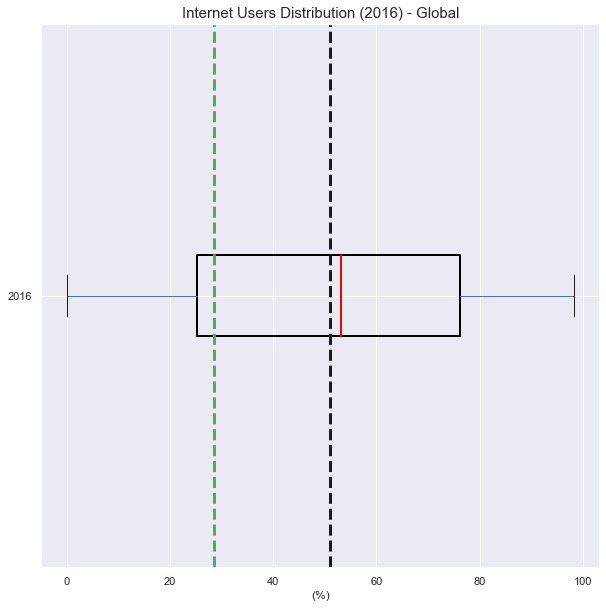

In [179]:
# Plot
df_internet_users_subset_cleaned2['2016'].plot(kind = "box",
                                                                       figsize = (10,10),
                                                                       vert = False,
                                                                       #color = 'blue',
                                                                       #patch_artist = False,
                                                                       #notch = False,
                                                                       #showmeans = True,
                                                                       boxprops = dict(linestyle = '-', linewidth = 2),
                                                                       medianprops = dict(linestyle = '-', linewidth = 2, color = 'red')
                                                                       )

plt.title("Internet Users Distribution (2016) - Global", fontsize = 15)
plt.xlabel("(%)")
print("mean = " + str(df_internet_users_subset_cleaned2['2016'].mean()))
print("std = " + str(df_internet_users_subset_cleaned2['2016'].std()))
print("lower limit = " + str(lower_limit))
plt.axvline(df_internet_users_subset_cleaned2['2016'].mean(), color='k', linestyle='dashed', linewidth=3)
plt.axvline(df_internet_users_subset_cleaned2['2016'].std(), color='g', linestyle='dashed', linewidth=3)
plt.show()


#### Plot 3 - (Hist + Kde Plot) Internet Users distribution (%)(2016)

mean = 51.051607621876826
std = 28.538087535671888
lower limit = 22.513520086204938


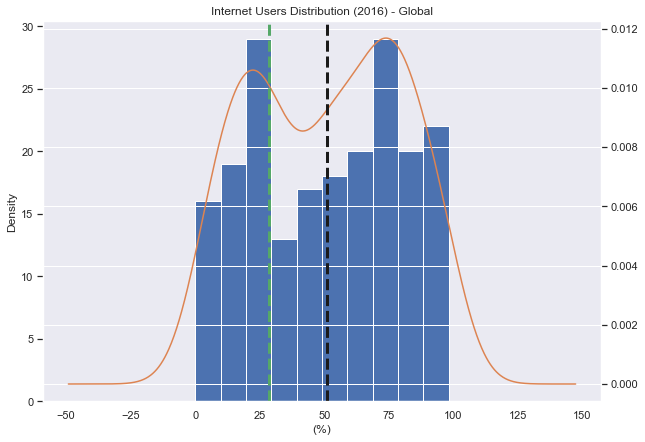

In [180]:
# Plot hist
ax = df_internet_users_subset_cleaned2['2016'].plot(kind = 'hist', 
                                                    figsize = (10,7),
                                                    xlabel = 'ere', 
                                                    ylabel = 'Density',  
                                                    title = 'Internet Users Distribution (2016) - Global' 
                                                    )
# Add kde
df_internet_users_subset_cleaned2['2016'].plot(kind = 'kde', ax = ax, secondary_y = True)
ax.set_xlabel("(%)")
ax.set_ylabel("Density")
print("mean = " + str(df_internet_users_subset_cleaned2['2016'].mean()))
print("std = " + str(df_internet_users_subset_cleaned2['2016'].std()))
print("lower limit = " + str(lower_limit))
plt.axvline(df_internet_users_subset_cleaned2['2016'].mean(), color='k', linestyle='dashed', linewidth=3)
plt.axvline(df_internet_users_subset_cleaned2['2016'].std(), color='g', linestyle='dashed', linewidth=3)
plt.show()

# Discussion :
# Most countries hover around 80% of internet users (Q3 according to above bloxplot). 
# Another substantial group hovers around 25% (Q1 according to above boxplot).

In [181]:
df_internet_users_subset_cleaned2_superior_X_for_2016

Country Name Country Code                      Region       2006  \
0              Iceland          ISL       Europe & Central Asia  89.510000   
1        Liechtenstein          LIE       Europe & Central Asia  64.214161   
2              Bermuda          BMU               North America  69.899655   
3              Bahrain          BHR  Middle East & North Africa  28.243952   
4              Andorra          AND       Europe & Central Asia  48.936847   
..                 ...          ...                         ...        ...   
155        Yemen, Rep.          YEM  Middle East & North Africa   1.247824   
156          Nicaragua          NIC   Latin America & Caribbean   2.805573   
157            Vanuatu          VUT         East Asia & Pacific   5.850585   
158  Equatorial Guinea          GNQ          Sub-Saharan Africa   1.279194   
159           Zimbabwe          ZWE          Sub-Saharan Africa   2.400000   

          2007      2008   2009   2010       2011       2012      2013  \
0    90.600000  91.00000  93.00  93.39  94.819687  96.209800  96.54680   
1    65.080218  70.00000  75.00  80.00  85.000000  89.407700  93.80000   
2    74.350594  82.30000  83.25  84.21  88.336000  91.299305  95.30000   
3    32.910000  51.95000  53.00  55.00  76.999966  88.000000  90.00004   
4    70.870000  70.04000  78.53  81.00  81.000000  86.434425  94.00000   
..         ...       ...    ...    ...        ...        ...       ...   
155   5.010000   6.89000   9.96  12.35  14.905000  17.446500  20.00000   
156   3.900000   5.30000   7.30  10.00  10.600000  13.500000  15.50000   
157   6.800000   7.26912   7.50   8.00   9.200000  10.598000  11.30000   
158   1.557123   1.82000   2.13   6.00  11.500000  13.943182  16.40000   
159   3.000000   3.50000   4.00   6.40   8.400000  12.000000  15.50000   

          2014       2015       2016  
0    98.160000  98.200000  98.240016  
1    95.210000  96.641195  98.093904  
2    96.800000  98.323610  98.000000  
3    90.503133  93.478301  97.999981  
4    95.900000  96.910000  97.930637  
..         ...        ...        ...  
155  22.550000  24.085409  24.579208  
156  17.600000  19.704292  24.571834  
157  18.800000  22.351405  24.000000  
158  18.860000  21.320000  23.780000  
159  16.364740  22.742818  23.119989  

[160 rows x 14 columns]

### Plot - Region

In [182]:
df_internet_users_subset_cleaned2_superior_X_for_2016_plot_region = df_internet_users_subset_cleaned2_superior_X_for_2016.set_index(REFERENCE_VARIABLE)
df_internet_users_subset_cleaned2_superior_X_for_2016_plot_region.reset_index('Region', inplace = True)
df_internet_users_subset_cleaned2_superior_X_for_2016_plot_region.reset_index('Country Code', inplace = True)
df_internet_users_subset_cleaned2_superior_X_for_2016_plot_region.drop('Country Code', axis =1, inplace = True)
list_df_by_region = []

for i in range(len(list_regions)) :
    
    list_df_by_region.append(df_internet_users_subset_cleaned2_superior_X_for_2016_plot_region[df_internet_users_subset_cleaned2_superior_X_for_2016_plot_region['Region'] == list_regions[i]])

    # Drop non numerical column
    list_df_by_region[i].drop('Region', axis = 1, inplace = True)

    
    

#### Plot 1 - (Line Plot) Evolution of Internet Users by Country (%) 

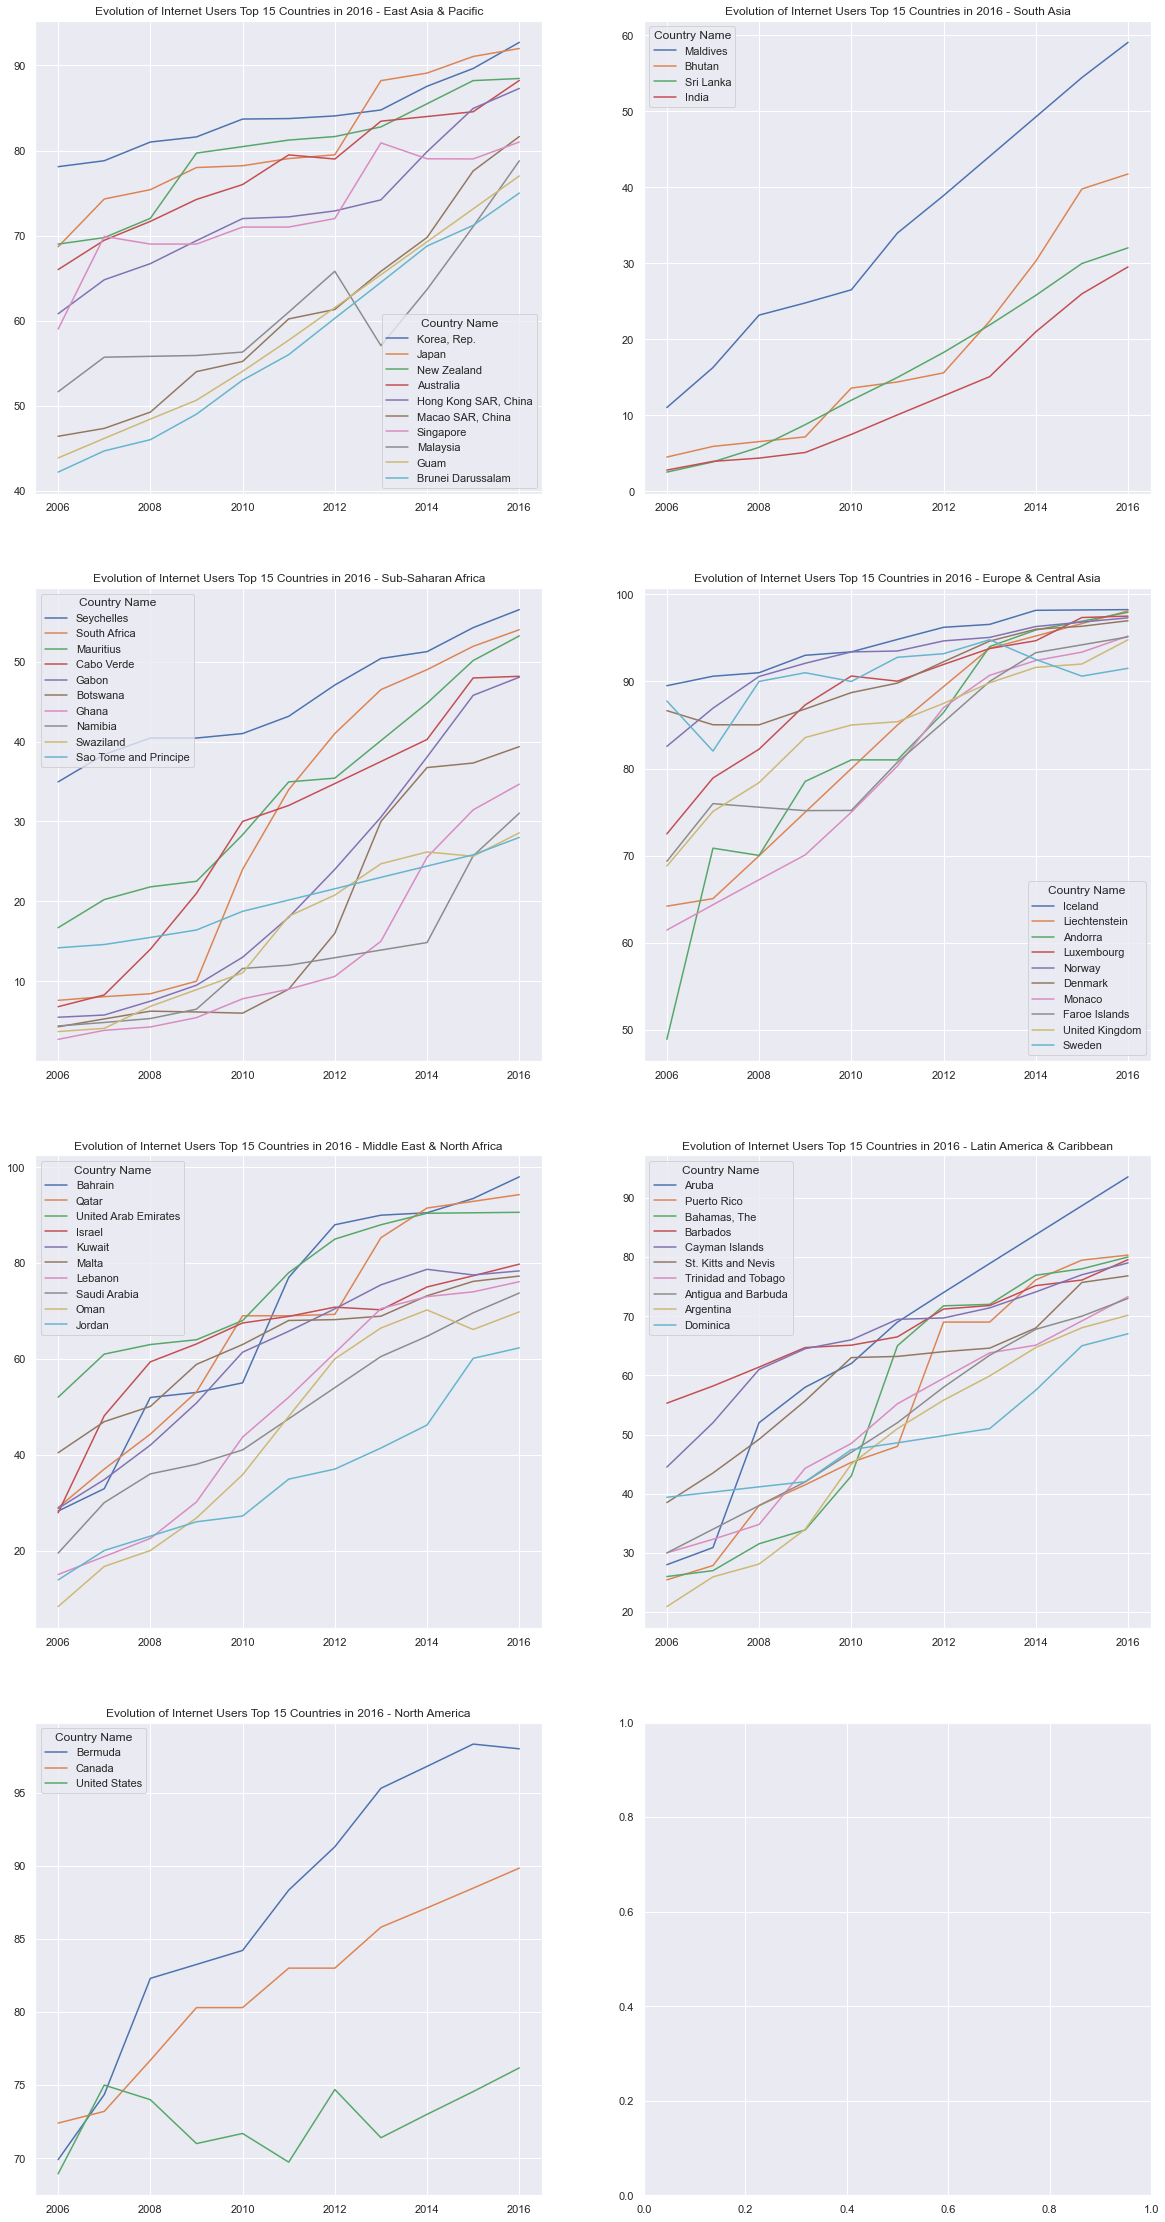

In [183]:
# Sublot
nrows = 4
ncols = 2
fig1, axes1 = plt.subplots( nrows = nrows, ncols = ncols, figsize = (20, 40))

# Plot
nrows_ = 0
ncols_ = 0
i = 0
    
for nrows_ in range(nrows) :
    for ncols_ in range(ncols) :
        if i < len(list_df_by_region) :
            (
            list_df_by_region[i]
                .head(10).T
                .plot(kind = "line", 
                      title = "Evolution of Internet Users Top 15 Countries in 2016 - " + list_regions[i],  
                      ax = axes1[nrows_][ncols_])
            )                                                                                                                  
        i = i + 1 
        ncols_ = ncols_ + 1
    nrows_ = nrows_ + 1       
plt.show()



#### Plot 2 - (Boxplot) - Internet Users distribution (%)(2016)

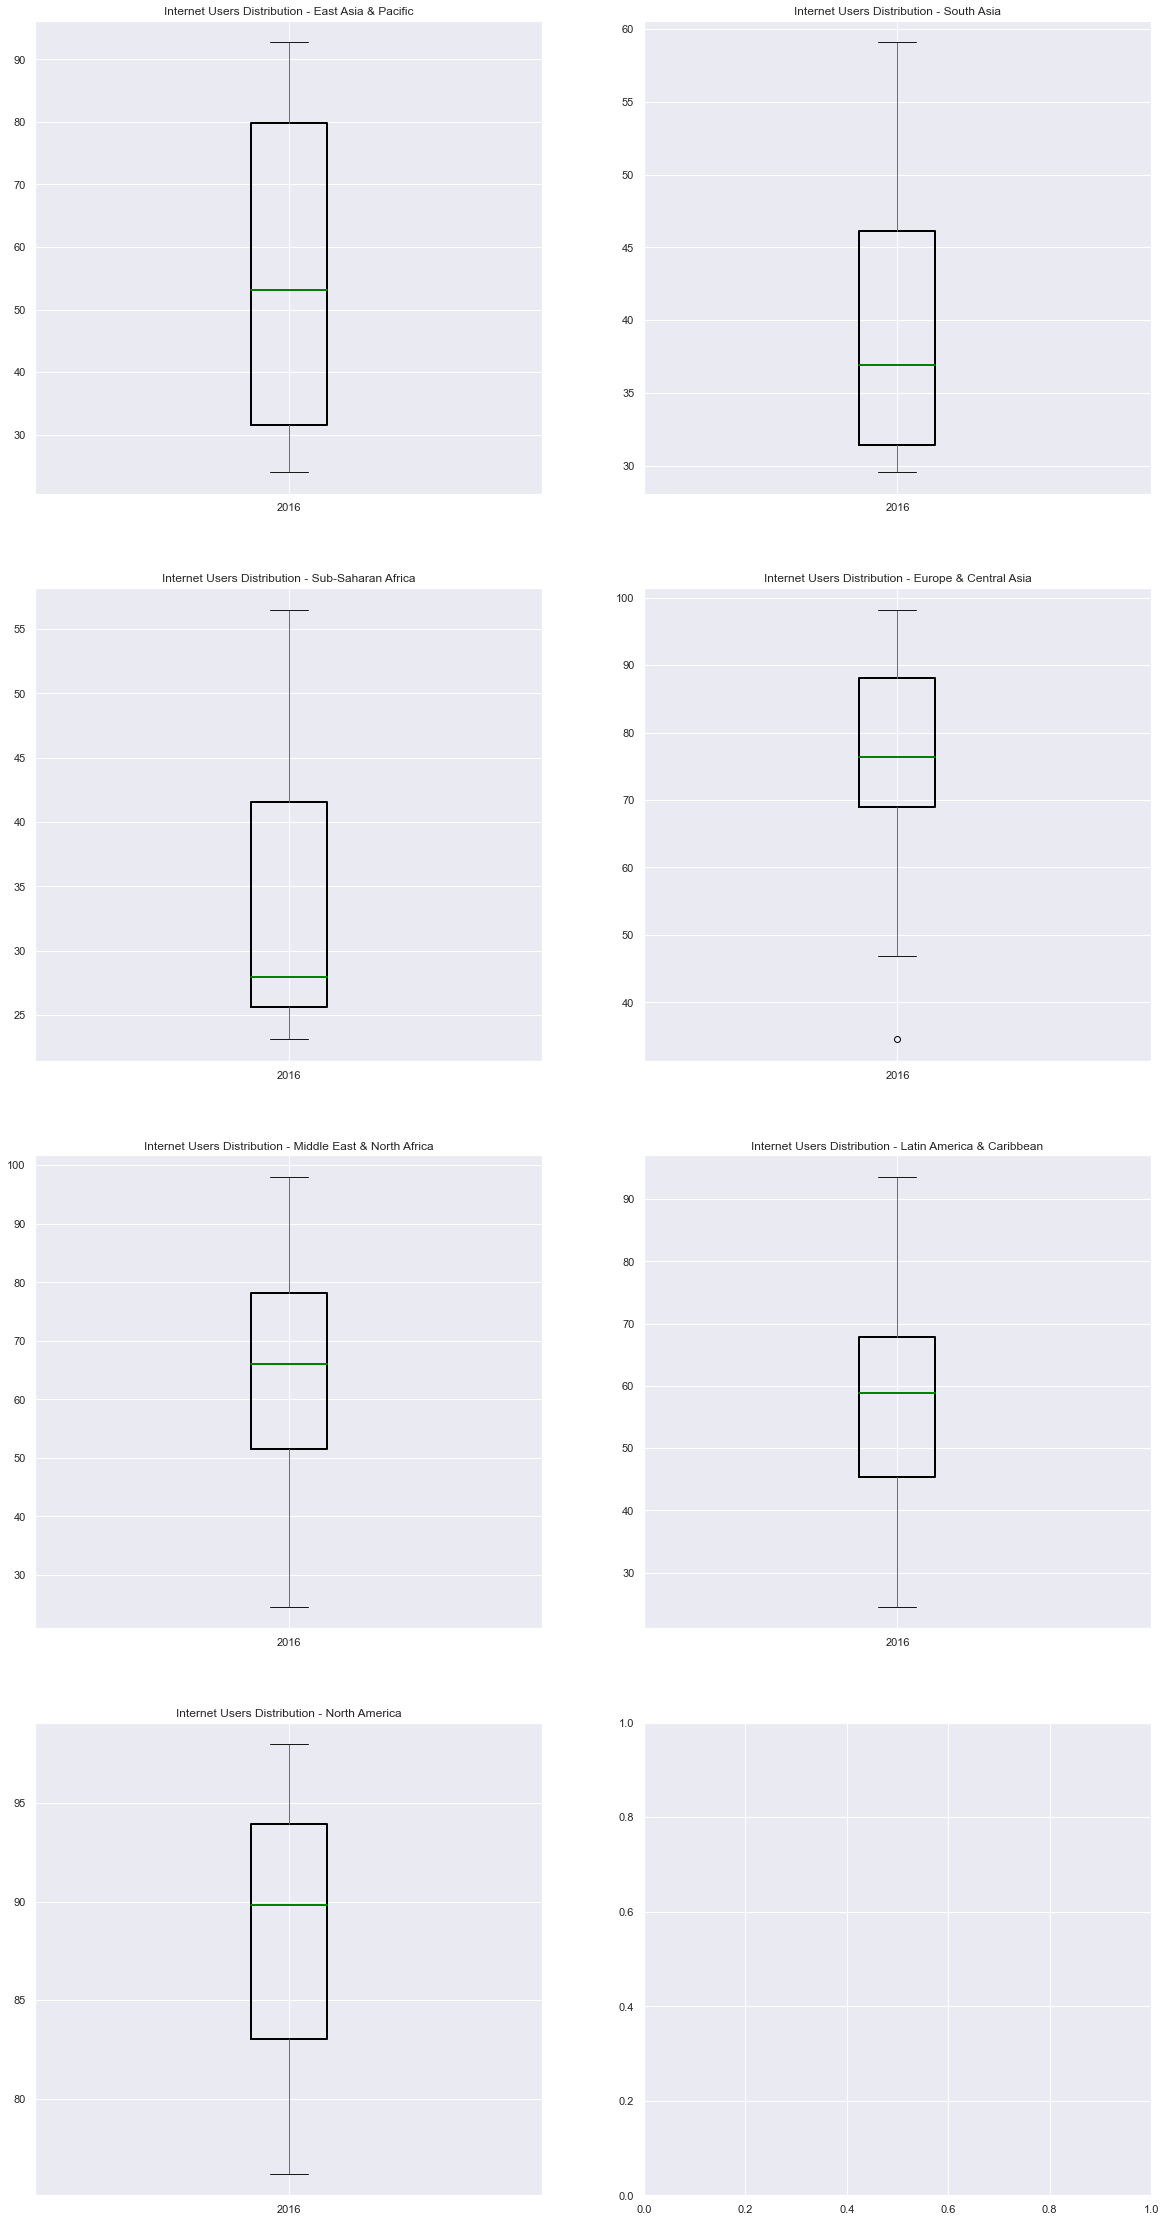

In [184]:
# Sublot
nrows2 = 4
ncols2 = 2
fig2, axes2 = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20, 40))

# Plot
nrows_ = 0
ncols_ = 0
i = 0
    
for nrows_ in range(nrows2) :
    for ncols_ in range(ncols2) :
        if i < len(list_df_by_region) :
            list_df_by_region[i]['2016'].plot(kind = "box",
                                            title = "Internet Users Distribution - " + list_regions[i],
                                            boxprops = dict(linestyle = '-', linewidth = 2),
                                            medianprops = dict(linestyle = '-', linewidth = 2, color = 'green'),
                                            ax = axes2[nrows_][ncols_])
                                        
        i = i + 1 
        ncols_ = ncols_ + 1
    nrows_ = nrows_ + 1       
plt.show()



#### Plot 3 - (Hist + Kde Plot) Internet Users distribution (%)(2016)

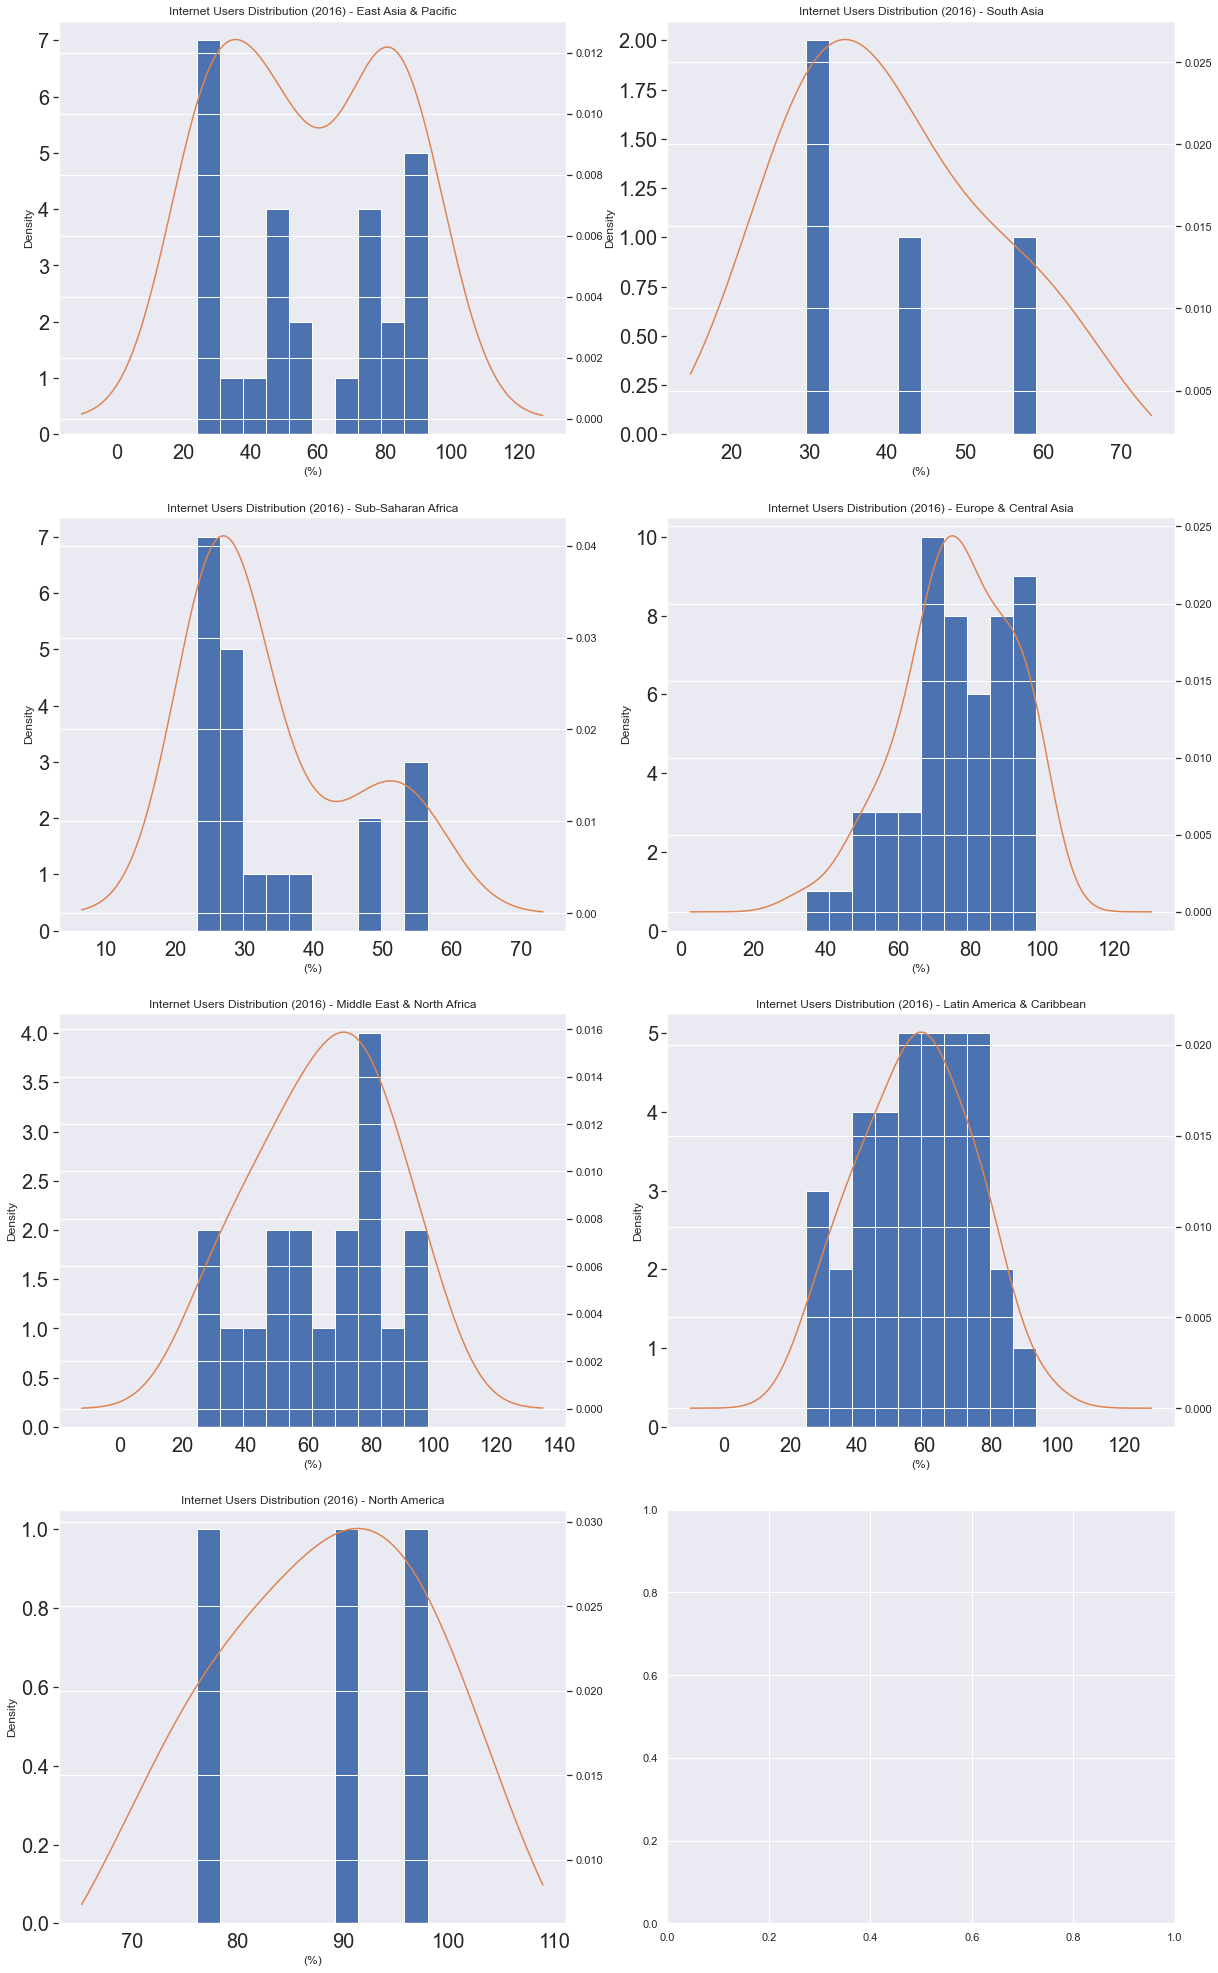

In [185]:
# Sublot
nrows3 = 4
ncols3 = 2
fig3, axes3 = plt.subplots(nrows = nrows3, ncols = ncols3,figsize = (20,35))

# Plot + kde
nrows_ = 0
ncols_ = 0
i = 0
    
for nrows_ in range(nrows):
    for ncols_ in range(ncols):
        if i < len(list_df_by_region):
            ax3 = list_df_by_region[i]['2016'].plot(kind = 'hist', 
                                        xlabel = '', 
                                        ylabel = 'Density',  
                                        title = "Internet Users Distribution (2016) - " + list_regions[i],                                                
                                        fontsize = 20,
                                        ax = axes3[nrows_][ncols_]
                                     )

            list_df_by_region[i]['2016'].plot(kind = 'kde', ax = ax3, secondary_y = True)
            ax3.set_xlabel("(%)")
            ax3.set_ylabel("Density") 
        i = i + 1 
        ncols_ = ncols_ + 1
    nrows_= nrows_ + 1       
plt.show()

    

In [186]:
df_internet_users_subset_cleaned2_superior_X_for_2016.set_index(REFERENCE_VARIABLE, inplace = True)


## Variable "Population growth (annual %)"

### Initial analysis

In [187]:
# Let's create a sub dataframe stemming from Data for 'Population growth (annual %)' variable called df_population_growth
# 'create_dataframe_from_given_dataframe_and_variable' function is defined in script.py. 
# This function extracts rows for which Indicator Name equals 'Population growth (annual %)' and it factors code which will be repeated for each sub dataframe creation stemming from Data.
df_population_growth = create_dataframe_from_given_dataframe_and_variable(df_edstats_data_with_country_cleaned_sorted_by_country_code, "Population growth (annual %)")

#Show
df_population_growth.head()

214 rows in dataframe
75 columns in dataframe
Index(['Country Code', 'Short Name', 'Long Name', 'Region', 'Currency Unit',
       'Income Group', 'Country Name', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')


Country Code   Short Name                     Long Name  \
2307           ABW        Aruba                         Aruba   
5972           AFG  Afghanistan  Islamic State of Afghanistan   
9637           AGO       Angola   People's Republic of Angola   
13302          ALB      Albania           Republic of Albania   
16967          AND      Andorra       Principality of Andorra   

                          Region   Currency Unit          Income Group  \
2307   Latin America & Caribbean   Aruban florin  High income: nonOECD   
5972                  South Asia  Afghan afghani            Low income   
9637          Sub-Saharan Africa  Angolan kwanza   Upper middle income   
13302      Europe & Central Asia    Albanian lek   Upper middle income   
16967      Europe & Central Asia            Euro  High income: nonOECD   

      Country Name                Indicator Name Indicator Code      1970  \
2307         Aruba  Population growth (annual %)    SP.POP.GROW  0.572211   
5972   Afghanistan  Population growth (annual %)    SP.POP.GROW  2.472266   
9637        Angola  Population growth (annual %)    SP.POP.GROW  1.993491   
13302      Albania  Population growth (annual %)    SP.POP.GROW  2.550851   
16967      Andorra  Population growth (annual %)    SP.POP.GROW  5.147543   

           1971      1972      1973      1974      1975      1976      1977  \
2307   0.636273  0.670693  0.671205  0.471968  0.212898 -0.117120 -0.363781   
5972   2.587996  2.628657  2.576017  2.412657  2.157653  1.966302  1.754255   
9637   2.202247  2.390126  2.548369  2.662495  2.746673  2.804667  2.869349   
13302  2.422972  2.494973  2.362552  2.297214  2.301154  2.208235  2.213252   
16967  5.150130  5.083934  4.862724  4.461191  3.935751  3.431725  3.080122   

           1978      1979      1980      1981      1982      1983      1984  \
2307  -0.436628 -0.204858  0.193211  0.780691  1.276348  1.385741  1.015708   
5972   1.294025  0.519590 -0.439277 -1.478345 -2.358765 -2.867273 -2.800548   
9637   2.970558  3.119059  3.282659  3.462434  3.587308  3.581515  3.422186   
13302  2.075742  1.989457  2.047964  2.002974  2.113272  2.120885  2.103937   
16967  2.905118  3.153934  3.524383  3.896261  4.213953  4.384243  4.401653   

           1985      1986      1987      1988      1989      1990      1991  \
2307   0.301918 -0.607943 -1.303070 -1.226909 -0.076979  1.813641  3.902018   
5972  -2.216315 -1.556722 -0.850774  0.330911  2.030398  3.925342  5.900771   
9637   3.176703  2.898427  2.685259  2.601739  2.684418  2.868721  3.090290   
13302  2.055995  1.933221  1.997040  1.886711  2.687862  1.799086 -0.602810   
16967  4.339443  4.208398  4.081770  4.003002  3.915665  3.854362  3.889679   

           1992      1993      1994      1995      1996      1997      1998  \
2307   5.440272  6.068410  5.625998  4.616675  3.517889  2.669576  2.114386   
5972   7.325447  7.665433  6.895569  5.572581  4.143163  3.086719  2.590485   
9637   3.251618  3.302194  3.212362  3.043198  2.855267  2.732315  2.715382   
13302 -0.606435 -0.610166 -0.613881 -0.617704 -0.621511 -0.625430 -0.629334   
16967  3.837472  3.476101  2.759621  1.854203  0.795574 -0.051287 -0.288007   

           1999      2000      2001      2002      2003      2004      2005  \
2307   1.960558  2.055027  2.225930  2.229056  2.109354  1.757353  1.302039   
5972   2.820724  3.494659  4.251504  4.720528  4.818041  4.468918  3.870470   
9637   2.832559  3.032943  3.245491  3.411515  3.526303  3.573962  3.575900   
13302 -0.633352 -0.637357 -0.938470 -0.299877 -0.374149 -0.417931 -0.511790   
16967  0.354831  1.572166  2.939992  3.942573  4.375449  4.098923  3.382417   

           2006      2007      2008      2009      2010      2011      2012  \
2307   0.797563  0.384060  0.131311  0.098616  0.212680  0.376985  0.512145   
5972   3.228630  2.755225  2.512574  2.569114  2.812617  3.095119  3.272703   
9637   3.566160  3.564539  3.563448  3.566821  3.570099  3.570352  3.559496   
13302 -0.630911 

In [188]:
# Check stats
df_population_growth.describe()

1970        1971        1972        1973        1974        1975  \
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000   
mean     2.208841    2.205053    2.157631    2.138823    2.110940    2.074529   
std      1.619052    1.808007    1.742532    1.830741    1.762245    1.748406   
min     -1.435564   -1.594625   -3.056522   -4.032582   -4.213563   -3.658569   
25%      1.233061    1.170587    1.115393    1.054950    1.098009    1.067050   
50%      2.201091    2.151576    2.126468    2.103440    2.134615    2.099424   
75%      2.825206    2.844702    2.792156    2.784022    2.776748    2.756497   
max     14.446942   16.881671   17.689814   17.695296   17.125615   16.211873   

             1976        1977        1978        1979        1980        1981  \
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000   
mean     2.023286    1.955993    1.969087    1.994820    2.037210    2.087182   
std      1.816389    1.918532    1.827080    1.678359    1.515742    1.543325   
min     -2.950945   -3.174870   -3.558749   -2.973612   -1.404240   -1.478345   
25%      0.999011    0.939041    0.906253    0.855502    0.930864    0.874465   
50%      2.008615    1.960820    2.012165    1.985351    2.129820    2.182326   
75%      2.789388    2.786781    2.803960    2.837683    2.874805    2.880781   
max     15.450884   14.530119   13.033461   11.071306    9.065863   10.336814   

             1982        1983        1984        1985        1986        1987  \
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000   
mean     2.152860    2.166850    2.141654    2.081722    2.048521    2.042913   
std      1.714128    2.063167    2.015100    1.929142    1.871362    1.838423   
min     -2.358765   -2.867273   -2.800548   -2.216315   -1.556722   -1.410886   
25%      0.947391    0.904686    0.869728    0.812593    0.748761    0.816777   
50%      2.248905    2.230626    2.192021    2.060550    2.023533    1.981825   
75%      2.884002    2.883228    2.871948    2.873695    2.896589    2.870089   
max     11.426507   19.597267   19.282216   18.518428   17.507298   16.506789   

             1988        1989        1990        1991        1992        1993  \
count  210.000000  210.000000  211.000000  211.000000  211.000000  211.000000   
mean     1.962536    1.894029    1.804413    1.753039    1.699694    1.661807   
std      1.719483    1.539918    1.444921    1.632990    1.628218    1.675340   
min     -1.425202   -1.562425   -1.803750   -5.814339   -5.089333   -6.184857   
25%      0.694237    0.651161    0.614150    0.644393    0.648838    0.584550   
50%      1.958550    1.977700    1.897590    1.887676    1.775504    1.706416   
75%      2.853044    2.770176    2.721325    2.708016    2.673160    2.654148   
max     13.979411   10.678273    8.183105    6.178278    7.325447    7.665433   

             1994        1995        1996        1997        1998        1999  \
count  211.000000  211.000000  212.000000  212.000000  212.000000  214.000000   
mean     1.587097    1.547130    1.532137    1.532614    1.480604    1.423203   
std      1.567412    1.428711    1.408011    1.414718    1.568578    1.678043   
min     -4.792691   -2.697722   -3.820174   -2.517245   -5.924733  -10.955149   
25%      0.511155    0.511250    0.532099    0.528278    0.492535    0.482869   
50%      1.615381    1.582101    1.582879    1.557617    1.514481    1.454714   
75%      2.586690    2.560680    2.505450    2.473904    2.405633    2.390560   
max      6.895569    5.572581    5.718648    7.357292    7.917892    7.283968   

             2000        2001        2002        2003        2004        2005  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.416948    1.440974    1.465958    1.452957    1.492550    1.527531   
std      1.452554    1.361836    1.367423    1.432493    1.521594    1.672567   
min     -4.075386   -3.771878   -2.1706

In [189]:
# Check data type
df_population_growth.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 2307 to 782952
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    214 non-null    object 
 1   Short Name      214 non-null    object 
 2   Long Name       214 non-null    object 
 3   Region          214 non-null    object 
 4   Currency Unit   214 non-null    object 
 5   Income Group    214 non-null    object 
 6   Country Name    214 non-null    object 
 7   Indicator Name  214 non-null    object 
 8   Indicator Code  214 non-null    object 
 9   1970            210 non-null    float64
 10  1971            210 non-null    float64
 11  1972            210 non-null    float64
 12  1973            210 non-null    float64
 13  1974            210 non-null    float64
 14  1975            210 non-null    float64
 15  1976            210 non-null    float64
 16  1977            210 non-null    float64
 17  1978            210 non-null 

<AxesSubplot:>

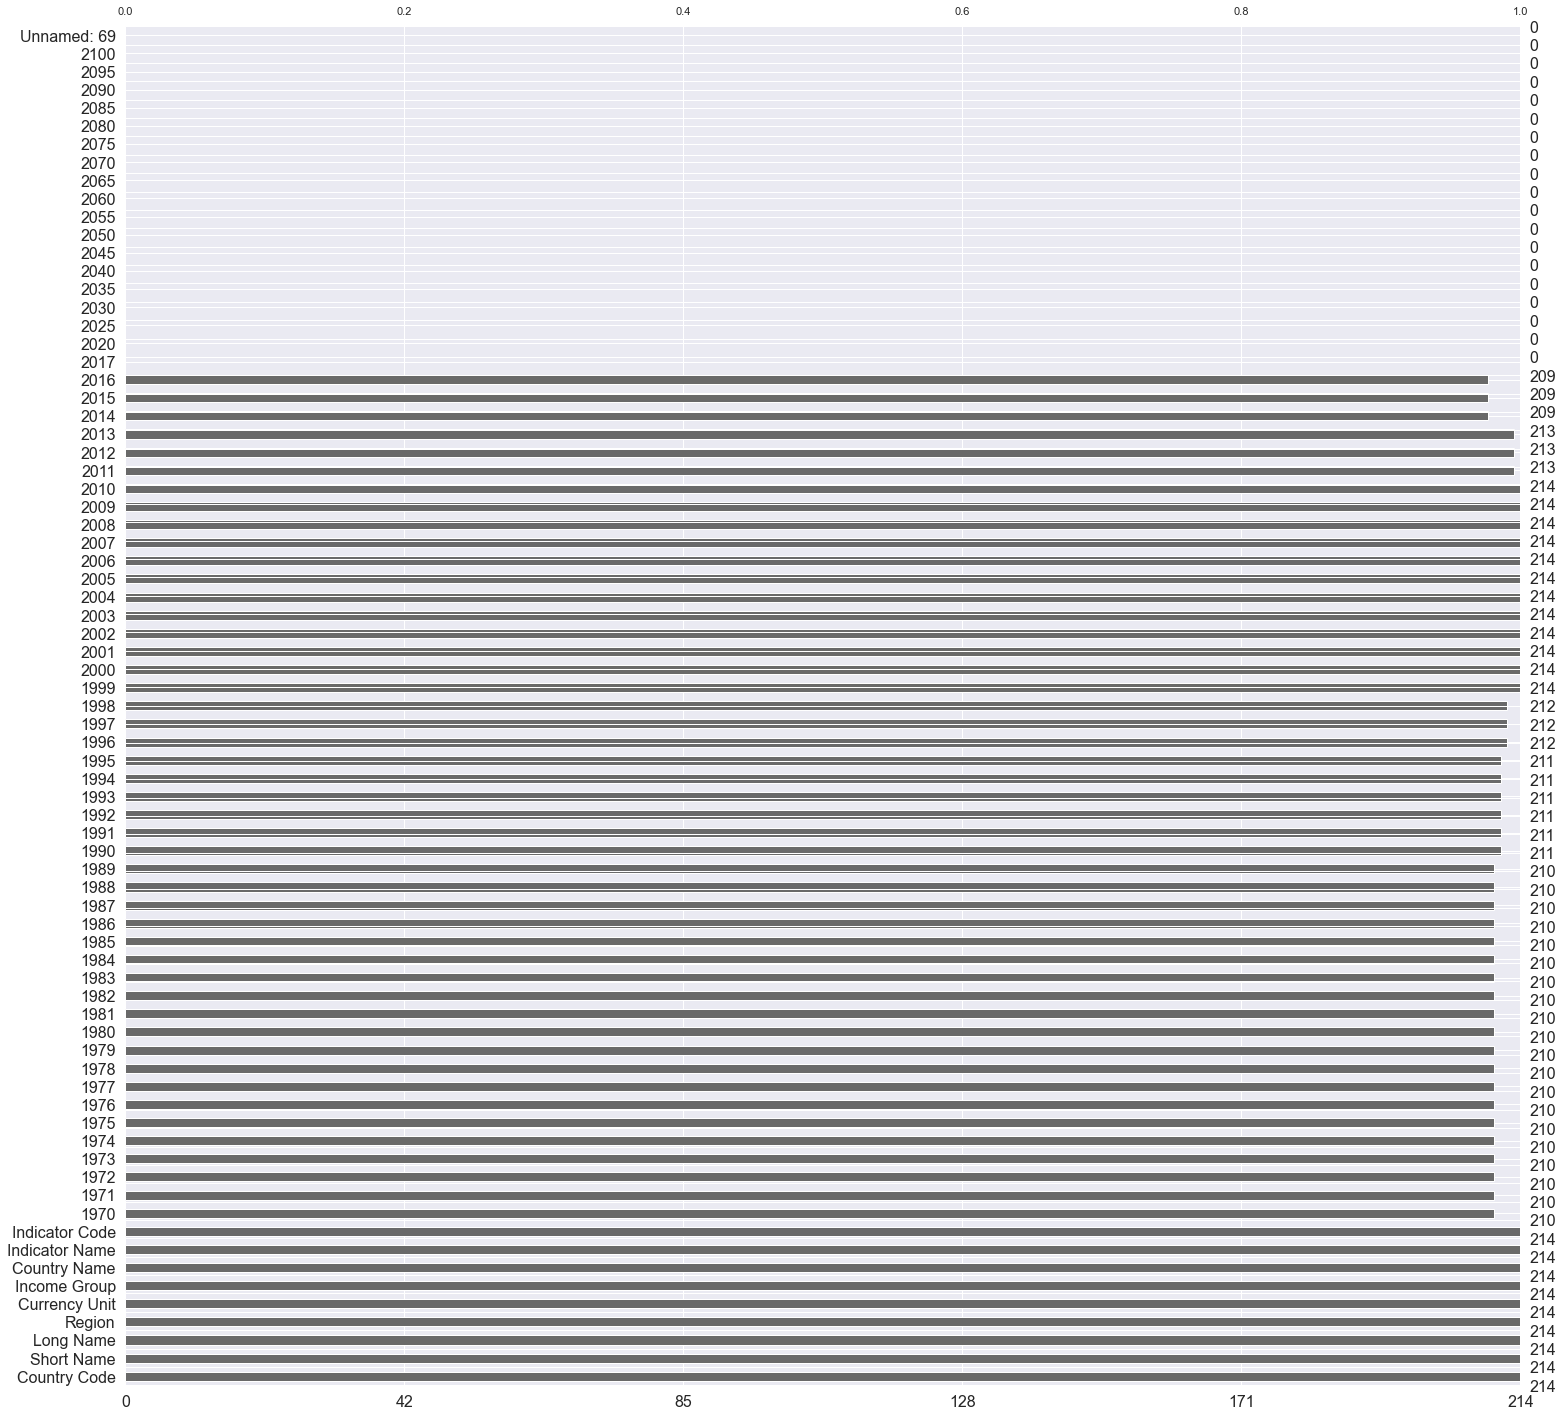

In [190]:
#Check missing data
msno.bar(df_population_growth)


### Select columns from 2012 to 2016 

<AxesSubplot:>

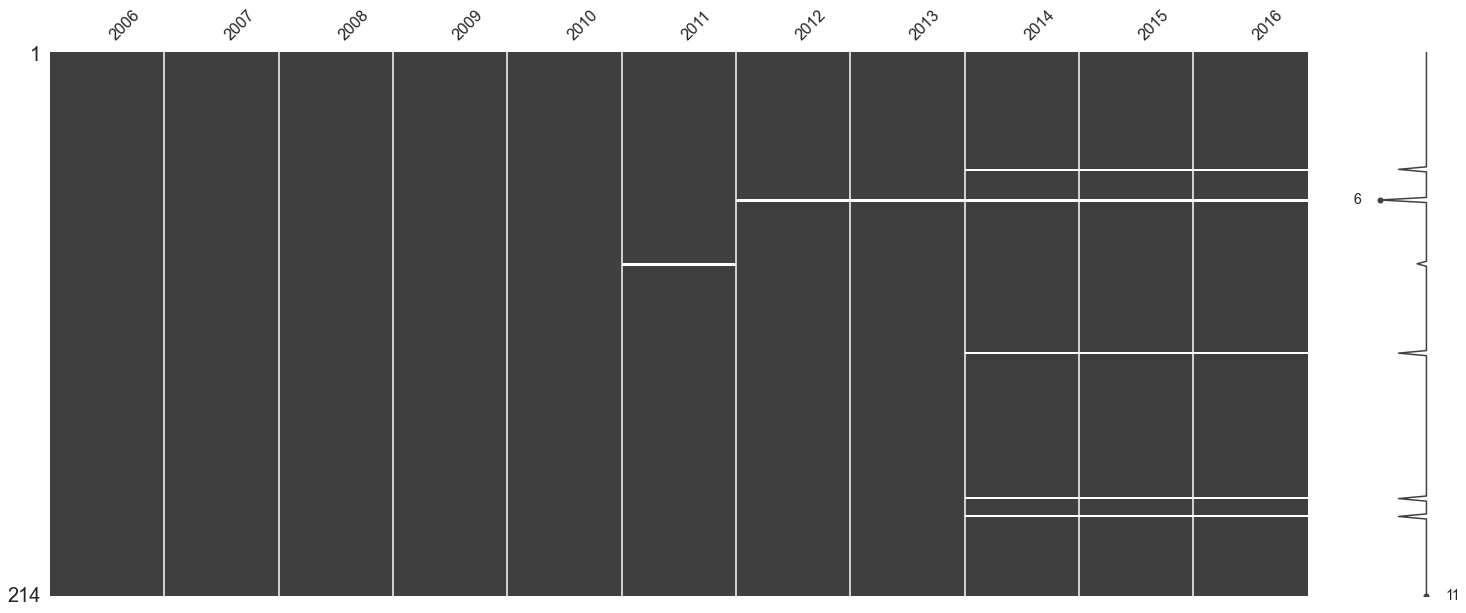

In [191]:
# Let's start by slecting the relevant time columns for the study of our variable. 
# 'select_columns' function is defined in script.py. 

# Discussion :
# Population Growth is a volatile indicator
# We will select the last 10 years of available data to understand how this incators behaves through time.
# (cf. Plot section)
df_population_growth_subset = select_columns(df_population_growth, '2006', '2016')

#Change index to "REFERENCE_VARIABLE"
df_population_growth_subset = df_population_growth_subset.set_index(REFERENCE_VARIABLE)

# Check missing data
msno.matrix(df_population_growth_subset)


### Clean 1 - Dismiss rows with with full NaN values from 2012 to 2016

<AxesSubplot:>

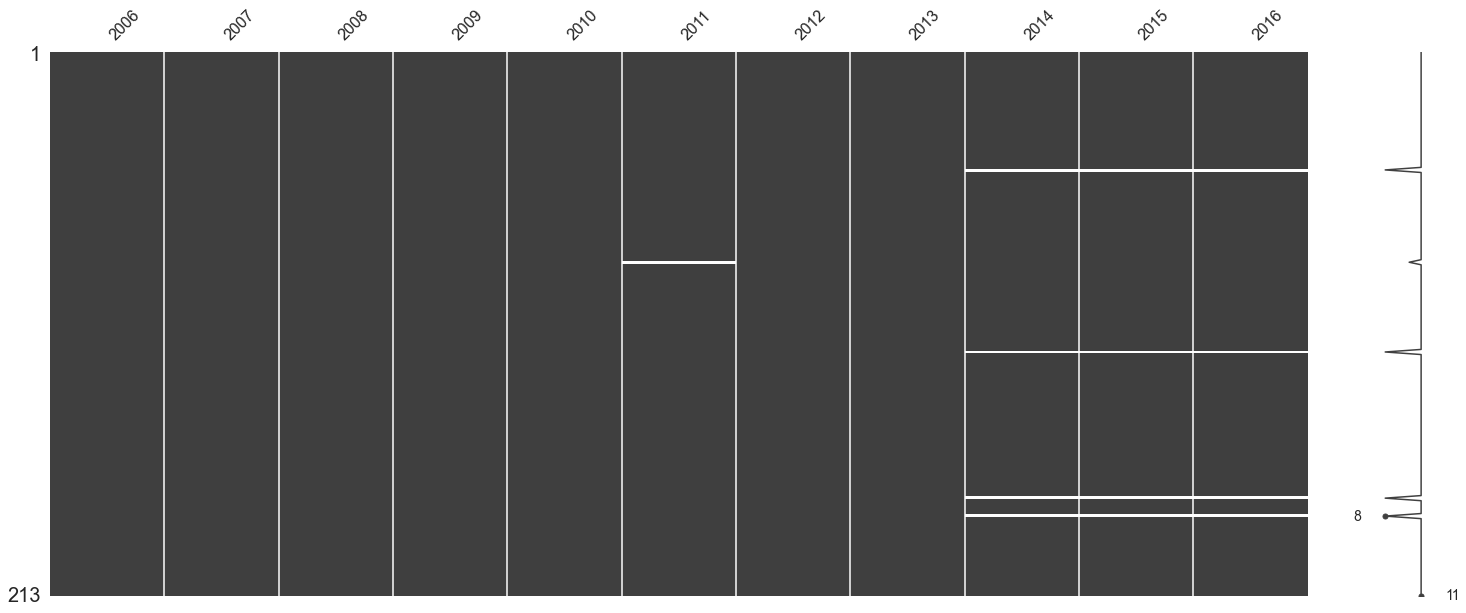

In [192]:
# First let's dismiss rows/countries for which no data is available from 2012 to 2016
df_population_growth_subset_cleaned1 = df_population_growth_subset.dropna(subset = ['2012','2013','2014','2015','2016'], how = 'all') 

# Check missing data
msno.matrix(df_population_growth_subset_cleaned1)

### Clean 2 - Imputation by row mean for any remaining NaN values

<AxesSubplot:>

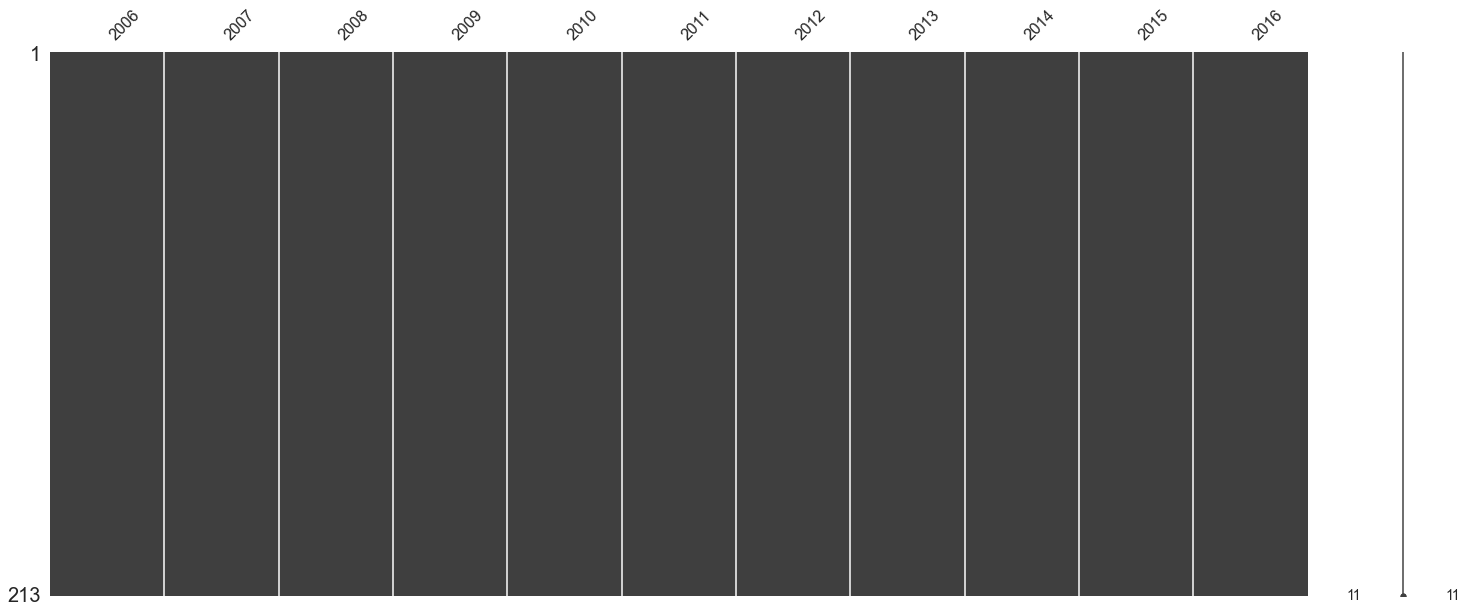

In [193]:
# Second let's impute by the last non-NaN value for any NaN value on each row
df_population_growth_subset_cleaned2 = df_population_growth_subset_cleaned1.T.fillna(df_population_growth_subset_cleaned1.mean(axis = 1)).T

# Discussion
# (cf. Plot 1)

# Check missing data
msno.matrix(df_population_growth_subset_cleaned2)

### Add mean column for values from 2012 to 2016

In [194]:
#  Fill mean column with computed means along rows
df_population_growth_subset_cleaned2["Population Growth (%)(Mean 2012-2016)"] = df_population_growth_subset_cleaned2.iloc[:, 6:11].mean(axis = 1)

# Sort
df_population_growth_subset_cleaned2 = df_population_growth_subset_cleaned2.sort_values("Population Growth (%)(Mean 2012-2016)", ascending = False)

### Plot - Global

#### Plot 1 - Folium 

In [195]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [20, 15], zoom_start = 1.5)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
map.choropleth(geo_data = country_geo, data = df_population_growth_subset_cleaned2.reset_index("Country Code"),
                 columns = [REFERENCE_VARIABLE[1],'Population Growth (%)(Mean 2012-2016)'],
                 key_on = 'feature.id',
                 fill_color = 'YlGnBu', fill_opacity = 0.7, line_opacity = 0.2,
                 legend_name = 'Population Growth (%)(Mean 2012-2016)')

map

/Users/romain/opt/anaconda3/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


#### Plot 2 - (Line Plot) Top 15 countries population growth temporal evolution  (Mean 2012-2016)

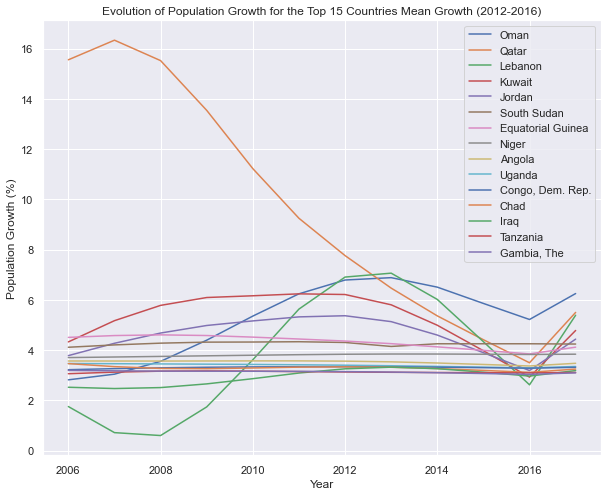

In [196]:
# Let's consider the 15 countries with the highest mean growth

# Plot
(
df_population_growth_subset_cleaned2
.reset_index(['Country Code', 'Region'])
.drop(['Country Code', 'Region'], axis = 1)
.head(15)
.T.plot(figsize = (10,8), title = 'Evolution of Population Growth for the Top 15 Countries Mean Growth (2012-2016)', xlabel = 'Year', ylabel = 'Population Growth (%)')
.legend(loc = 'upper right')
)

plt.show()
# Discussion :
# Population Growth appears to be a volatile indicator through time.
# Likewise this second graph confirms our choice of considering at least 5 consecutive years to get a true tendency.
# It also confirms our strategy of imputng missing values by the mean in Clean 2 section.

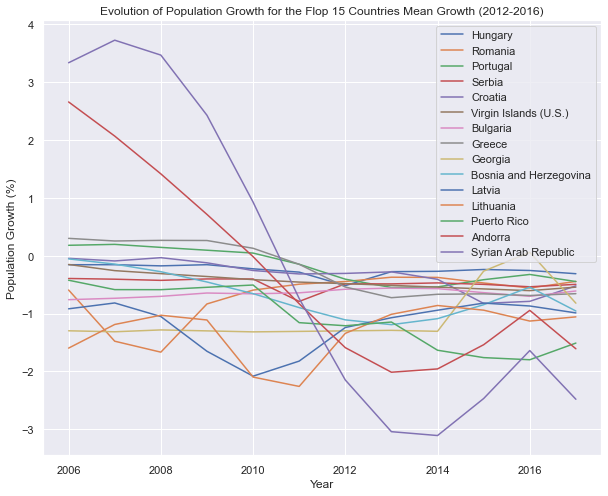

In [197]:
# Let's consider the 15 countries with the lowest mean growth

# Plot
(
df_population_growth_subset_cleaned2
.reset_index(['Country Code', 'Region'])
.drop(['Country Code', 'Region'], axis = 1)
.tail(15)
.T.plot(figsize = (10,8), title = 'Evolution of Population Growth for the Flop 15 Countries Mean Growth (2012-2016)', xlabel = 'Year', ylabel = 'Population Growth (%)')
.legend(loc = 'upper right')
)
plt.show()

# Discussion :
# Population Growth appears to be a volatile indicator through time.
# Likewise this second graph confirms our choice of considering at least 5 consecutive years to get a true tendency.
# It also confirms our strategy of imputng missing values by the mean in Clean 2 section.

#### Plot 3 - (Hist Plot) Population Growth Distribution

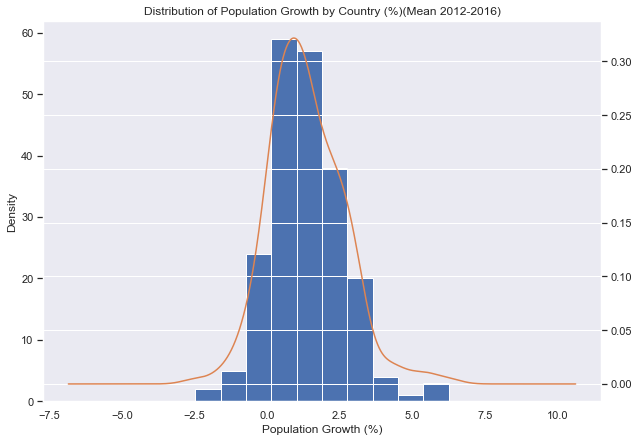

In [198]:
# Plot hist
ax = df_population_growth_subset_cleaned2["Population Growth (%)(Mean 2012-2016)"].plot(kind = 'hist', figsize = (10,7), title = 'Distribution of Population Growth by Country (%)(Mean 2012-2016)')
                                                                                                                                                                 
# Plot kde
df_population_growth_subset_cleaned2["Population Growth (%)(Mean 2012-2016)"].plot(kind = 'kde', ax = ax, secondary_y = True)
ax.set_xlabel("Population Growth (%)")
ax.set_ylabel("Density")                
plt.show()

# Discussion :
# Exploration.

## Variable "GDP per capita, PPP (current international $)" 

### Initial analysis

In [199]:
# Let's create a sub dataframe stemming from Data for 'Population, ages 15-24, total' variable called df_population_15_24
# 'create_dataframe_from_given_dataframe_and_variable' function is defined in script.py. 
# This function extracts rows for which Indicator Name equals 'Population, ages 15-24, total' and it factors code which will be repeated for each sub dataframe creation stemming from Data.
df_gdp_capita_ppp = create_dataframe_from_given_dataframe_and_variable(df_edstats_data_with_country_cleaned_sorted_by_country_code, "GDP per capita, PPP (current international $)")

#Show
df_gdp_capita_ppp.head(5)

214 rows in dataframe
75 columns in dataframe
Index(['Country Code', 'Short Name', 'Long Name', 'Region', 'Currency Unit',
       'Income Group', 'Country Name', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')


Country Code   Short Name                     Long Name  \
1247           ABW        Aruba                         Aruba   
4912           AFG  Afghanistan  Islamic State of Afghanistan   
8577           AGO       Angola   People's Republic of Angola   
12242          ALB      Albania           Republic of Albania   
15907          AND      Andorra       Principality of Andorra   

                          Region   Currency Unit          Income Group  \
1247   Latin America & Caribbean   Aruban florin  High income: nonOECD   
4912                  South Asia  Afghan afghani            Low income   
8577          Sub-Saharan Africa  Angolan kwanza   Upper middle income   
12242      Europe & Central Asia    Albanian lek   Upper middle income   
15907      Europe & Central Asia            Euro  High income: nonOECD   

      Country Name                                 Indicator Name  \
1247         Aruba  GDP per capita, PPP (current international $)   
4912   Afghanistan  GDP per capita, PPP (current international $)   
8577        Angola  GDP per capita, PPP (current international $)   
12242      Albania  GDP per capita, PPP (current international $)   
15907      Andorra  GDP per capita, PPP (current international $)   

          Indicator Code  1970  1971  1972  1973  1974  1975  1976  1977  \
1247   NY.GDP.PCAP.PP.CD   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4912   NY.GDP.PCAP.PP.CD   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8577   NY.GDP.PCAP.PP.CD   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
12242  NY.GDP.PCAP.PP.CD   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
15907  NY.GDP.PCAP.PP.CD   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1978  1979  1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  \
1247    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4912    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8577    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
12242   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
15907   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

              1990         1991         1992         1993         1994  \
1247           NaN          NaN          NaN          NaN          NaN   
4912           NaN          NaN          NaN          NaN          NaN   
8577   2840.200763  2811.287126  2591.326276  1932.804031  1978.438032   
12242  2721.615212  1992.073688  1902.286383  2147.575112  2389.946945   
15907          NaN          NaN          NaN          NaN          NaN   

              1995         1996         1997         1998         1999  \
1247           NaN          NaN          NaN          NaN          NaN   
4912           NaN          NaN          NaN          NaN          NaN   
8577   2162.917203  2380.132838  2541.712498  2670.620030  2721.155559   
12242  2781.413989  3109.183498  2837.351504  3208.957773  3690.688729   
15907          NaN          NaN          NaN          NaN          NaN   

              2000         2001         2002         2003         2004  \
1247           NaN          NaN          NaN          NaN          NaN   
4912           NaN          NaN   875.517610   922.829449   916.334475   
8577   2781.258140  2870.036714  2620.889012  2715.943441  2985.598585   
12242  4026.537422  4463.632986  4754.675856  5114.784779  5524.921661   
15907          NaN          NaN          NaN          NaN          NaN   

              2005         2006         2007         2008         2009  \
1247           NaN          NaN          NaN          NaN          NaN   
4912   1011.595524  1065.619665  1210.479265  1247.066144  1482.098837   
8577   3516.402658  4222.663033  5128.361253  5743.110048  5718.694408   
12242  5942.870083  6634.779222  7289.632366  8228.357428  8823.802984   
15907          NaN          NaN          NaN          NaN          NaN   

              2010          201

In [200]:
# Check stats
df_gdp_capita_ppp.describe()

1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  \
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
min     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
25%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
50%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
75%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
max     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1982  1983  1984  1985  1986  1987  1988  1989          1990  \
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0    165.000000   
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   7498.041452   
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   9527.963414   
min     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    244.659208   
25%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   1538.537488   
50%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   3901.571700   
75%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   9259.512727   
max     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  71786.112834   

               1991          1992          1993          1994          1995  \
count    167.000000    169.000000    170.000000    171.000000    179.000000   
mean    7762.704032   7922.853762   8099.806949   8362.578273   8908.861125   
std     9766.444255  10013.929542  10178.997072  10562.104874  11392.893165   
min      258.472079    242.001214    239.484029    190.152757    180.406167   
25%     1700.534727   1629.103356   1586.326380   1554.214002   1705.557749   
50%     4053.249154   4215.422718   4337.702674   4353.565120   4587.984869   
75%     9803.602319  10158.370704  10824.160903  10892.691619  11089.874822   
max    70641.765656  70495.960531  69085.125988  71492.929599  74045.229872   

               1996          1997          1998          1999          2000  \
count    180.000000    181.000000    181.000000    182.000000    186.000000   
mean    9232.559731   9867.422055  10129.136671  10494.807730  11436.703915   
std    11698.685787  12359.493038  12444.446710  12766.652170  14549.682320   
min      194.902924    374.101460    412.260821    439.814170    419.463914   
25%     1818.178055   1893.041787   2015.105575   2096.221887   2119.115121   
50%     4832.892691   5073.929304   5305.126295   5524.677762   5864.842519   
75%    11597.383259  13042.457072  13653.982110  14167.786717  14600.868080   
max    75977.393419  79612.867769  76783.542470  76193.700478  85860.611440   

               2001          2002          2003           2004          2005  \
count    188.000000    189.000000    189.000000     189.000000    189.000000   
mean   11766.936344  12084.122575  12588.053629   13501.234351  14241.408870   
std    14838.908901  15172.028351  15699.594624   16824.670674  17374.139859   
min      408.574400    414.722773    433.079475     460.247641    488.388087   
25%     2156.307808   2178.386398   2288.356703    2431.841423   2578.510535   
50%     6103.675317   6360.968733   6555.372742    7169.972305   7759.697173   
75%    14422.369295  14559.348774  15479.221808   16633.544407  18065.805027   
max    87599.296411  91083.791524  90348.993723  100426.546129  97767.190344   

                2006           2007           2008           2009  \
count     189.000000     189.000000     190.000000     190.000000   
mean    15413.388541   16393.908342   16955.509500   16460.808686   
std     18694.146333   19510.798513   19819.008748   18812.565342   
min       513.379691     542.061729     568.083478     569.535006   
25%      2685.119660    2975.829590    3170.133338    3158.424283   
50%      8405.601170    9077.608209    9471.125011    9635.594784   
75%     2

In [201]:
# Check data type
df_gdp_capita_ppp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1247 to 781892
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    214 non-null    object 
 1   Short Name      214 non-null    object 
 2   Long Name       214 non-null    object 
 3   Region          214 non-null    object 
 4   Currency Unit   214 non-null    object 
 5   Income Group    214 non-null    object 
 6   Country Name    214 non-null    object 
 7   Indicator Name  214 non-null    object 
 8   Indicator Code  214 non-null    object 
 9   1970            0 non-null      float64
 10  1971            0 non-null      float64
 11  1972            0 non-null      float64
 12  1973            0 non-null      float64
 13  1974            0 non-null      float64
 14  1975            0 non-null      float64
 15  1976            0 non-null      float64
 16  1977            0 non-null      float64
 17  1978            0 non-null   

<AxesSubplot:>

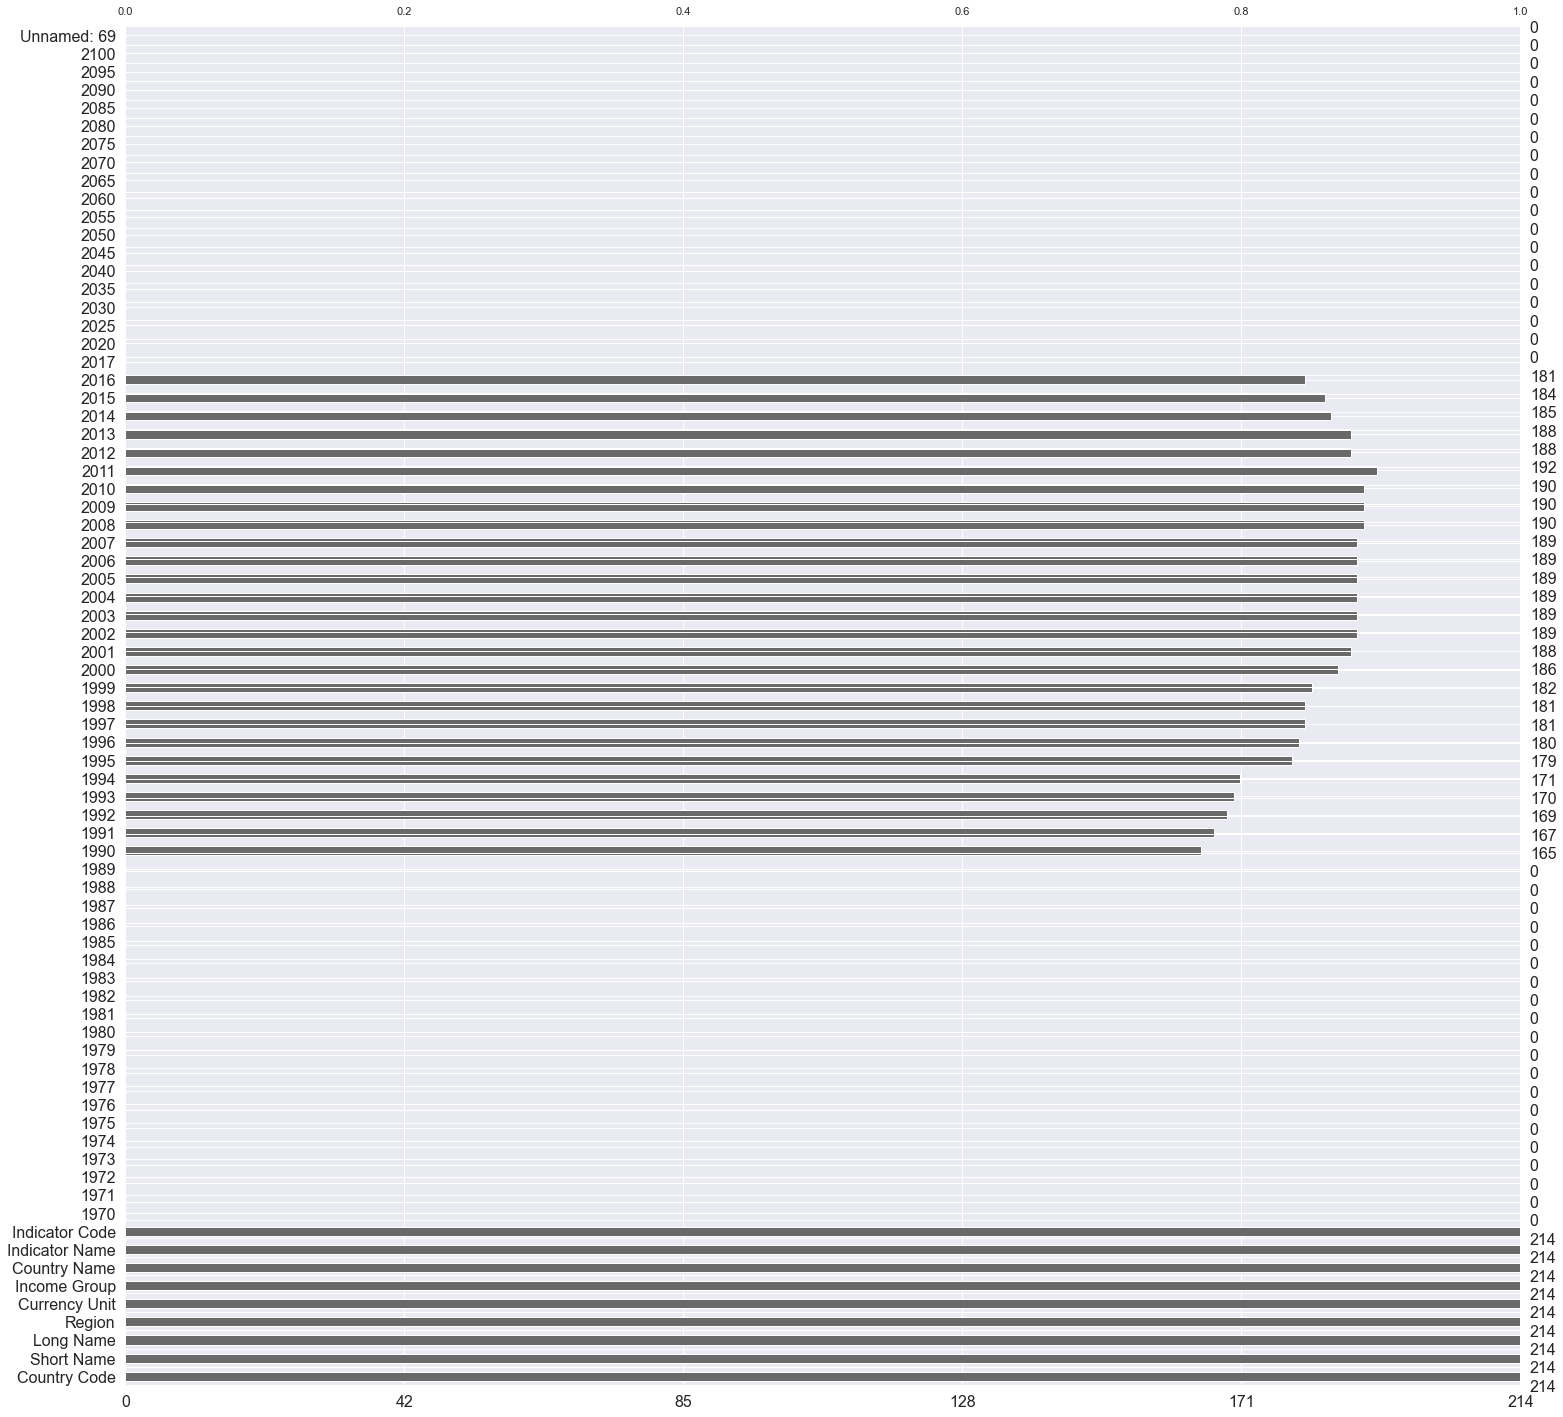

In [202]:
# Check missing data
msno.bar(df_gdp_capita_ppp)

### Select columns from 2011 to 2016

In [203]:
# Let's start by selecting the relevant time columns for the study of our variable. 
# 'select_columns' function is defined in script.py. 
# Discussion :
# Although only the last years are likely relevant for our analysis we will select all available years with data for exploration purposes.
# (cf. Plot)
df_gdp_capita_ppp_subset = select_columns(df_gdp_capita_ppp,'1990','2016')

#Change index to "REFERENCE_VARIABLE"
df_gdp_capita_ppp_subset = df_gdp_capita_ppp_subset.set_index(REFERENCE_VARIABLE)

# Show
df_gdp_capita_ppp_subset.head()

1990         1991  \
Country Name Country Code Region                                                
Aruba        ABW          Latin America & Caribbean          NaN          NaN   
Afghanistan  AFG          South Asia                         NaN          NaN   
Angola       AGO          Sub-Saharan Africa         2840.200763  2811.287126   
Albania      ALB          Europe & Central Asia      2721.615212  1992.073688   
Andorra      AND          Europe & Central Asia              NaN          NaN   

                                                            1992         1993  \
Country Name Country Code Region                                                
Aruba        ABW          Latin America & Caribbean          NaN          NaN   
Afghanistan  AFG          South Asia                         NaN          NaN   
Angola       AGO          Sub-Saharan Africa         2591.326276  1932.804031   
Albania      ALB          Europe & Central Asia      1902.286383  2147.575112   
Andorra      AND          Europe & Central Asia              NaN          NaN   

                                                            1994         1995  \
Country Name Country Code Region                                                
Aruba        ABW          Latin America & Caribbean          NaN          NaN   
Afghanistan  AFG          South Asia                         NaN          NaN   
Angola       AGO          Sub-Saharan Africa         1978.438032  2162.917203   
Albania      ALB          Europe & Central Asia      2389.946945  2781.413989   
Andorra      AND          Europe & Central Asia              NaN          NaN   

                                                            1996         1997  \
Country Name Country Code Region                                                
Aruba        ABW          Latin America & Caribbean          NaN          NaN   
Afghanistan  AFG          South Asia                         NaN          NaN   
Angola       AGO          Sub-Saharan Africa         2380.132838  2541.712498   
Albania      ALB          Europe & Central Asia      3109.183498  2837.351504   
Andorra      AND          Europe & Central Asia              NaN          NaN   

                                                            1998         1999  \
Country Name Country Code Region                                                
Aruba        ABW          Latin America & Caribbean          NaN          NaN   
Afghanistan  AFG          South Asia                         NaN          NaN   
Angola       AGO          Sub-Saharan Africa         2670.620030  2721.155559   
Albania      ALB          Europe & Central Asia      3208.957773  3690.688729   
Andorra      AND          Europe & Central Asia              NaN          NaN   

                                                            2000         2001  \
Country Name Country Code Region                                                
Aruba        ABW          Latin America & Caribbean          NaN          NaN   
Afghanistan  AFG          South Asia                         NaN          NaN   
Angola       AGO          Sub-Saharan Africa         2781.258140  2870.036714   
Albania      ALB          Europe & Central Asia      4026.537422  4463.632986   
Andorra      AND          Europe & Central Asia              NaN          NaN   

                                                            2002         2003  \
Country Name Country Code Region                                                
Aruba        ABW          Latin America & Caribbean          NaN          NaN   
Afghanistan  AFG          South Asia                  875.517610   922.829449   
Angola       AGO          Sub-Saharan Africa         2620.889012  2715.943441   
Albania      ALB          Europe & Central Asia      4754.675856  5114.784779   
Andorra      AND          Europe & Central Asia              NaN          NaN   

                                                            2004         2005  \
Cou

In [ ]:
# Check missing data
msno.matrix(df_gdp_capita_ppp_subset)

### Clean 1 - Dismiss rows with full NaN values from 1990 to 2016

In [ ]:
# First let's dismiss rows/countries for which no data is available from 2000 to 2016
df_gdp_capita_ppp_subset_cleaned1 = df_gdp_capita_ppp_subset.dropna(subset=['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'], how = 'all')
#df_gdp_capita_ppp_subset_cleaned1 = df_gdp_capita_ppp_subset.dropna(subset=['2011','2012','2013','2014','2015'], how='all')


# Check missing data
msno.matrix(df_gdp_capita_ppp_subset_cleaned1)


### Clean 2 - Imputation by the last non-NaN value for any NaN values on each row

In [ ]:
# Second let's impute by the last non-NaN value for any NaN value on each row
# Discussion :
# (cf. Plot 1 section)
df_gdp_capita_ppp_subset_cleaned2 = (df_gdp_capita_ppp_subset_cleaned1.T.fillna(method='ffill')).T

# Check missing data
msno.matrix(df_gdp_capita_ppp_subset_cleaned2)

### Filter - Dismiss countries with "Low income" or "Lower middle income" Income Group 

In [ ]:
# Our service could be costly and could require a minimum amount of purchasing power. Population from low income countries might be unable to afford it.

# Display all Income Group possibilities
print("Income group values" + str(df_gdp_capita_ppp["Income Group"].unique()))

# Dismiss rows/countries with "Low income", "Lower middle income" Income Group and 
#df_income_countries_poor = df_gdp_capita_ppp[((df_gdp_capita_ppp['Income Group'] == 'Low income') | (df_gdp_capita_ppp['Income Group'] == 'Lower middle income'))]
df_income_countries_not_poor = df_gdp_capita_ppp[~((df_gdp_capita_ppp['Income Group'] == 'Low income') | (df_gdp_capita_ppp['Income Group'] == 'Lower middle income') | (df_gdp_capita_ppp['Income Group'] == 'High income: nonOECD'))]

# Set index 
df_income_countries_not_poor = df_income_countries_not_poor.set_index(REFERENCE_VARIABLE)

# print rows
print(str(len(df_income_countries_not_poor)) + " rows in real_countries_dataframe dataframe")

# Show
df_income_countries_not_poor.head()

In [ ]:
df_gdp_capita_ppp_subset_cleaned2_filtered = pd.merge(df_income_countries_not_poor['Long Name'], df_gdp_capita_ppp_subset_cleaned2, left_index = True, right_index = True)
df_gdp_capita_ppp_subset_cleaned2_filtered.drop('Long Name', axis = 1, inplace = True)
df_gdp_capita_ppp_subset_cleaned2_filtered

### Ranking "GDP per capita, PPP (current international $)" (2016)

In [ ]:
#Rename
df_gdp_capita_ppp_subset_cleaned2_filtered_ranking_2016 = df_gdp_capita_ppp_subset_cleaned2_filtered.rename(columns = {'2016' : 'GDP per capita, PPP (current international $) (2016)'})

# Sort
df_gdp_capita_ppp_subset_cleaned2_filtered_ranking_2016 = df_gdp_capita_ppp_subset_cleaned2_filtered_ranking_2016.sort_values("GDP per capita, PPP (current international $) (2016)", ascending = False)

# Show column
df_gdp_capita_ppp_subset_cleaned2_filtered_ranking_2016.head(10)

### Plot - Global

#### Plot 1 - Folium

In [ ]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [20, 15], zoom_start = 1.5)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
map.choropleth(geo_data = country_geo, data = df_gdp_capita_ppp_subset_cleaned2_filtered_ranking_2016.reset_index("Country Code"),
                 columns = [REFERENCE_VARIABLE[1], 'GDP per capita, PPP (current international $) (2016)'],
                 key_on = 'feature.id',
                 fill_color = 'YlGnBu', fill_opacity = 0.7, line_opacity = 0.2,
                 legend_name = 'GDP per capita, PPP (current international $) (2016)')

map

#### Plot 2 - (Line Plot) Temporal evolution of the Top 15 countries in 2016 (1990-2016)

In [ ]:
# Plot
(
df_gdp_capita_ppp_subset_cleaned2_filtered_ranking_2016
.reset_index(['Country Code','Region'])
.drop(['Country Code','Region'], axis = 1)
.head(15)
.T.plot(kind = 'line',
          figsize = (12,8),
          xlabel = 'Year',
          ylabel = 'Dollar',
          title = "GDP per Capita PPP (current international $) - Evolution Top 15 Countries in 2016")
)
plt.show()

# Discussion :
# This variable steadily increases through time for all countries.
# This validates our strategy of imputing missing values by the last non-NaN value.

## Variable "Population, ages 15-64, total"

## Population, ages 15-64, total 

### Initial analysis

In [ ]:
# Let's create a sub dataframe stemming from Data for 'Population, ages 15-64, total' variable called df_population_15_64
# 'create_dataframe_from_given_dataframe_and_variable' function is defined in script.py. 
# This function extracts rows for which Indicator Name equals 'Population, ages 15-64, total' and it factors code which will be repeated for each sub dataframe creation stemming from Data.
df_population_15_64 = create_dataframe_from_given_dataframe_and_variable(df_edstats_data_with_country_cleaned_sorted_by_country_code, "Population, ages 15-64, total")

# Show
df_population_15_64.head(5)

In [ ]:
# Check stats
df_population_15_64.describe()

In [ ]:
# Check data type
df_population_15_64.info()

### Select columns from 2010 to 2015

In [ ]:
# Let's start by selecting the relevant time columns for the study of our variable. 
# 'select_columns' function is defined in utils.py. 
# We will select the last 15 years of available data in order to have a look at the evolution of this indicator
df_population_15_64_subset = select_columns(df_population_15_64,'2000','2015')

#Change index to "REFERENCE_VARIABLE"
df_population_15_64_subset = df_population_15_64_subset.set_index(REFERENCE_VARIABLE)

# Check missing data
#msno.bar(df_population_15_64_subset)
msno.matrix(df_population_15_64_subset)


### Clean 1 - Dismiss rows with full NaN values from 2000 to 2015

<AxesSubplot:>

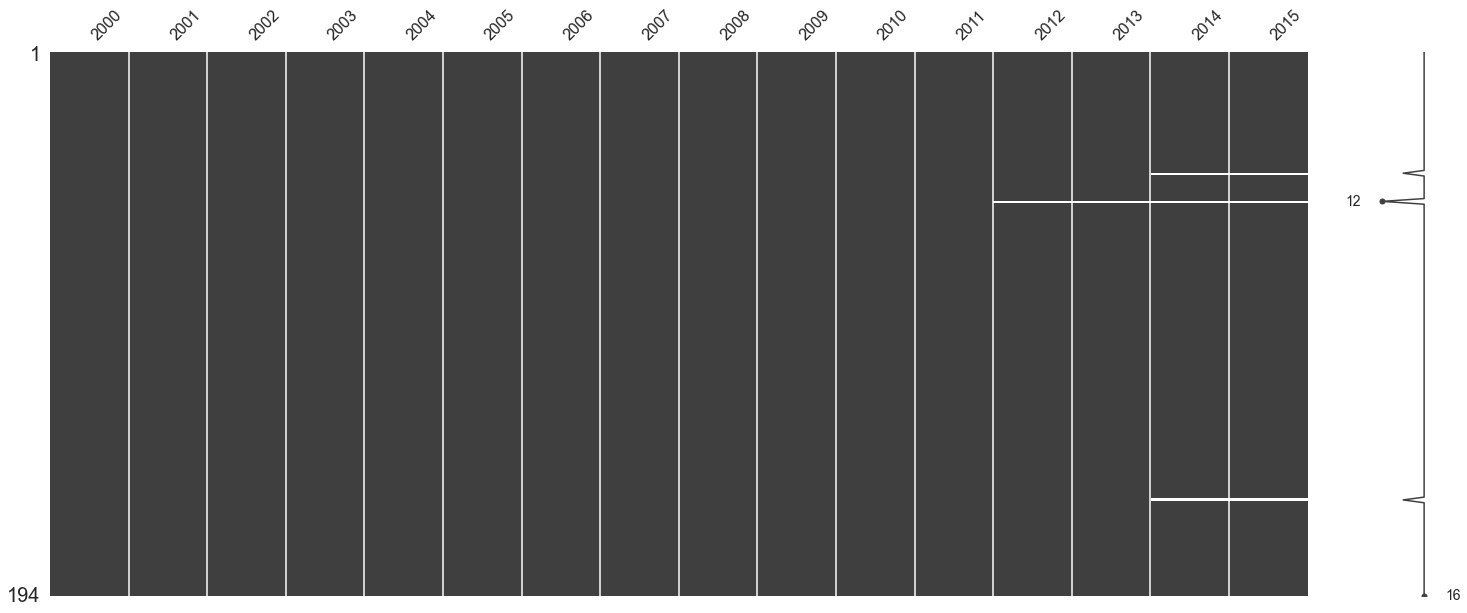

In [216]:
# First let's dismiss rows/countries for which no data is available from 2012 to 2016
df_population_15_64_subset_cleaned1 = df_population_15_64_subset.dropna(subset = ['2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015'], how = 'all')

# Check missing data
msno.matrix(df_population_15_64_subset_cleaned1)

### Clean 2 - Imputation by the last non-NaN value for any NaN values on each row

<AxesSubplot:>

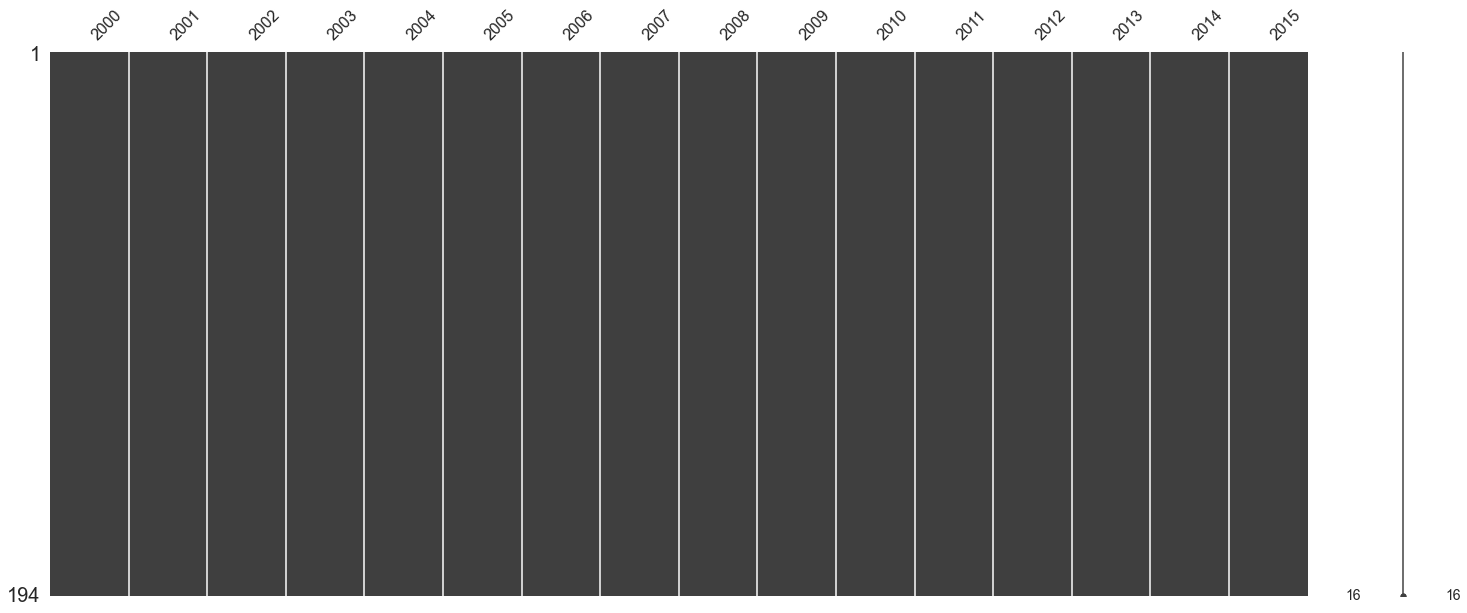

In [217]:
# Second let's impute by the last non-NaN value for any NaN value on each row
df_population_15_64_subset_cleaned2 = df_population_15_64_subset_cleaned1.fillna(method = 'ffill', axis = 1)

# Discussion
# (cf. Plot section)

# Check missing data
msno.matrix(df_population_15_64_subset_cleaned2)


### Ranking "Population, ages 15-64, total" (2015)

In [218]:
# Sort
df_population_15_64_subset_cleaned2 = df_population_15_64_subset_cleaned2.sort_values("2015", ascending = False)

# Show column
df_population_15_64_subset_cleaned2[["2015"]].head(10)

2015
Country Name       Country Code Region                                
China              CHN          East Asia & Pacific        996030376.0
India              IND          South Asia                 860127604.0
United States      USA          North America              212262832.0
Indonesia          IDN          East Asia & Pacific        173087947.0
Brazil             BRA          Latin America & Caribbean  143204007.0
Pakistan           PAK          South Asia                 114567162.0
Bangladesh         BGD          South Asia                 105651107.0
Russian Federation RUS          Europe & Central Asia      100404879.0
Nigeria            NGA          Sub-Saharan Africa          96295997.0
Mexico             MEX          Latin America & Caribbean   83145725.0

### Plot - (Line Plot) Evolution between 2000 and 2014 of the 15 countries with the largest 15-64 population in 2015

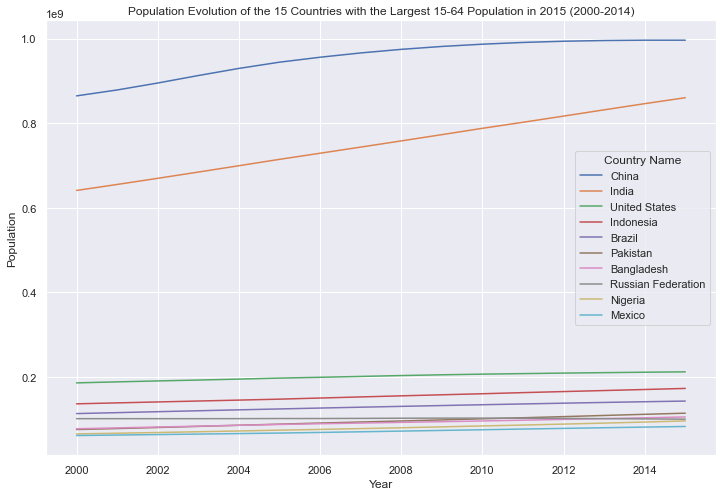

In [219]:
# Plot
(
df_population_15_64_subset_cleaned2
.reset_index(["Country Code","Region"])
.drop(["Country Code","Region"], axis = 1)
.head(10)
.T.plot(kind = 'line', 
          figsize = (12,8),
          xlabel = 'Year',
          ylabel = 'Population',
          title = "Population Evolution of the 15 Countries with the Largest 15-64 Population in 2015 (2000-2014)")
)

plt.show()

# Discussion :
# The population is relatively stable through time but tends to steadily increase for most countries.
# This validates our strategy of imputing missing values by the last non-NaN value.


### Add mean column for values from 2013 to 2015. Sort countries by "mean"

In [220]:
#  Add and fill mean column with each country's computed mean for time period
df_population_15_64_subset_cleaned2["15-64 population (mean 2013-2015)"] = df_population_15_64_subset_cleaned2.iloc[:,14:16].mean(axis = 1)

# Sort
df_population_15_64_subset_cleaned2 = df_population_15_64_subset_cleaned2.sort_values("15-64 population (mean 2013-2015)", ascending = False)

# Show
df_population_15_64_subset_cleaned2

2000  \
Country Name          Country Code Region                                   
China                 CHN          East Asia & Pacific        864439270.0   
India                 IND          South Asia                 640951008.0   
United States         USA          North America              186169060.0   
Indonesia             IDN          East Asia & Pacific        136664788.0   
Brazil                BRA          Latin America & Caribbean  113611797.0   
...                                                                   ...   
Antigua and Barbuda   ATG          Latin America & Caribbean      53414.0   
Virgin Islands (U.S.) VIR          Latin America & Caribbean      71118.0   
Seychelles            SYC          Sub-Saharan Africa             51615.0   
Micronesia, Fed. Sts. FSM          East Asia & Pacific            60120.0   
Tonga                 TON          East Asia & Pacific            54773.0   

                                                                     2001  \
Country Name          Country Code Region                                   
China                 CHN          East Asia & Pacific        878404513.0   
India                 IND          South Asia                 655096984.0   
United States         USA          North America              188578761.0   
Indonesia             IDN          East Asia & Pacific        138928932.0   
Brazil                BRA          Latin America & Caribbean  115838942.0   
...                                                                   ...   
Antigua and Barbuda   ATG          Latin America & Caribbean      54558.0   
Virgin Islands (U.S.) VIR          Latin America & Caribbean      71724.0   
Seychelles            SYC          Sub-Saharan Africa             52568.0   
Micronesia, Fed. Sts. FSM          East Asia & Pacific            60088.0   
Tonga                 TON          East Asia & Pacific            55399.0   

                                                                     2002  \
Country Name          Country Code Region                                   
China                 CHN          East Asia & Pacific        894813926.0   
India                 IND          South Asia                 669605816.0   
United States         USA          North America              190783416.0   
Indonesia             IDN          East Asia & Pacific        141124228.0   
Brazil                BRA          Latin America & Caribbean  118076415.0   
...                                                                   ...   
Antigua and Barbuda   ATG          Latin America & Caribbean      55596.0   
Virgin Islands (U.S.) VIR          Latin America & Caribbean      72134.0   
Seychelles            SYC          Sub-Saharan Africa             54987.0   
Micronesia, Fed. Sts. FSM          East Asia & Pacific            60211.0   
Tonga                 TON          East Asia & Pacific            55727.0   

                                                                     2003  \
Country Name          Country Code Region                                   
China                 CHN          East Asia & Pacific        912514852.0   
India                 IND          South Asia                 684389867.0   
United States         USA          North America              192841977.0   
Indonesia             IDN          East Asia & Pacific        143291315.0   
Brazil                BRA          Latin America & Caribbean  120293448.0   
...                                                                   ...   
Antigua and Barbuda   ATG          Latin America & Caribbean      56482.0   
Virgin Islands (U.S.) VIR          Latin America & Caribbean      72314.0   
Seychelles            SYC          Sub-Saharan Africa             55022.0   
Micronesia, Fed. Sts. FSM          East Asia & Pacific            60408.0   
Tonga                 TON          East Asia & Pacific            55892.0   

                                                             

### Plot - Global

#### Plot 1 - Folium

In [221]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [20, 15], zoom_start = 1.5)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
map.choropleth(geo_data = country_geo, data = df_population_15_64_subset_cleaned2.reset_index(REFERENCE_VARIABLE),
                 columns = [REFERENCE_VARIABLE[1], '15-64 population (mean 2013-2015)'],
                 key_on = 'feature.id',
                 fill_color = 'YlGnBu', fill_opacity = 0.7, line_opacity = 0.2,
                 legend_name = '15-64 population (mean 2013-2015')

map

/Users/romain/opt/anaconda3/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


#### Plot 2 - (Stacked bar plot) Evolution of the cumulative contribution of each Top 10 countries for 15-64 population

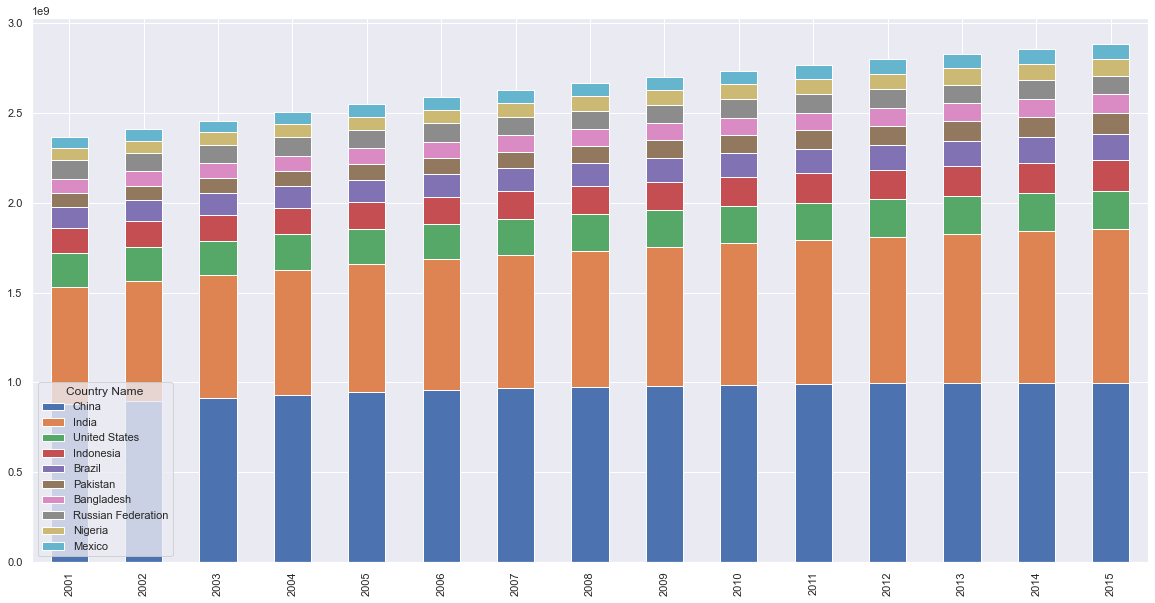

In [222]:
(df_population_15_64_subset_cleaned2
.iloc[:,1:16]
.head(10)
.reset_index(["Country Code","Region"])
.drop(["Country Code","Region"], axis =1)
.T
.plot.bar(stacked = True, figsize = (20,10))
)

plt.show()

## Variable "Enrolment in tertiary education, all programmes, both sexes (number)"

### Initial analysis

In [223]:
# Let's create a sub dataframe stemming from Data for 'Enrolment in tertiary education, all programmes, both sexes (number)' variable called df_enrolment_tertiary_education.
# 'create_dataframe_from_given_dataframe_and_variable' function is defined in utils.py. 
# This function extracts rows for which Indicator Name equals 'Enrolment in tertiary education, all programmes, both sexes (number)' and it factors code which is repeated for each sub dataframe creation stemming from Data.
df_enrolment_tertiary_education = create_dataframe_from_given_dataframe_and_variable(df_edstats_data_with_country_cleaned_sorted_by_country_code, "Enrolment in tertiary education, all programmes, both sexes (number)")

# Show
df_enrolment_tertiary_education

214 rows in dataframe
75 columns in dataframe
Index(['Country Code', 'Short Name', 'Long Name', 'Region', 'Currency Unit',
       'Income Group', 'Country Name', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')


Country Code    Short Name                     Long Name  \
1204            ABW         Aruba                         Aruba   
4869            AFG   Afghanistan  Islamic State of Afghanistan   
8534            AGO        Angola   People's Republic of Angola   
12199           ALB       Albania           Republic of Albania   
15864           AND       Andorra       Principality of Andorra   
...             ...           ...                           ...   
767189          XKX        Kosovo            Republic of Kosovo   
770854          YEM         Yemen             Republic of Yemen   
774519          ZAF  South Africa      Republic of South Africa   
778184          ZMB        Zambia            Republic of Zambia   
781849          ZWE      Zimbabwe          Republic of Zimbabwe   

                            Region       Currency Unit          Income Group  \
1204     Latin America & Caribbean       Aruban florin  High income: nonOECD   
4869                    South Asia      Afghan afghani            Low income   
8534            Sub-Saharan Africa      Angolan kwanza   Upper middle income   
12199        Europe & Central Asia        Albanian lek   Upper middle income   
15864        Europe & Central Asia                Euro  High income: nonOECD   
...                            ...                 ...                   ...   
767189       Europe & Central Asia                Euro   Lower middle income   
770854  Middle East & North Africa         Yemeni rial   Lower middle income   
774519          Sub-Saharan Africa  South African rand   Upper middle income   
778184          Sub-Saharan Africa  New Zambian kwacha   Lower middle income   
781849          Sub-Saharan Africa         U.S. dollar            Low income   

        Country Name                                     Indicator Name  \
1204           Aruba  Enrolment in tertiary education, all programme...   
4869     Afghanistan  Enrolment in tertiary education, all programme...   
8534          Angola  Enrolment in tertiary education, all programme...   
12199        Albania  Enrolment in tertiary education, all programme...   
15864        Andorra  Enrolment in tertiary education, all programme...   
...              ...                                                ...   
767189        Kosovo  Enrolment in tertiary education, all programme...   
770854   Yemen, Rep.  Enrolment in tertiary education, all programme...   
774519  South Africa  Enrolment in tertiary education, all programme...   
778184        Zambia  Enrolment in tertiary education, all programme...   
781849      Zimbabwe  Enrolment in tertiary education, all programme...   

       Indicator Code     1970     1971     1972     1973     1974     1975  \
1204      SE.TER.ENRL      NaN      NaN      NaN      NaN      NaN      NaN   
4869      SE.TER.ENRL   7732.0   9409.0   9817.0  11487.0  10956.0  12256.0   
8534      SE.TER.ENRL      NaN      NaN      NaN      NaN      NaN      NaN   
12199     SE.TER.ENRL      NaN  25469.0  28668.0      NaN      NaN      NaN   
15864     SE.TER.ENRL      NaN      NaN      NaN      NaN      NaN      NaN   
...               ...      ...      ...      ...      ...      ...      ...   
767189    SE.TER.ENRL      NaN      NaN      NaN      NaN      NaN      NaN   
770854    SE.TER.ENRL      NaN      NaN      NaN      NaN      NaN      NaN   
774519    SE.TER.ENRL  82697.0      NaN      NaN  98577.0      NaN      NaN   
778184    SE.TER.ENRL   1433.0      NaN      NaN      NaN   4681.0   8403.0   
781849    SE.TER.ENRL      NaN   6878.0   7210.0   7850.0   7819.0   8479.0   

           1976     1977     1978     1979    1980     1981     1982     1983  \
1204        NaN      NaN      NaN      NaN     NaN      NaN      NaN      NaN   
4869    14214.0  16147.0  21118.0  22974.0     NaN      NaN  19652.0      NaN   
8534        NaN      NaN      NaN      NaN     NaN      NaN      NaN      NaN   
12199       NaN      NaN  14695.0      NaN     NaN  14568.0      Na

In [224]:
# Check stats
df_enrolment_tertiary_education.describe()

1970          1971          1972          1973          1974  \
count  3.700000e+01  1.210000e+02  1.110000e+02  1.120000e+02  1.080000e+02   
mean   1.935802e+05  2.328296e+05  2.293924e+05  2.603178e+05  2.585403e+05   
std    8.531918e+05  9.513977e+05  9.990922e+05  1.053834e+06  1.074307e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  1.480000e+02  1.100000e+02   
25%    1.975000e+03  1.706000e+03  2.641500e+03  2.495000e+03  2.350250e+03   
50%    9.515000e+03  1.404700e+04  1.940800e+04  2.087500e+04  2.071650e+04   
75%    8.269700e+04  8.577600e+04  1.022260e+05  1.096455e+05  1.221270e+05   
max    5.212600e+06  8.498117e+06  8.948645e+06  9.297787e+06  9.602123e+06   

               1975          1976          1977          1978          1979  \
count  1.110000e+02  1.100000e+02  1.110000e+02  1.120000e+02  1.200000e+02   
mean   2.727973e+05  3.488490e+05  3.235229e+05  3.348312e+05  3.267719e+05   
std    1.116353e+06  1.240381e+06  1.219257e+06  1.244513e+06  1.205623e+06   
min    1.210000e+02  0.000000e+00  2.000000e+01  2.100000e+01  1.300000e+01   
25%    2.570000e+03  3.001500e+03  3.338000e+03  3.285250e+03  2.498000e+03   
50%    2.628900e+04  4.026550e+04  3.076400e+04  3.200000e+04  3.757350e+04   
75%    1.321165e+05  1.640852e+05  1.326290e+05  1.499622e+05  1.408542e+05   
max    1.022373e+07  1.118486e+07  1.101214e+07  1.128579e+07  1.126009e+07   

               1980          1981          1982          1983          1984  \
count  1.190000e+02  1.370000e+02  1.230000e+02  1.190000e+02  1.230000e+02   
mean   3.422573e+05  3.348264e+05  3.537271e+05  3.860125e+05  3.830388e+05   
std    1.237692e+06  1.209792e+06  1.286057e+06  1.324021e+06  1.320274e+06   
min    1.500000e+01  0.000000e+00  1.400000e+01  2.900000e+01  5.800000e+01   
25%    2.059500e+03  2.861000e+03  4.348000e+03  4.693000e+03  4.301500e+03   
50%    3.526800e+04  4.194800e+04  4.519600e+04  4.655400e+04  4.147700e+04   
75%    1.745520e+05  1.517330e+05  1.652480e+05  1.810920e+05  1.817825e+05   
max    1.156990e+07  1.209690e+07  1.237167e+07  1.242578e+07  1.246466e+07   

               1985          1986          1987          1988          1989  \
count  1.190000e+02  1.320000e+02  1.170000e+02  1.160000e+02  1.230000e+02   
mean   4.055619e+05  4.252867e+05  4.414091e+05  4.781886e+05  4.693105e+05   
std    1.333918e+06  1.291147e+06  1.392474e+06  1.406745e+06  1.402903e+06   
min    5.900000e+01  0.000000e+00  2.660000e+02  1.940000e+02  6.800000e+01   
25%    4.439000e+03  6.535750e+03  5.536000e+03  7.571500e+03  7.555500e+03   
50%    3.991300e+04  7.216250e+04  4.573100e+04  9.697000e+04  8.081800e+04   
75%    1.929985e+05  2.382928e+05  2.522360e+05  3.073502e+05  2.556060e+05   
max    1.224194e+07  1.224706e+07  1.250351e+07  1.276600e+07  1.305500e+07   

               1990          1991          1992          1993          1994  \
count  1.230000e+02  1.230000e+02  1.170000e+02  1.110000e+02  1.030000e+02   
mean   4.934393e+05  5.187733e+05  4.857427e+05  4.929357e+05  5.917183e+05   
std    1.448400e+06  1.472907e+06  1.499791e+06  1.528045e+06  1.617464e+06   
min    2.480000e+02  0.000000e+00  5.300000e+01  6.100000e+01  7.500000e+01   
25%    9.845000e+03  8.438500e+03  7.981000e+03  8.491500e+03  2.255300e+04   
50%    8.513800e+04  8.866800e+04  7.884800e+04  8.778000e+04  1.067950e+05   
75%    2.879645e+05  2.846725e+05  2.533900e+05  2.575970e+05  3.181830e+05   
max    1.353800e+07  1.371015e+07  1.436096e+07  1.448630e+07  1.430535e+07   

               1995          1996          1997          1998          1999  \
count  1.100000e+02  1.050000e+02  8.200000e+01  8.600000e+01  1.320000e+02   
mean   6.270263e+05  6.408677e+05  5.775991e+05  7.757835e+05  6.006312e+05   
std    1.644808e+06  1.691993e+06  1.183326e+06  1.756881e+06  1.526591e+06   
min    1.591000e+03  1.300000e+02  1.610000e+02  1.482000e+03  1.750000e+02   
25%    2.602375e+04  1.340100e+04  2.664075e+04  3.109775e+0

In [225]:
# Check data type
df_enrolment_tertiary_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1204 to 781849
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    214 non-null    object 
 1   Short Name      214 non-null    object 
 2   Long Name       214 non-null    object 
 3   Region          214 non-null    object 
 4   Currency Unit   214 non-null    object 
 5   Income Group    214 non-null    object 
 6   Country Name    214 non-null    object 
 7   Indicator Name  214 non-null    object 
 8   Indicator Code  214 non-null    object 
 9   1970            37 non-null     float64
 10  1971            121 non-null    float64
 11  1972            111 non-null    float64
 12  1973            112 non-null    float64
 13  1974            108 non-null    float64
 14  1975            111 non-null    float64
 15  1976            110 non-null    float64
 16  1977            111 non-null    float64
 17  1978            112 non-null 

<AxesSubplot:>

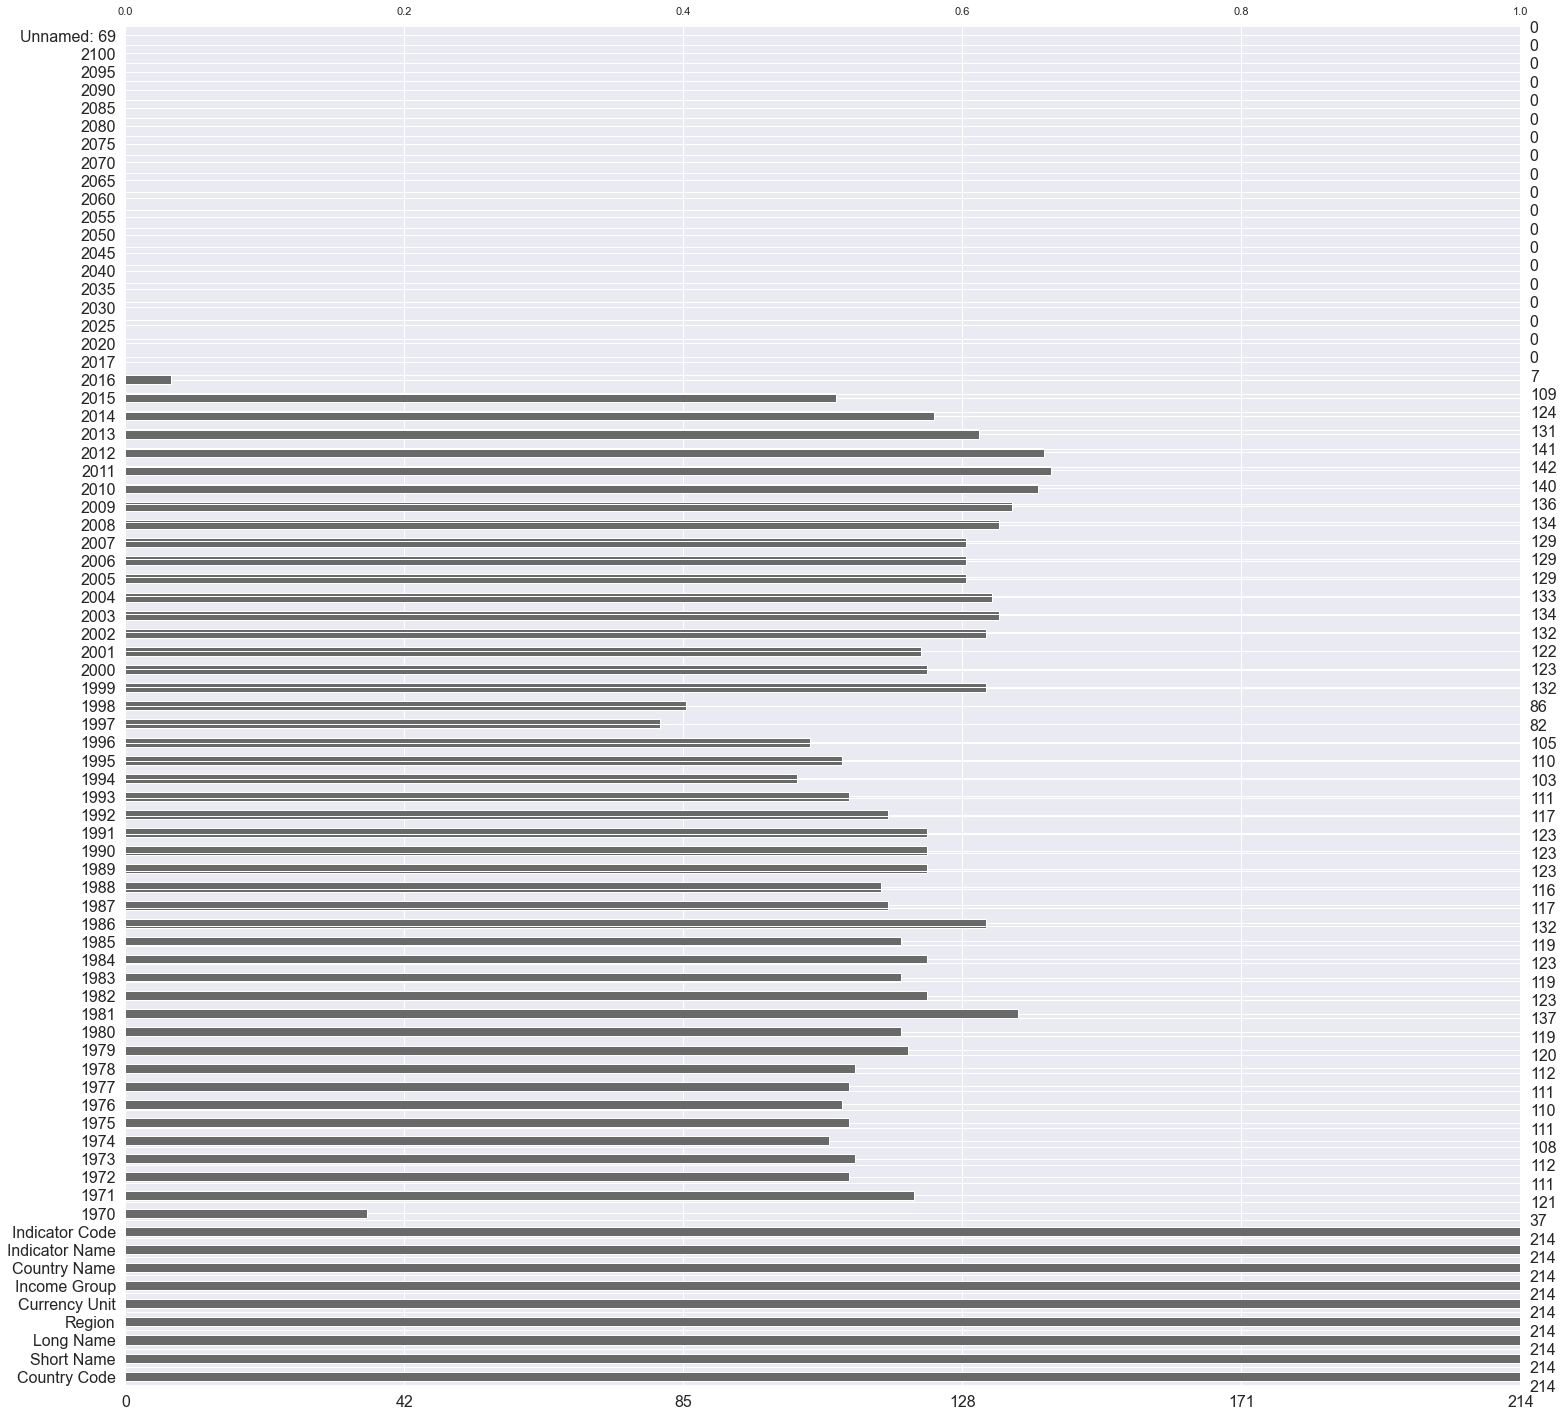

In [226]:
# Check missing data
msno.bar(df_enrolment_tertiary_education)

### Select columns from 2010 to 2014

<AxesSubplot:>

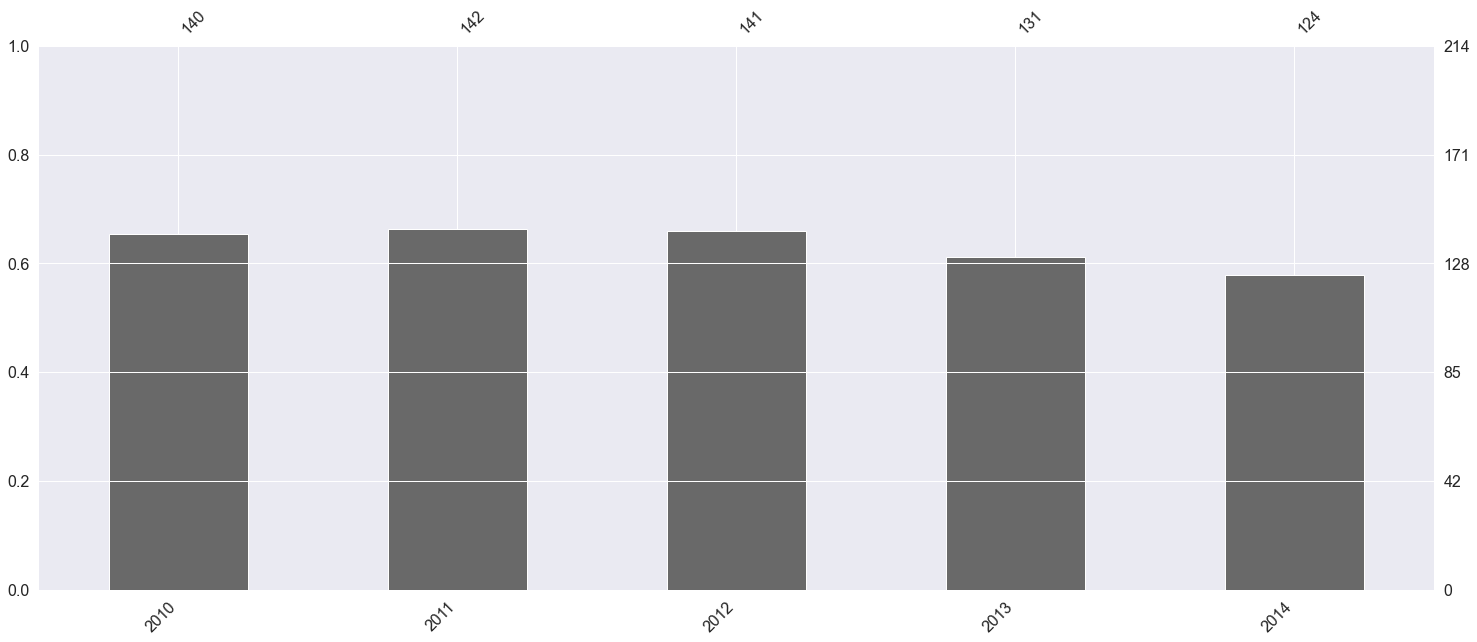

In [227]:
# Let's start by selecting the relevant time columns for the study of our variable. 
# 'select_columns' function is defined in utils.py. 
# We will select years from 2010 to 2014 to match with the analysis of the following dataframes :
# (df_enrolment_upper_secondary_education, df_enrolment_upper_secondary_education)
df_enrolment_tertiary_education_subset = select_columns(df_enrolment_tertiary_education,'2010','2014')

# Change index to "REFERENCE_VARIABLE"
df_enrolment_tertiary_education_subset = df_enrolment_tertiary_education_subset.set_index(REFERENCE_VARIABLE)

# Check missing data
msno.bar(df_enrolment_tertiary_education_subset)

###  Clean 1 - Dismiss rows with full NaN values from 2010 to 2014

<AxesSubplot:>

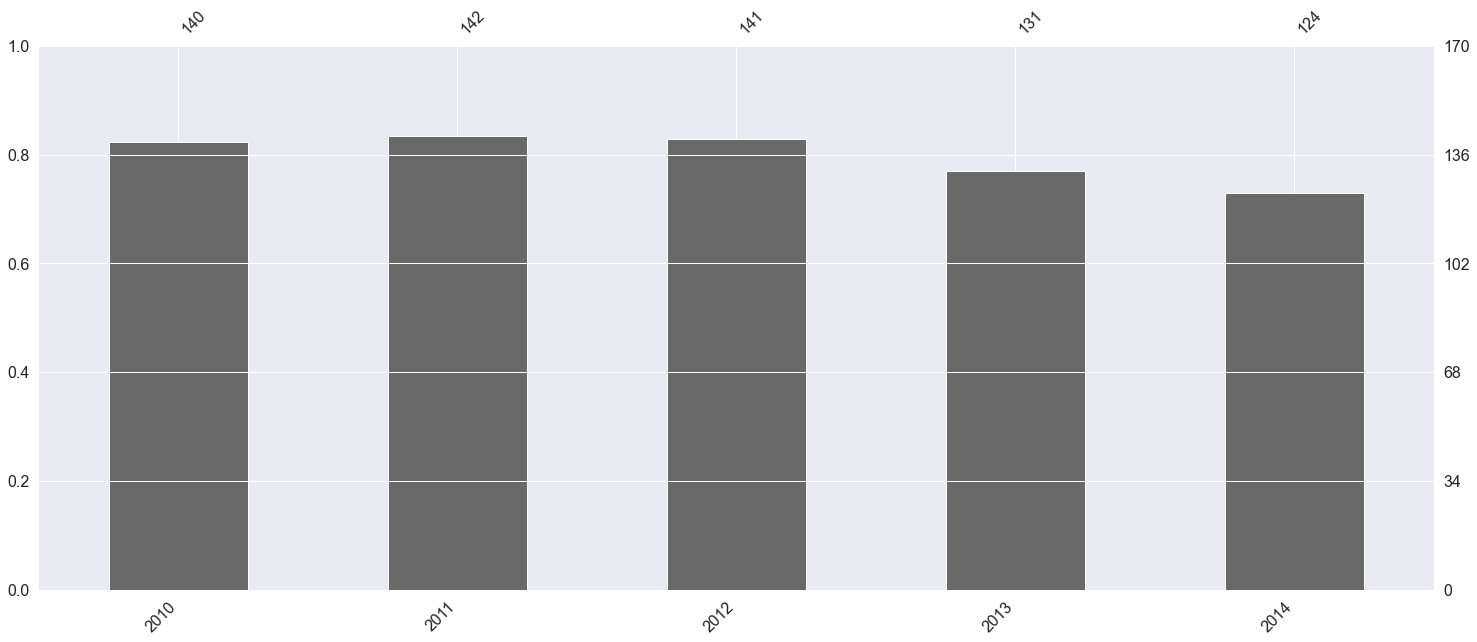

In [228]:
# First let's dismiss rows/countries for which no data is available from 2010 to 2014
df_enrolment_tertiary_education_subset_cleaned1 = df_enrolment_tertiary_education_subset.dropna(subset=['2010','2011','2012','2013','2014'], how='all')

# Check missing data
msno.bar(df_enrolment_tertiary_education_subset_cleaned1)


### Clean 2 - Imputation by row mean for remaining NaN values

<AxesSubplot:>

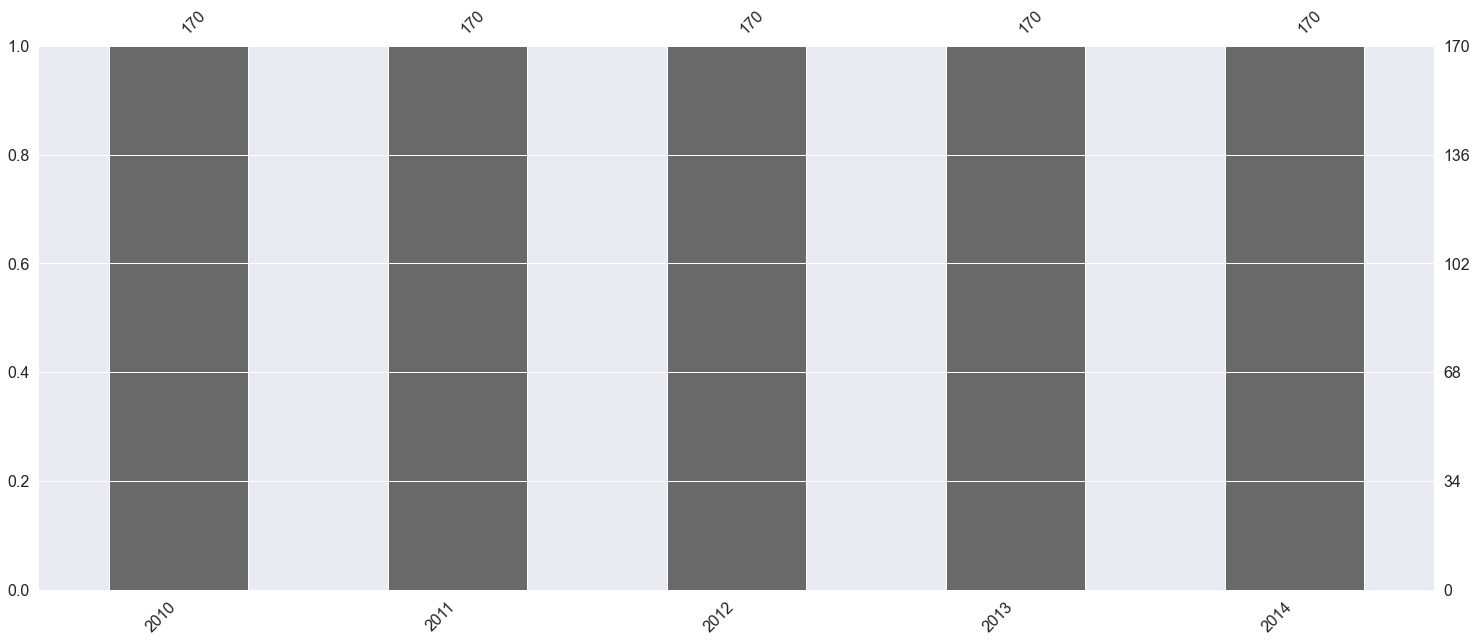

In [229]:
# Second let's impute by the mean for any NaN value on each row as this variable is relatively stable through time
df_enrolment_tertiary_education_subset_cleaned2 = df_enrolment_tertiary_education_subset_cleaned1.T.fillna(df_enrolment_tertiary_education_subset_cleaned1.mean(axis=1)).T

# Check missing data
msno.bar(df_enrolment_tertiary_education_subset_cleaned2)

### Add mean column for values from 2010 to 2014. Sort countries by "mean"

In [230]:
#  Fill mean column with computed means along rows
df_enrolment_tertiary_education_subset_cleaned2["mean"] = df_enrolment_tertiary_education_subset_cleaned2.iloc[:,1:5].mean(axis=1)

# Sort
df_enrolment_tertiary_education_subset_cleaned2 = df_enrolment_tertiary_education_subset_cleaned2.sort_values("mean", ascending=False)

# Show
df_enrolment_tertiary_education_subset_cleaned2


2010  \
Country Name              Country Code Region                                   
China                     CHN          East Asia & Pacific        31046736.00   
India                     IND          South Asia                 20740740.00   
United States             USA          North America              20427708.00   
Russian Federation        RUS          Europe & Central Asia       7789903.25   
Brazil                    BRA          Latin America & Caribbean   6552707.00   
...                                                                       ...   
Palau                     PLW          East Asia & Pacific             863.00   
Andorra                   AND          Europe & Central Asia           509.00   
Seychelles                SYC          Sub-Saharan Africa              251.25   
Sint Maarten (Dutch part) SXM          Latin America & Caribbean       176.50   
Turks and Caicos Islands  TCA          Latin America & Caribbean         5.00   

                                                                        2011  \
Country Name              Country Code Region                                  
China                     CHN          East Asia & Pacific        31308378.0   
India                     IND          South Asia                 26650952.0   
United States             USA          North America              21016126.0   
Russian Federation        RUS          Europe & Central Asia       8652607.0   
Brazil                    BRA          Latin America & Caribbean   6929324.0   
...                                                                      ...   
Palau                     PLW          East Asia & Pacific             863.0   
Andorra                   AND          Europe & Central Asia           509.0   
Seychelles                SYC          Sub-Saharan Africa              189.0   
Sint Maarten (Dutch part) SXM          Latin America & Caribbean       176.5   
Turks and Caicos Islands  TCA          Latin America & Caribbean         5.0   

                                                                        2012  \
Country Name              Country Code Region                                  
China                     CHN          East Asia & Pacific        32585960.0   
India                     IND          South Asia                 28568408.0   
United States             USA          North America              20994112.0   
Russian Federation        RUS          Europe & Central Asia       7983111.0   
Brazil                    BRA          Latin America & Caribbean   7241405.0   
...                                                                      ...   
Palau                     PLW          East Asia & Pacific             863.0   
Andorra                   AND          Europe & Central Asia           491.0   
Seychelles                SYC          Sub-Saharan Africa              100.0   
Sint Maarten (Dutch part) SXM          Latin America & Caribbean       175.0   
Turks and Caicos Islands  TCA          Latin America & Caribbean         5.0   

                                                                        2013  \
Country Name              Country Code Region                                  
China                     CHN          East Asia & Pacific        34091288.0   
India                     IND          South Asia                 28175136.0   
United States             USA          North America              19972624.0   
Russian Federation        RUS          Europe & Central Asia       7528163.0   
Brazil                    BRA          Latin America & Caribbean   7541112.0   
...                                                                      ...   
Palau                     PLW          East Asia & Pacific             863.0   
Andorra                   AND          Europe & Central Asia           538.0   
Seychelles                SYC          Sub-Saharan Africa              238.0   
Sint Maarten (Dutch part) SXM          Latin America & Ca

## Variable "Enrolment in upper secondary education, both sexes (number)"

### Initial analysis

In [231]:
# Let's create a sub dataframe stemming from Data for 'Enrolment in upper secondary education, both sexes (number)' variable called df_enrolment_upper_secondary_education.
# 'create_dataframe_from_given_dataframe_and_variable' function is defined in utils.py. 
# This function extracts rows for which Indicator Name equals 'Enrolment in upper secondary education, both sexes (number)' and it factors code which is repeated for each sub dataframe creation stemming from Data.
df_enrolment_upper_secondary_education = create_dataframe_from_given_dataframe_and_variable(df_edstats_data_with_country_cleaned_sorted_by_country_code, "Enrolment in upper secondary education, both sexes (number)")

# Show
df_enrolment_upper_secondary_education.head(5)

214 rows in dataframe
75 columns in dataframe
Index(['Country Code', 'Short Name', 'Long Name', 'Region', 'Currency Unit',
       'Income Group', 'Country Name', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')


Country Code   Short Name                     Long Name  \
1214           ABW        Aruba                         Aruba   
4879           AFG  Afghanistan  Islamic State of Afghanistan   
8544           AGO       Angola   People's Republic of Angola   
12209          ALB      Albania           Republic of Albania   
15874          AND      Andorra       Principality of Andorra   

                          Region   Currency Unit          Income Group  \
1214   Latin America & Caribbean   Aruban florin  High income: nonOECD   
4879                  South Asia  Afghan afghani            Low income   
8544          Sub-Saharan Africa  Angolan kwanza   Upper middle income   
12209      Europe & Central Asia    Albanian lek   Upper middle income   
15874      Europe & Central Asia            Euro  High income: nonOECD   

      Country Name                                     Indicator Name  \
1214         Aruba  Enrolment in upper secondary education, both s...   
4879   Afghanistan  Enrolment in upper secondary education, both s...   
8544        Angola  Enrolment in upper secondary education, both s...   
12209      Albania  Enrolment in upper secondary education, both s...   
15874      Andorra  Enrolment in upper secondary education, both s...   

      Indicator Code  1970  1971  1972  1973  1974  1975  1976  1977  1978  \
1214         UIS.E.3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4879         UIS.E.3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8544         UIS.E.3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
12209        UIS.E.3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
15874        UIS.E.3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1979  1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  \
1214    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4879    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8544    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
12209   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
15874   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1991  1992  1993  1994  1995  1996  1997  1998      1999      2000  \
1214    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    3258.0    3119.0   
4879    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN       NaN   
8544    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   70397.0   85461.0   
12209   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  102161.0  104946.0   
15874   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN       NaN       NaN   

           2001      2002      2003      2004      2005      2006      2007  \
1214     3318.0    3525.0    3655.0    3632.0    3678.0    3883.0    4430.0   
4879   159952.0       NaN  115583.0  173356.0  190104.0  271144.0  285290.0   
8544    94167.0  112787.0       NaN       NaN       NaN  197174.0  194933.0   
12209  110996.0  122555.0  132932.0  142449.0  156015.0  164572.0  173269.0   
15874       NaN     805.0     752.0     771.0     951.0    1051.0    1045.0   

           2008      2009      2010      2011      2012      2013      2014  \
1214     4060.0    3976.0    3913.0    3970.0    4841.0       NaN       NaN   
4879   361193.0  443002.0  567344.0  743405.0  881415.0  969267.0  968769.0   
8544   237699.0  257808.0  283340.0  303568.0       NaN       NaN       NaN   
12209  177572.0  132803.0  140657.0  150134.0  152182.0  154425.0  151937.0   
15874    1069.0    1138.0    1221.0    1259.0    1182.0    1160.0    1288.0   

       2015  2016  2017  2020  2025  2030  2035  2040  2045  2050  2055  2060  \
1214    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4879    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8544    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
12209   NaN   NaN   NaN   NaN   NaN   

In [232]:
# Check stats
df_enrolment_upper_secondary_education.describe()

1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  \
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
min     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
25%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
50%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
75%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
max     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  \
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
min     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
25%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
50%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
75%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
max     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1994  1995  1996  1997  1998          1999          2000          2001  \
count   0.0   0.0   0.0   0.0   0.0  1.490000e+02  1.470000e+02  1.470000e+02   
mean    NaN   NaN   NaN   NaN   NaN  9.493828e+05  9.564642e+05  9.708336e+05   
std     NaN   NaN   NaN   NaN   NaN  3.029223e+06  3.243260e+06  3.314673e+06   
min     NaN   NaN   NaN   NaN   NaN  4.240000e+02  2.820000e+02  1.290000e+02   
25%     NaN   NaN   NaN   NaN   NaN  3.044700e+04  3.075650e+04  2.683200e+04   
50%     NaN   NaN   NaN   NaN   NaN  1.260100e+05  1.169210e+05  1.109960e+05   
75%     NaN   NaN   NaN   NaN   NaN  5.436030e+05  5.115880e+05  4.966370e+05   
max     NaN   NaN   NaN   NaN   NaN  2.611589e+07  2.896532e+07  2.958272e+07   

               2002          2003          2004          2005          2006  \
count  1.490000e+02  1.460000e+02  1.570000e+02  1.570000e+02  1.500000e+02   
mean   1.068101e+06  1.163814e+06  9.512382e+05  9.642748e+05  1.221902e+06   
std    3.547054e+06  3.906481e+06  3.197982e+06  3.335527e+06  4.633494e+06   
min    8.050000e+02  4.420000e+02  4.570000e+02  9.510000e+02  1.051000e+03   
25%    2.842500e+04  3.198300e+04  3.170500e+04  3.207800e+04  5.856250e+04   
50%    1.441510e+05  1.555995e+05  1.570130e+05  1.560150e+05  1.895480e+05   
75%    5.617060e+05  6.084602e+05  5.954620e+05  6.157590e+05  6.443660e+05   
max    3.138745e+07  3.420492e+07  3.574840e+07  3.781772e+07  3.920427e+07   

               2007          2008          2009          2010          2011  \
count  1.540000e+02  1.510000e+02  1.510000e+02  1.490000e+02  1.540000e+02   
mean   1.306394e+06  1.372331e+06  1.421509e+06  1.434139e+06  1.428260e+06   
std    4.849292e+06  5.259022e+06  5.325536e+06  5.525380e+06  5.633161e+06   
min    1.045000e+03  1.069000e+03  4.880000e+02  1.221000e+03  1.259000e+03   
25%    5.957900e+04  5.356500e+04  4.334950e+04  4.899900e+04  4.621775e+04   
50%    1.931595e+05  1.900830e+05  2.078660e+05  2.296610e+05  2.270375e+05   
75%    7.258062e+05  7.603560e+05  9.383715e+05  7.765800e+05  7.869322e+05   
max    4.217561e+07  4.499607e+07  4.564643e+07  4.826586e+07  5.167142e+07   

               2012          2013          2014          2015  2016  2017  \
count  1.510000e+02  1.400000e+02  1.170000e+02  7.000000e+00   0.0   0.0   
mean   1.483081e+06  1.652275e+06  1.128038e+06  3.883340e+05   NaN   NaN   
std    5.944636e+06  6.208302e+06  4.301805e+06  5.298411e+05   NaN   NaN   
min    1.182000e+03  1.150000e+03  3.530000e+02  8.000000e+02   NaN   NaN   
25%    5

In [233]:
# Check data type
df_enrolment_upper_secondary_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1214 to 781859
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    214 non-null    object 
 1   Short Name      214 non-null    object 
 2   Long Name       214 non-null    object 
 3   Region          214 non-null    object 
 4   Currency Unit   214 non-null    object 
 5   Income Group    214 non-null    object 
 6   Country Name    214 non-null    object 
 7   Indicator Name  214 non-null    object 
 8   Indicator Code  214 non-null    object 
 9   1970            0 non-null      float64
 10  1971            0 non-null      float64
 11  1972            0 non-null      float64
 12  1973            0 non-null      float64
 13  1974            0 non-null      float64
 14  1975            0 non-null      float64
 15  1976            0 non-null      float64
 16  1977            0 non-null      float64
 17  1978            0 non-null   

<AxesSubplot:>

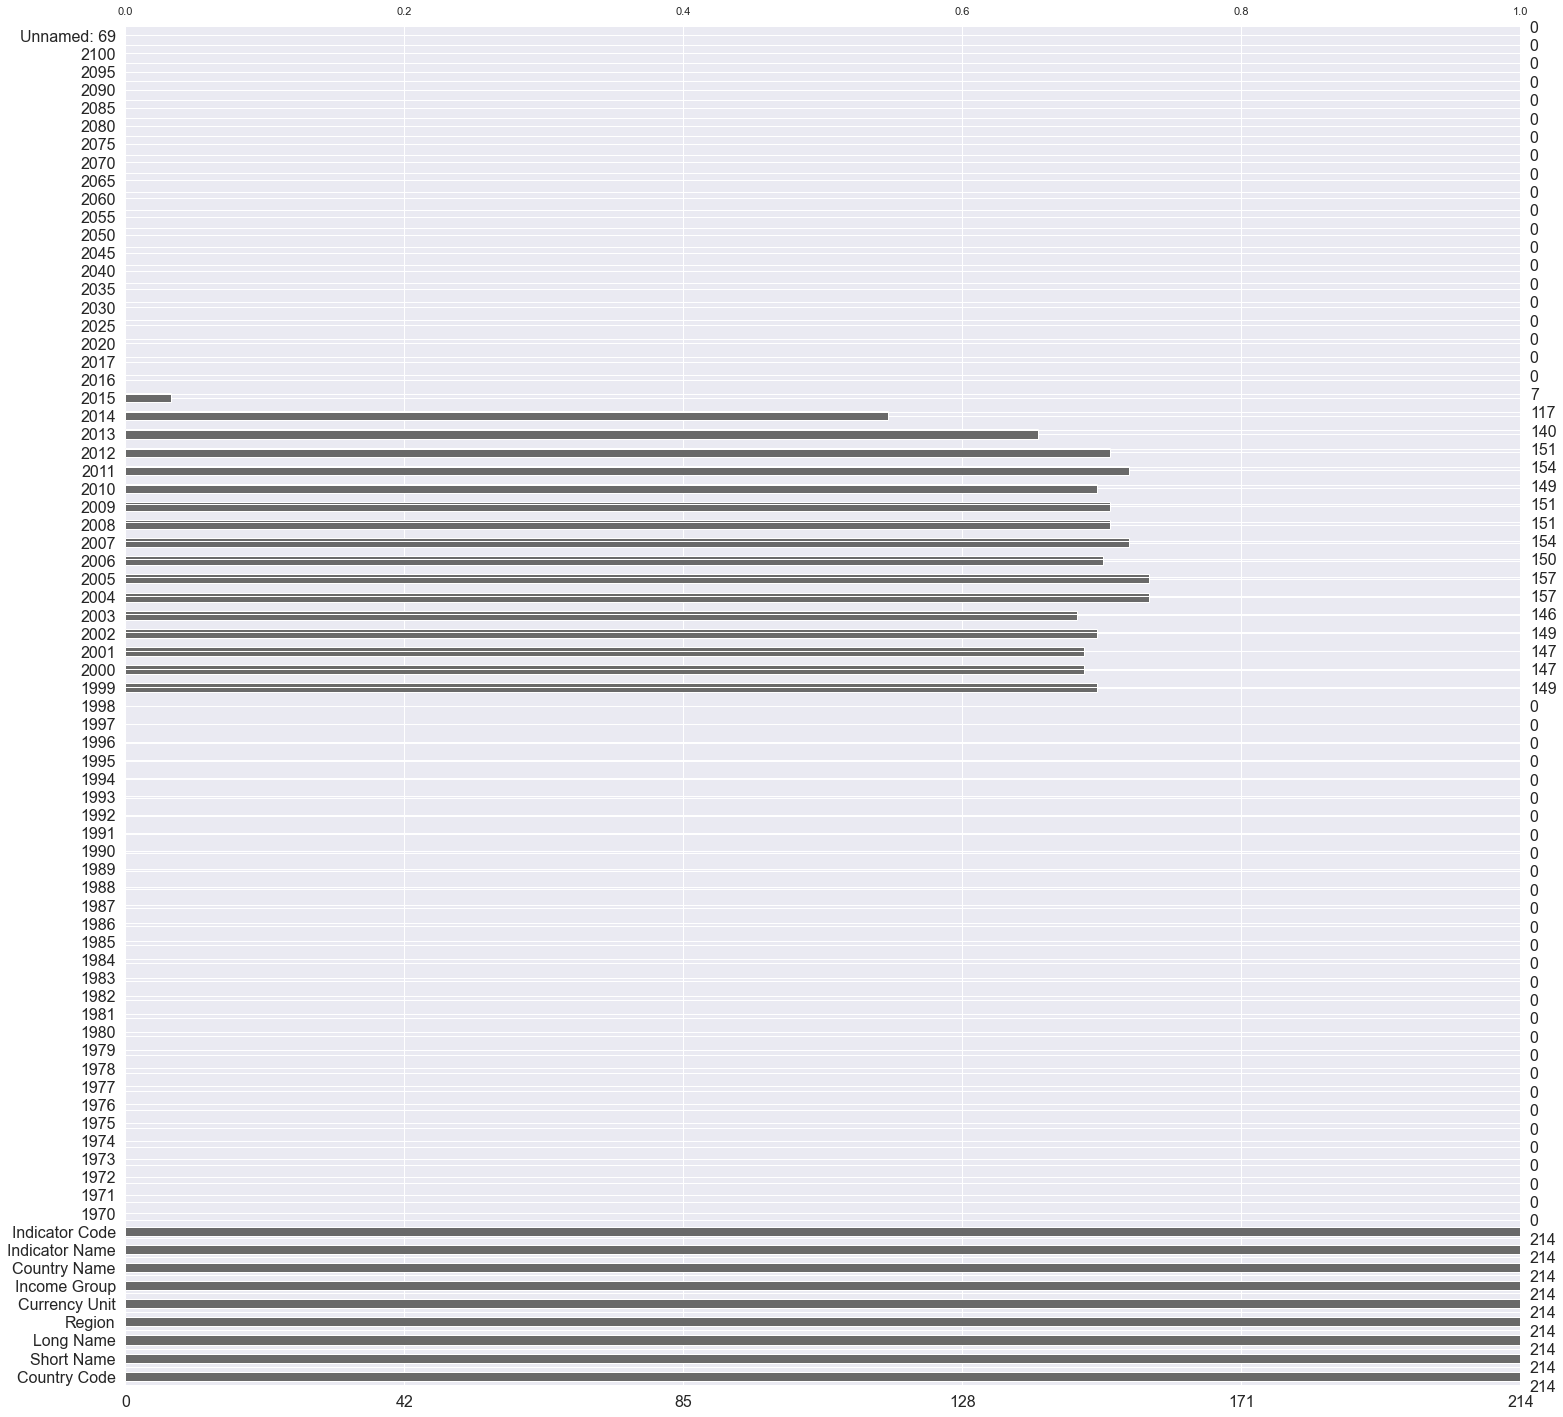

In [234]:
# Check missing data
msno.bar(df_enrolment_upper_secondary_education)

### Select columns from 2010 to 2014

<AxesSubplot:>

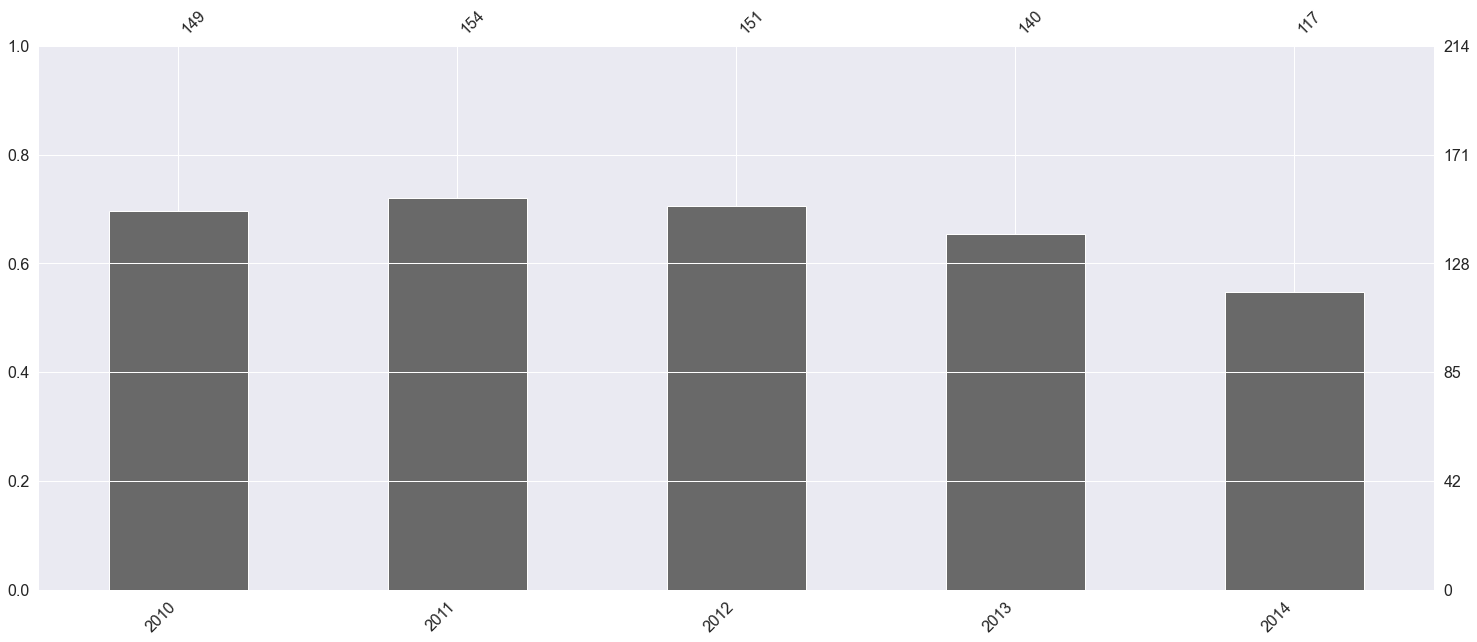

In [235]:
# Let's start by selecting the relevant time columns for the study of our variable. 
# 'select_columns' function is defined in utils.py. 
# We will select years from 2010 to 2014 as it is the most recent avialable data.
df_enrolment_upper_secondary_education_subset = select_columns(df_enrolment_upper_secondary_education,'2010','2014')

#Change index to "REFERENCE_VARIABLE"
df_enrolment_upper_secondary_education_subset = df_enrolment_upper_secondary_education_subset.set_index(REFERENCE_VARIABLE)

# Check missing data
msno.bar(df_enrolment_upper_secondary_education_subset)

###  Clean 1 - Ignore rows with full NaN values from 2010 to 2014

<AxesSubplot:>

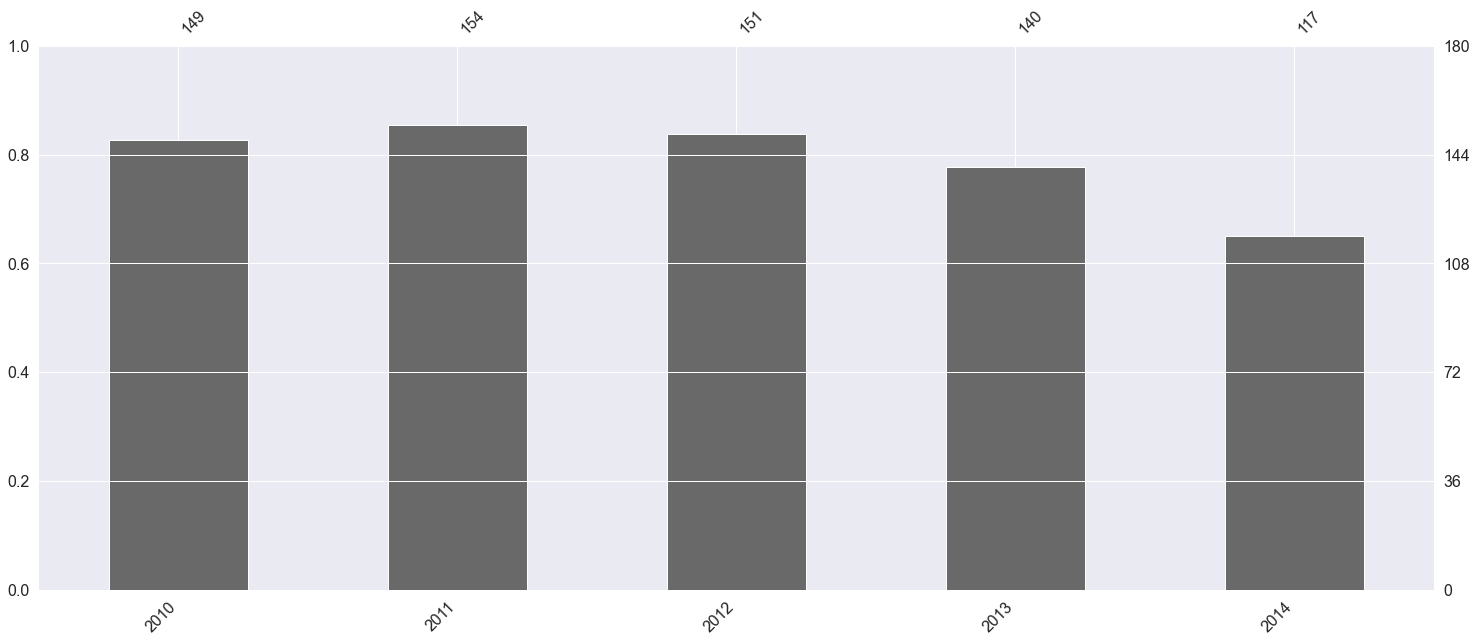

In [236]:
# First let's dismiss rows/countries for which no data is available from 2010 to 2014
df_enrolment_upper_secondary_education_subset_cleaned1 = df_enrolment_upper_secondary_education_subset.dropna(subset=['2010','2011','2012','2013','2014'], how='all')

# Check missing data
msno.bar(df_enrolment_upper_secondary_education_subset_cleaned1)


### Clean 2 - Imputation by row mean for remaining NaN values

<AxesSubplot:>

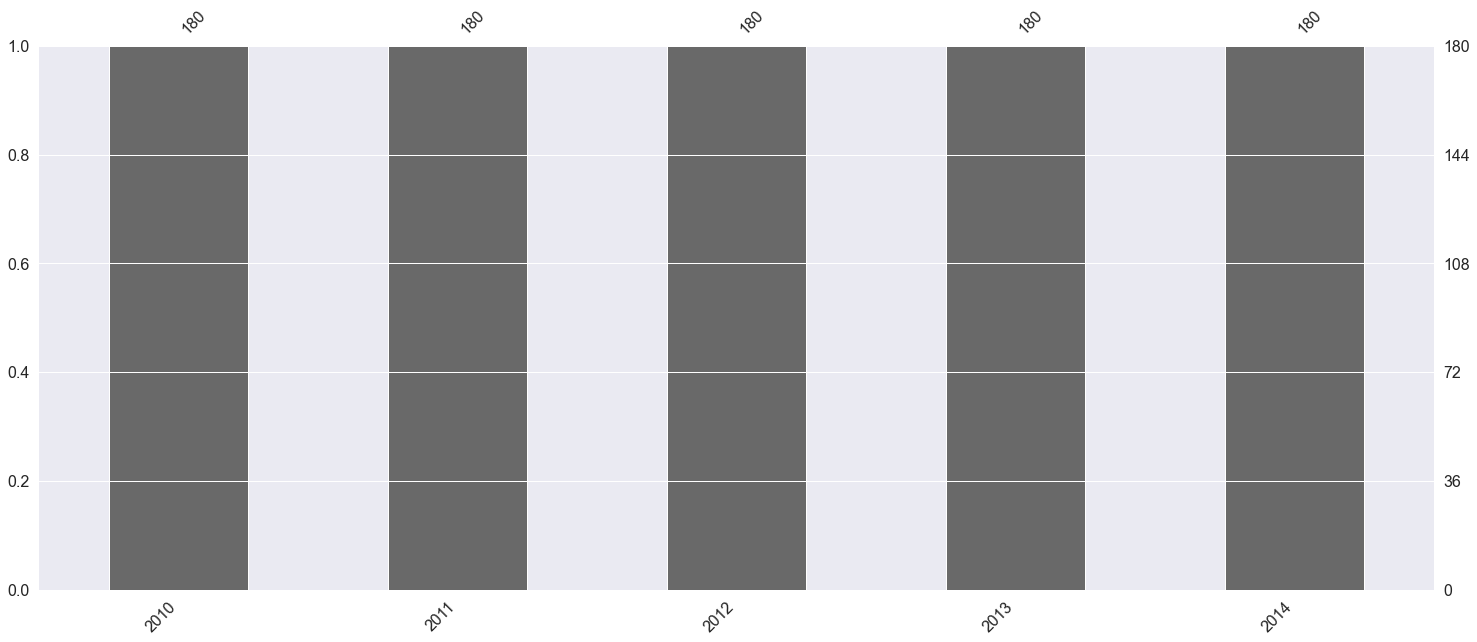

In [237]:
# Second let's impute by the mean for any NaN value on each row as this variable is relatively stable through time
df_enrolment_upper_secondary_education_subset_cleaned2 = df_enrolment_upper_secondary_education_subset_cleaned1.transpose().fillna(df_enrolment_upper_secondary_education_subset_cleaned1.mean(axis=1)).transpose()

# Check missing data
msno.bar(df_enrolment_upper_secondary_education_subset_cleaned2)

### Add mean column for values from 2010 to 2014. Sort countries by "mean". Set index to "Country Name"

In [238]:
#  Fill mean column with computed means along rows
df_enrolment_upper_secondary_education_subset_cleaned2["mean"] = df_enrolment_upper_secondary_education_subset_cleaned2.iloc[:,1:5].mean(axis=1)

# Sort
df_enrolment_upper_secondary_education_subset_cleaned2 = df_enrolment_upper_secondary_education_subset_cleaned2.sort_values("mean", ascending=False)

# Show
df_enrolment_upper_secondary_education_subset_cleaned2

2010  \
Country Name             Country Code Region                                  
India                    IND          South Asia                 48265864.0   
China                    CHN          East Asia & Pacific        44693168.0   
United States            USA          North America              11701279.0   
Brazil                   BRA          Latin America & Caribbean   9284000.0   
Indonesia                IDN          East Asia & Pacific         8179071.0   
...                                                                     ...   
Monaco                   MCO          Europe & Central Asia          1348.0   
Andorra                  AND          Europe & Central Asia          1221.0   
Palau                    PLW          East Asia & Pacific            1133.5   
Turks and Caicos Islands TCA          Latin America & Caribbean       692.0   
Tuvalu                   TUV          East Asia & Pacific             353.0   

                                                                       2011  \
Country Name             Country Code Region                                  
India                    IND          South Asia                 51671416.0   
China                    CHN          East Asia & Pacific        44543976.0   
United States            USA          North America              11809382.0   
Brazil                   BRA          Latin America & Caribbean   9395813.0   
Indonesia                IDN          East Asia & Pacific         8844295.0   
...                                                                     ...   
Monaco                   MCO          Europe & Central Asia          1342.0   
Andorra                  AND          Europe & Central Asia          1259.0   
Palau                    PLW          East Asia & Pacific            1133.5   
Turks and Caicos Islands TCA          Latin America & Caribbean       692.0   
Tuvalu                   TUV          East Asia & Pacific             353.0   

                                                                       2012  \
Country Name             Country Code Region                                  
India                    IND          South Asia                 56141888.0   
China                    CHN          East Asia & Pacific        44224132.0   
United States            USA          North America              11748263.0   
Brazil                   BRA          Latin America & Caribbean   9442334.0   
Indonesia                IDN          East Asia & Pacific         9275438.0   
...                                                                     ...   
Monaco                   MCO          Europe & Central Asia          1279.0   
Andorra                  AND          Europe & Central Asia          1182.0   
Palau                    PLW          East Asia & Pacific            1133.5   
Turks and Caicos Islands TCA          Latin America & Caribbean       692.0   
Tuvalu                   TUV          East Asia & Pacific             353.0   

                                                                       2013  \
Country Name             Country Code Region                                  
India                    IND          South Asia                 55228676.0   
China                    CHN          East Asia & Pacific        45963232.0   
United States            USA          North America              11646415.0   
Brazil                   BRA          Latin America & Caribbean   9949583.0   
Indonesia                IDN          East Asia & Pacific         9782789.0   
...                                                                     ...   
Monaco                   MCO          Europe & Central Asia          1331.0   
Andorra                  AND          Europe & Central Asia          1160.0   
Palau                    PLW          East Asia & Pacific            1150.0   
Turks and Caicos Islands TCA          Latin America & Caribbean       692.0   
Tuvalu                   TUV          E

## Variable "Enrolment in post-secondary non-tertiary education, both sexes (number)"

### Initial Analysis

In [239]:
# Let's create a sub dataframe stemming from Data for 'Enrolment in post-secondary non-tertiary education, both sexes (number)' variable called df_enrolment_post_secondary_non_tertiary_education.
# 'create_dataframe_from_given_dataframe_and_variable' function is defined in utils.py. 
# This function extracts rows for which Indicator Name equals 'Enrolment in post-secondary non-tertiary education, both sexes (number)' and it factors code which is repeated for each sub dataframe creation stemming from Data.
df_enrolment_post_secondary_non_tertiary_education = create_dataframe_from_given_dataframe_and_variable(df_edstats_data_with_country_cleaned_sorted_by_country_code, "Enrolment in post-secondary non-tertiary education, both sexes (number)")

# Show
df_enrolment_post_secondary_non_tertiary_education.head(5)

214 rows in dataframe
75 columns in dataframe
Index(['Country Code', 'Short Name', 'Long Name', 'Region', 'Currency Unit',
       'Income Group', 'Country Name', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')


Country Code   Short Name                     Long Name  \
1171           ABW        Aruba                         Aruba   
4836           AFG  Afghanistan  Islamic State of Afghanistan   
8501           AGO       Angola   People's Republic of Angola   
12166          ALB      Albania           Republic of Albania   
15831          AND      Andorra       Principality of Andorra   

                          Region   Currency Unit          Income Group  \
1171   Latin America & Caribbean   Aruban florin  High income: nonOECD   
4836                  South Asia  Afghan afghani            Low income   
8501          Sub-Saharan Africa  Angolan kwanza   Upper middle income   
12166      Europe & Central Asia    Albanian lek   Upper middle income   
15831      Europe & Central Asia            Euro  High income: nonOECD   

      Country Name                                     Indicator Name  \
1171         Aruba  Enrolment in post-secondary non-tertiary educa...   
4836   Afghanistan  Enrolment in post-secondary non-tertiary educa...   
8501        Angola  Enrolment in post-secondary non-tertiary educa...   
12166      Albania  Enrolment in post-secondary non-tertiary educa...   
15831      Andorra  Enrolment in post-secondary non-tertiary educa...   

      Indicator Code  1970  1971  1972  1973  1974  1975  1976  1977  1978  \
1171         UIS.E.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4836         UIS.E.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8501         UIS.E.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
12166        UIS.E.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
15831        UIS.E.4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1979  1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  1990  \
1171    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4836    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8501    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
12166   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
15831   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1991  1992  1993  1994  1995  1996  1997  1998  1999   2000  2001  \
1171    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  24.0  124.0   NaN   
4836    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   
8501    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   
12166   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   
15831   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN    NaN   NaN   

       2002     2003  2004  2005   2006   2007     2008     2009     2010  \
1171    NaN      NaN   NaN   NaN    NaN    NaN      NaN      NaN      NaN   
4836    NaN  10516.0   NaN   NaN    NaN    NaN  34380.0  31386.0  51694.0   
8501    NaN      NaN   NaN   NaN    NaN    NaN      NaN      NaN      NaN   
12166   NaN      NaN   NaN   NaN    NaN    NaN      NaN      NaN      NaN   
15831   NaN      NaN   NaN   NaN  140.0  428.0    712.0    943.0   1027.0   

          2011     2012      2013      2014  2015  2016  2017  2020  2025  \
1171       NaN      NaN       NaN       NaN   NaN   NaN   NaN   NaN   NaN   
4836   76969.0  90700.0  120216.0  145220.0   NaN   NaN   NaN   NaN   NaN   
8501       NaN      NaN       NaN       NaN   NaN   NaN   NaN   NaN   NaN   
12166      NaN      NaN    1826.0    1952.0   NaN   NaN   NaN   NaN   NaN   
15831      NaN      NaN     180.0     182.0   NaN   NaN   NaN   NaN   NaN   

       2030  2035  2040  2045  2050  2055  2060  2065  2070  2075  2080  2085  \
1171    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
4836    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
8501    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
12166   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

In [240]:
# Check stats
df_enrolment_post_secondary_non_tertiary_education.describe()

1970  1971  1972  1973  1974  1975  1976  1977  1978  1979  1980  1981  \
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
min     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
25%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
50%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
75%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
max     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1982  1983  1984  1985  1986  1987  1988  1989  1990  1991  1992  1993  \
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
min     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
25%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
50%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
75%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
max     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

       1994  1995  1996  1997  1998          1999          2000          2001  \
count   0.0   0.0   0.0   0.0   0.0  7.900000e+01  8.500000e+01  8.700000e+01   
mean    NaN   NaN   NaN   NaN   NaN  8.098770e+04  7.406934e+04  7.790551e+04   
std     NaN   NaN   NaN   NaN   NaN  2.336677e+05  2.144725e+05  2.210429e+05   
min     NaN   NaN   NaN   NaN   NaN  1.000000e+01  2.700000e+01  3.000000e+01   
25%     NaN   NaN   NaN   NaN   NaN  8.540000e+02  1.027000e+03  1.201500e+03   
50%     NaN   NaN   NaN   NaN   NaN  8.996000e+03  9.016000e+03  1.215800e+04   
75%     NaN   NaN   NaN   NaN   NaN  3.924350e+04  3.026600e+04  3.647000e+04   
max     NaN   NaN   NaN   NaN   NaN  1.643104e+06  1.553645e+06  1.672523e+06   

                2002           2003           2004           2005  \
count      78.000000      81.000000      78.000000      75.000000   
mean    71828.974359   64469.654321   47148.397436   49342.946667   
std    156171.478124  148329.142851  101379.424754  108280.537072   
min        35.000000       4.000000       3.000000       3.000000   
25%      1063.000000    1309.000000    1463.750000    1601.500000   
50%      9451.000000    8534.000000    8396.000000    9222.000000   
75%     44844.000000   41923.000000   36406.750000   35908.000000   
max    804880.000000  881044.000000  543255.000000  589184.000000   

                2006           2007           2008           2009  \
count      70.000000      75.000000      74.000000      72.000000   
mean    59150.842857   58449.280000   49465.216216   42254.111111   
std    139713.280490  142124.660961  119351.502588   74118.342707   
min        12.000000      17.000000      14.000000      25.000000   
25%      2116.000000    2240.000000    2253.250000    1915.750000   
50%     11117.500000   11198.000000    9749.500000   12227.000000   
75%     41607.750000   39564.000000   35748.000000   50473.500000   
max    850690.000000  924751.000000  883839.000000  471581.000000   

                2010           2011          2012          2013          2014  \
count      70.000000      71.000000  7.400000e+01  8.300000e+01  6.500000e+01   
mean    43324.542857   44217.098592  7.306388e+04  9.958817e+04  8.593332e+04   
std     83094.821162   85200.326556  2.020395e+05  2.240001e+05  2.323904e+05   
min        90.000000     124.000000  8.000000e+01  6.200000e+01  7.900000e+01   
25%      1891.000000    2270.500000  2.210000e+03  2.263000e+03  2.166000e+03   
50%     13251.500000   13828.000000  1.250700e+04  1.351300e+04  1.154400e+04   
75%   

In [241]:
# Check data type
df_enrolment_post_secondary_non_tertiary_education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1171 to 781816
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    214 non-null    object 
 1   Short Name      214 non-null    object 
 2   Long Name       214 non-null    object 
 3   Region          214 non-null    object 
 4   Currency Unit   214 non-null    object 
 5   Income Group    214 non-null    object 
 6   Country Name    214 non-null    object 
 7   Indicator Name  214 non-null    object 
 8   Indicator Code  214 non-null    object 
 9   1970            0 non-null      float64
 10  1971            0 non-null      float64
 11  1972            0 non-null      float64
 12  1973            0 non-null      float64
 13  1974            0 non-null      float64
 14  1975            0 non-null      float64
 15  1976            0 non-null      float64
 16  1977            0 non-null      float64
 17  1978            0 non-null   

<AxesSubplot:>

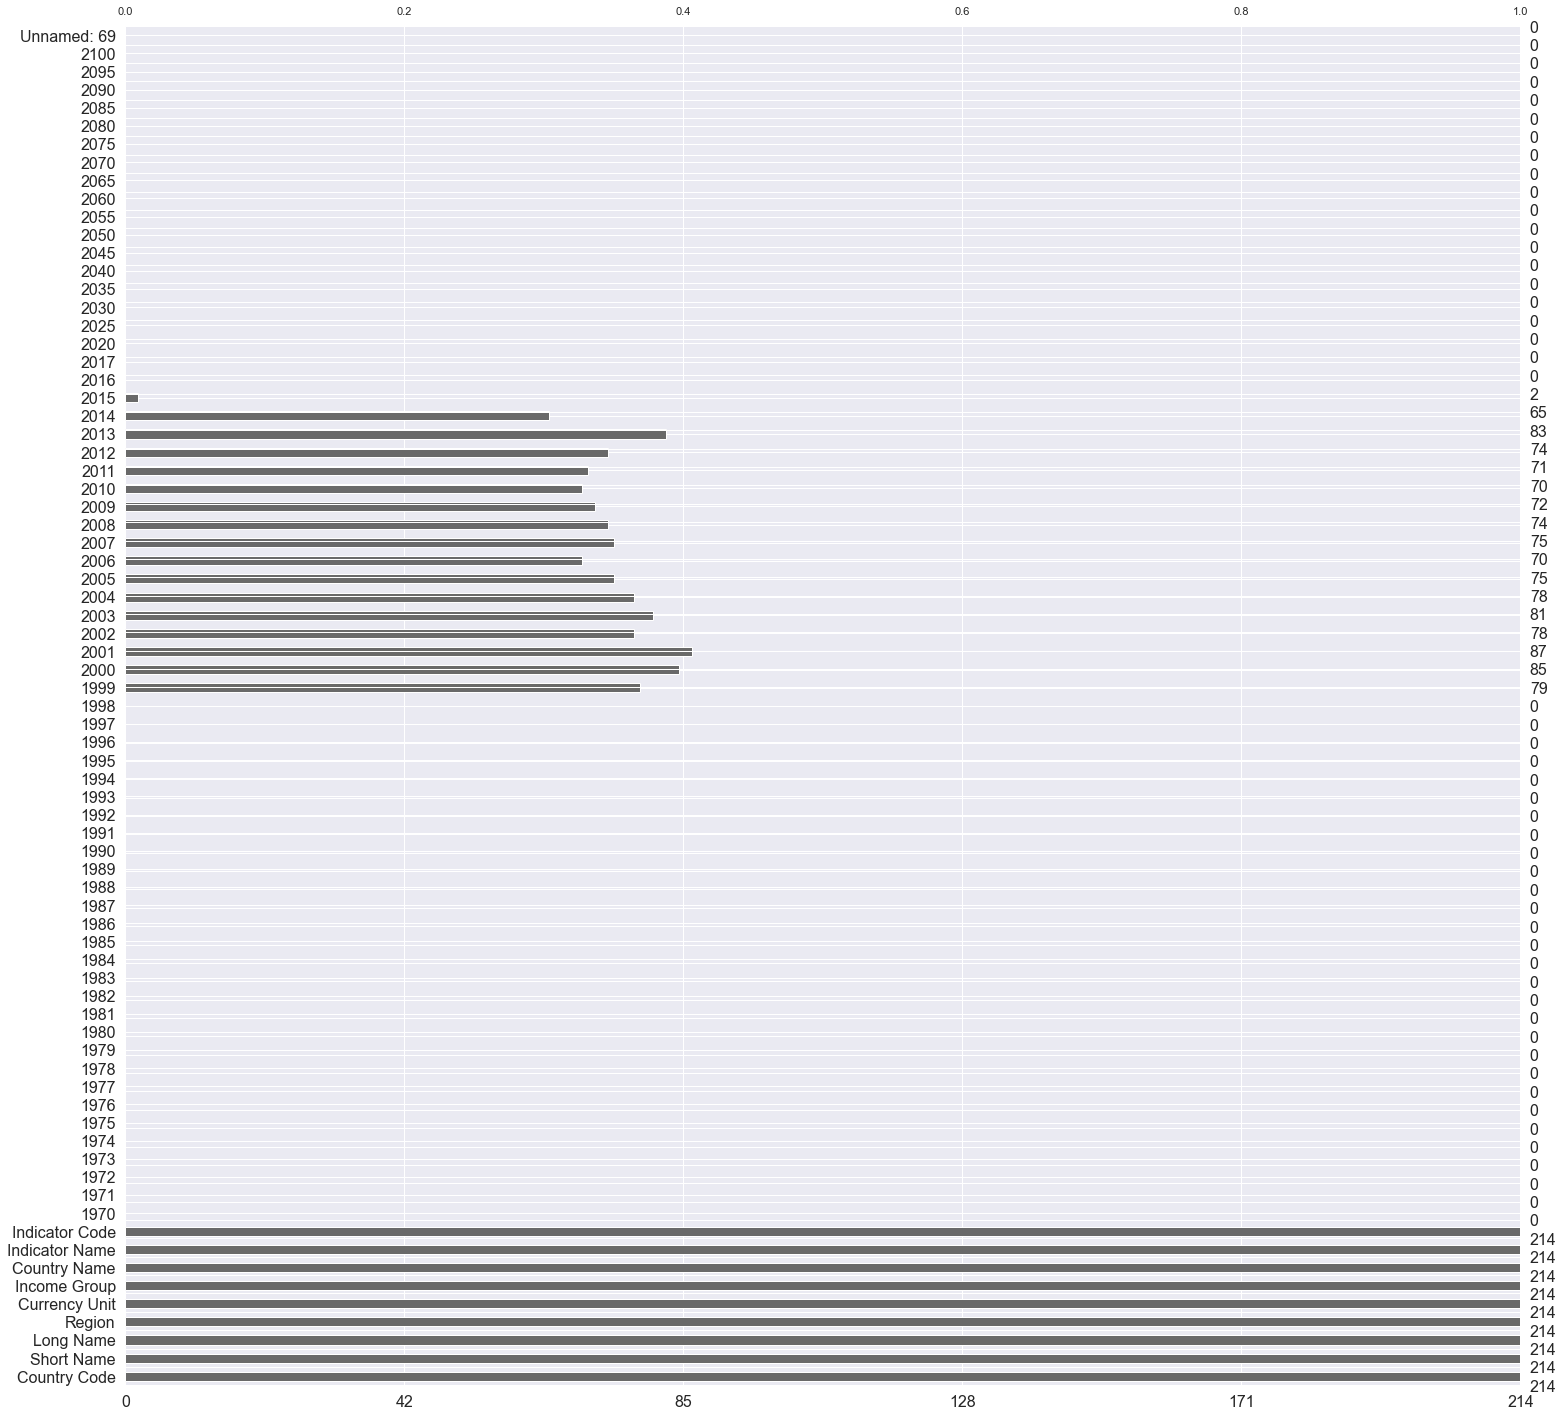

In [242]:
# Check missing data
msno.bar(df_enrolment_post_secondary_non_tertiary_education)

### Select columns from 2010 to 2014

<AxesSubplot:>

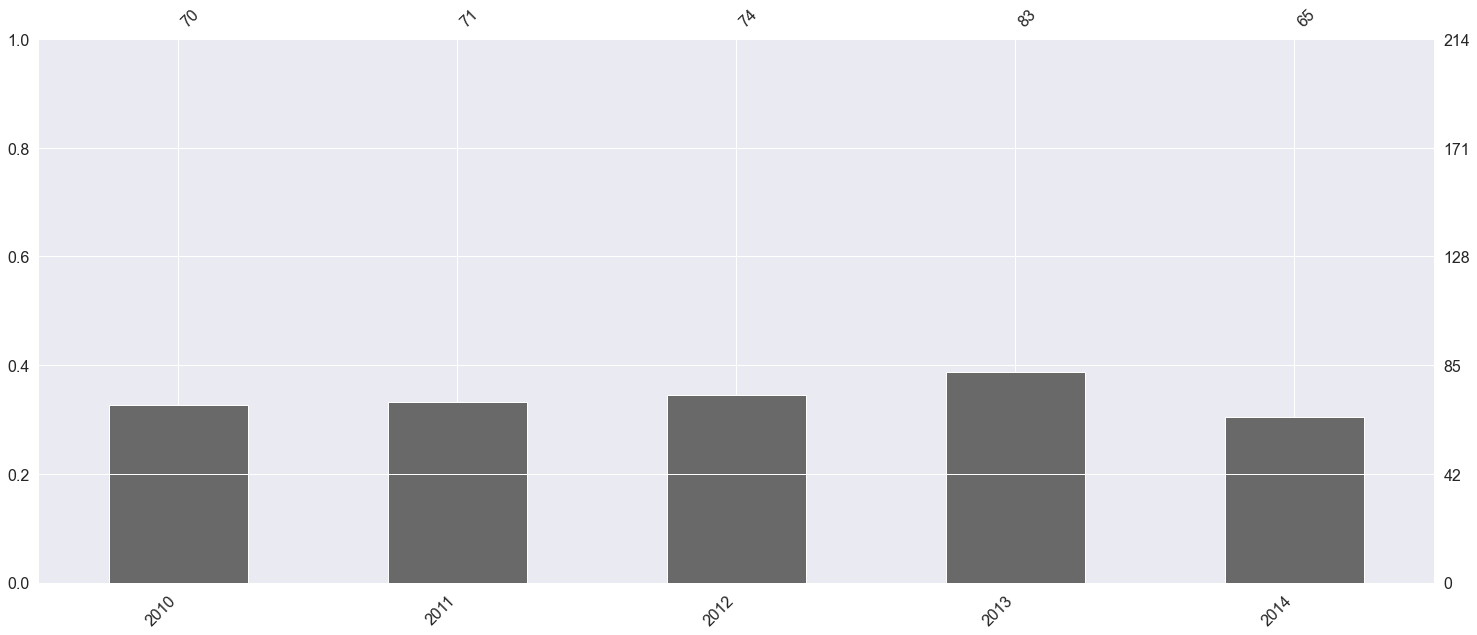

In [243]:
# Let's start by selecting the relevant time columns for the study of our variable. 
# 'select_columns' function is defined in utils.py. 
# We will select years from 2010 to 2014 to match with the previous dataframes.
df_enrolment_post_secondary_non_tertiary_education_subset = select_columns(df_enrolment_post_secondary_non_tertiary_education,'2010','2014')

#Change index to "REFERENCE_VARIABLE"
df_enrolment_post_secondary_non_tertiary_education_subset = df_enrolment_post_secondary_non_tertiary_education_subset.set_index(REFERENCE_VARIABLE)

# Check missing data
msno.bar(df_enrolment_post_secondary_non_tertiary_education_subset)


###  Clean 1 - Ignore rows with full NaN values from 2010 to 2014

<AxesSubplot:>

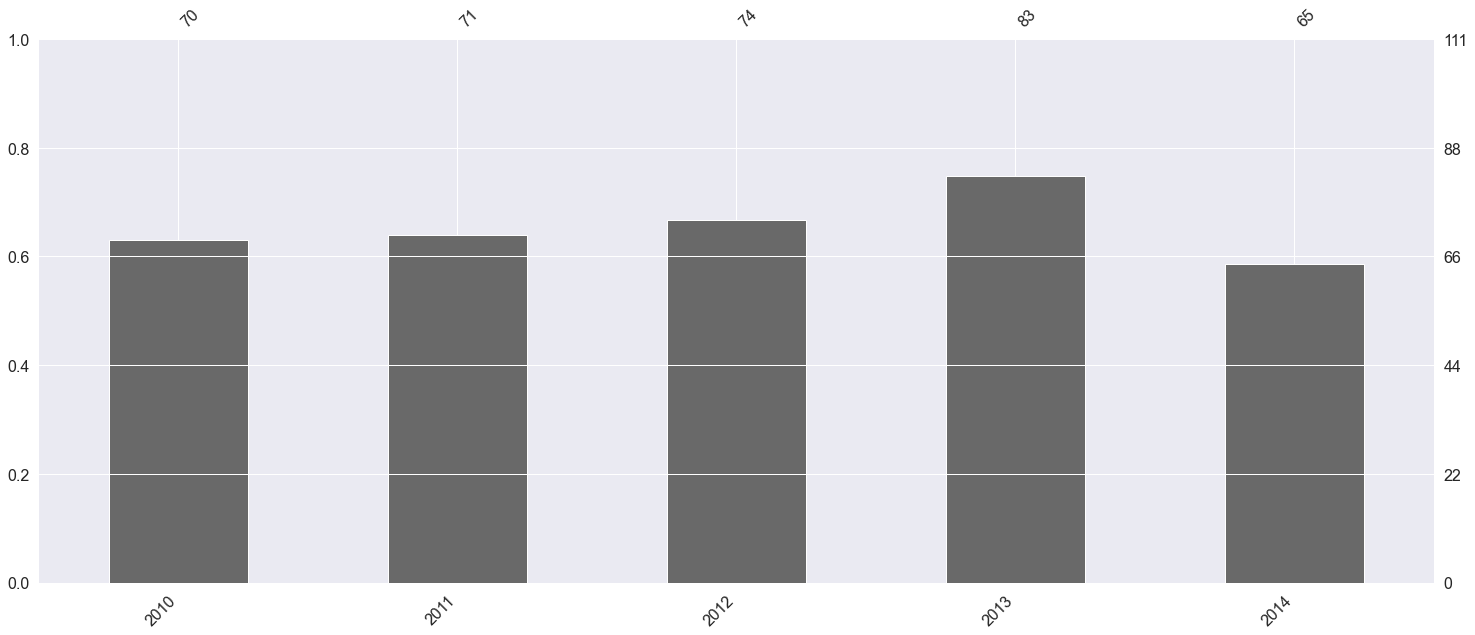

In [244]:
# First let's dismiss rows/countries for which no data is available from 2010 to 2014
df_enrolment_post_secondary_non_tertiary_education_subset_cleaned1 = df_enrolment_post_secondary_non_tertiary_education_subset.dropna(subset=['2010','2011','2012','2013','2014'], how='all')

# Check missing data
msno.bar(df_enrolment_post_secondary_non_tertiary_education_subset_cleaned1)

### Clean 2 - Imputation by row mean for remaining NaN values

<AxesSubplot:>

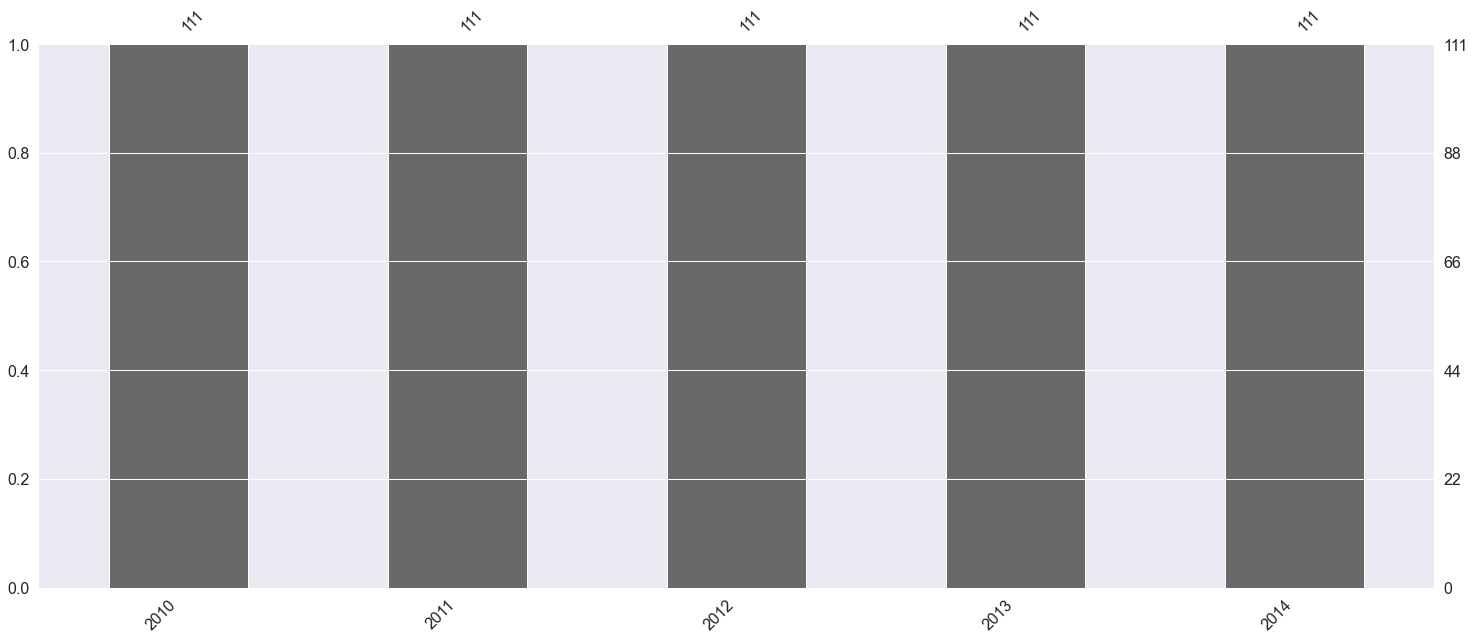

In [245]:
# Second let's impute by the mean for any NaN value on each row as this variable is relatively stable through time
df_enrolment_post_secondary_non_tertiary_education_subset_cleaned2 = df_enrolment_post_secondary_non_tertiary_education_subset_cleaned1.T.fillna(df_enrolment_post_secondary_non_tertiary_education_subset_cleaned1.mean(axis=1)).T

# Check missing data
msno.bar(df_enrolment_post_secondary_non_tertiary_education_subset_cleaned2)

### Add mean column, sort values and set index to "Country Name"

In [246]:
#  Fill mean column with computed means along rows
df_enrolment_post_secondary_non_tertiary_education_subset_cleaned2["mean"] = df_enrolment_post_secondary_non_tertiary_education_subset_cleaned2.iloc[:,1:5].mean(axis=1)

# Sort
df_enrolment_post_secondary_non_tertiary_education_subset_cleaned2 = df_enrolment_post_secondary_non_tertiary_education_subset_cleaned2.sort_values("mean", ascending=False)

# Show
df_enrolment_post_secondary_non_tertiary_education_subset_cleaned2

2010  \
Country Name       Country Code Region                                     
Iran, Islamic Rep. IRN          Middle East & North Africa  1.564102e+06   
Philippines        PHL          East Asia & Pacific         8.965800e+05   
United States      USA          North America               5.391150e+05   
Germany            DEU          Europe & Central Asia       7.989180e+05   
Brazil             BRA          Latin America & Caribbean   7.927960e+05   
...                                                                  ...   
Qatar              QAT          Middle East & North Africa  2.195000e+02   
Cayman Islands     CYM          Latin America & Caribbean   2.140000e+02   
Cabo Verde         CPV          Sub-Saharan Africa          8.470000e+02   
Monaco             MCO          Europe & Central Asia       9.000000e+01   
Brunei Darussalam  BRN          East Asia & Pacific         8.000000e+01   

                                                                    2011  \
Country Name       Country Code Region                                     
Iran, Islamic Rep. IRN          Middle East & North Africa  1.564102e+06   
Philippines        PHL          East Asia & Pacific         8.965800e+05   
United States      USA          North America               5.719980e+05   
Germany            DEU          Europe & Central Asia       7.989180e+05   
Brazil             BRA          Latin America & Caribbean   7.927960e+05   
...                                                                  ...   
Qatar              QAT          Middle East & North Africa  2.195000e+02   
Cayman Islands     CYM          Latin America & Caribbean   1.990000e+02   
Cabo Verde         CPV          Sub-Saharan Africa          5.490000e+02   
Monaco             MCO          Europe & Central Asia       1.240000e+02   
Brunei Darussalam  BRN          East Asia & Pacific         8.000000e+01   

                                                                    2012  \
Country Name       Country Code Region                                     
Iran, Islamic Rep. IRN          Middle East & North Africa  1.564102e+06   
Philippines        PHL          East Asia & Pacific         8.965800e+05   
United States      USA          North America               5.631460e+05   
Germany            DEU          Europe & Central Asia       7.989180e+05   
Brazil             BRA          Latin America & Caribbean   7.927960e+05   
...                                                                  ...   
Qatar              QAT          Middle East & North Africa  2.195000e+02   
Cayman Islands     CYM          Latin America & Caribbean   2.290000e+02   
Cabo Verde         CPV          Sub-Saharan Africa          1.360000e+02   
Monaco             MCO          Europe & Central Asia       1.470000e+02   
Brunei Darussalam  BRN          East Asia & Pacific         8.000000e+01   

                                                                    2013  \
Country Name       Country Code Region                                     
Iran, Islamic Rep. IRN          Middle East & North Africa  1.564102e+06   
Philippines        PHL          East Asia & Pacific         8.965800e+05   
United States      USA          North America               1.174432e+06   
Germany            DEU          Europe & Central Asia       8.286666e+05   
Brazil             BRA          Latin America & Caribbean   7.927960e+05   
...                                                                  ...   
Qatar              QAT          Middle East & North Africa  2.260000e+02   
Cayman Islands     CYM          Latin America & Caribbean   2.140000e+02   
Cabo Verde         CPV          Sub-Saharan Africa          6.200000e+01   
Monaco             MCO          Europe & Central Asia       1.530000e+02   
Brunei Darussalam  BRN          East Asia & Pacific         8.000000e+01   

                                                                 2014  \
Country Name       Country Code Region 

## Variable "Total Enrolment" : ADD df_enrolment_upper_secondary_education, df_enrolment_tertiary_education, df_enrolment_post_secondary_non_tertiary_education 

In [247]:
#df_enrolment_upper_secondary_education_subset_cleaned3
#df_enrolment_tertiary_education_subset_cleaned3
#df_enrolment_post_secondary_non_tertiary_education_subset_cleaned3

# We will sum all 3 previous datafrmaes up in order to get the total enrolment in education for the considered courses level in our study (High school and university).
df_enrolment_total = (df_enrolment_upper_secondary_education_subset_cleaned2.add(df_enrolment_tertiary_education_subset_cleaned2, fill_value = 0)).add(df_enrolment_post_secondary_non_tertiary_education_subset_cleaned2, fill_value = 0)

# Sort
df_enrolment_total = df_enrolment_total.sort_values("mean", ascending = False)

# Rename last column
df_enrolment_total = df_enrolment_total.rename(columns={'mean' : 'Total enrolment in education (mean 2010-2014)'})

# Show
df_enrolment_total.head(5)


2010        2011  \
Country Name  Country Code Region                                              
India         IND          South Asia                 69453485.0  78769249.0   
China         CHN          East Asia & Pacific        75945451.0  76035220.0   
United States USA          North America              32668102.0  33397506.0   
Brazil        BRA          Latin America & Caribbean  16629503.0  17117933.0   
Indonesia     IDN          East Asia & Pacific        13180119.0  14208596.0   

                                                            2012  \
Country Name  Country Code Region                                  
India         IND          South Asia                 85128089.0   
China         CHN          East Asia & Pacific        76955144.0   
United States USA          North America              33305521.0   
Brazil        BRA          Latin America & Caribbean  17476535.0   
Indonesia     IDN          East Asia & Pacific        15509422.0   

                                                              2013  \
Country Name  Country Code Region                                    
India         IND          South Asia                 8.387978e+07   
China         CHN          East Asia & Pacific        8.071246e+07   
United States USA          North America              3.279347e+07   
Brazil        BRA          Latin America & Caribbean  1.828349e+07   
Indonesia     IDN          East Asia & Pacific        1.620624e+07   

                                                            2014  \
Country Name  Country Code Region                                  
India         IND          South Asia                 83579690.0   
China         CHN          East Asia & Pacific        86885938.0   
United States USA          North America              32584101.0   
Brazil        BRA          Latin America & Caribbean  18382874.5   
Indonesia     IDN          East Asia & Pacific        16365957.0   

                                                      Total enrolment in education (mean 2010-2014)  
Country Name  Country Code Region                                                                    
India         IND          South Asia                                                  8.283920e+07  
China         CHN          East Asia & Pacific                                         8.014719e+07  
United States USA          North America                                               3.302015e+07  
Brazil        BRA          Latin America & Caribbean                                   1.781521e+07  
Indonesia     IDN          East Asia & Pacific                                         1.557255e+07

<AxesSubplot:>

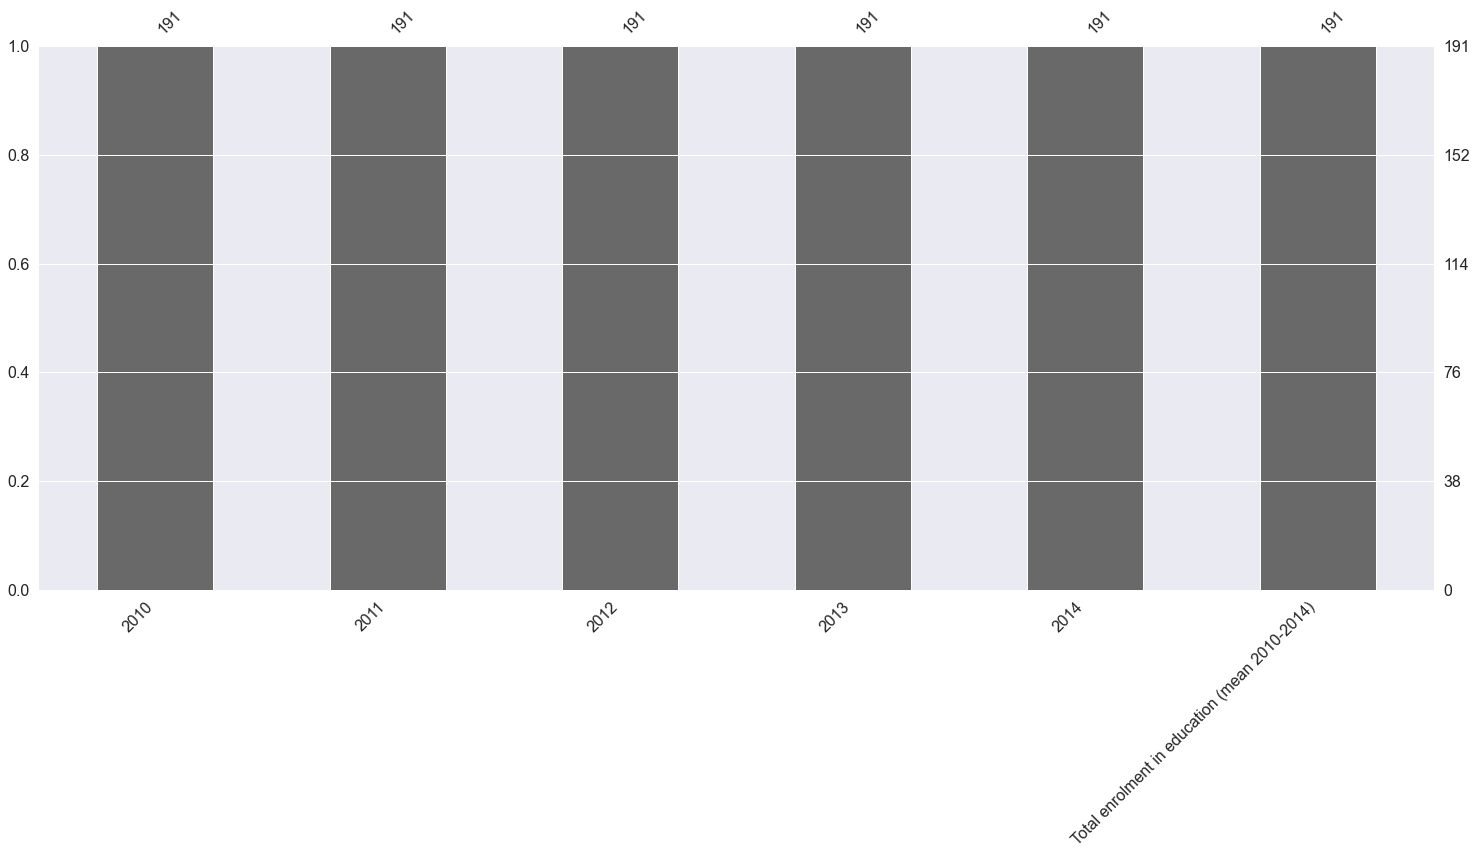

In [248]:
#Check missing data
msno.bar(df_enrolment_total)

### Plot Global

#### Plot 1 - Folium

In [249]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [20, 15], zoom_start = 1.5)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
map.choropleth(geo_data = country_geo, data = df_enrolment_total.reset_index(REFERENCE_VARIABLE),
                 columns = [REFERENCE_VARIABLE[1], 'Total enrolment in education (mean 2010-2014)'],
                 key_on = 'feature.id',
                 fill_color = 'YlGnBu', fill_opacity = 0.7, line_opacity = 0.2,
                 legend_name = 'Total enrolment in education (mean 2010-2014)')

map

/Users/romain/opt/anaconda3/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


#### Plot 2 - (Pie Plot) Enrolment by Education Level from High School Onwards

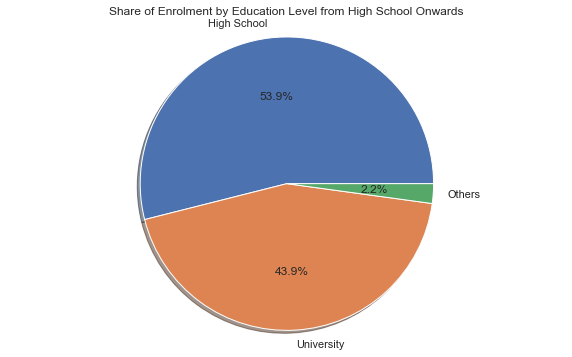

In [250]:
# Parameters
labels = ['High School', 'University', 'Others']
sizes = [df_enrolment_upper_secondary_education_subset_cleaned2['mean'].sum(),
         df_enrolment_tertiary_education_subset_cleaned2['mean'].sum(),
         df_enrolment_post_secondary_non_tertiary_education_subset_cleaned2['mean'].sum(),
        ]
# Plot
fig1, ax1 = plt.subplots(figsize = (10,6))
ax1.pie(sizes, labels = labels, autopct = '%1.1f%%', shadow = True)
ax1.axis('equal')
plt.title('Share of Enrolment by Education Level from High School Onwards')
plt.show()


#### Plot 3 - (Pie Plot) Country share of enrolment by education level from high school onwards

In [251]:
#
df_enrolment_upper_secondary_education_subset_cleaned2.reset_index(["Country Code","Region"],inplace=True)
df_enrolment_upper_secondary_education_subset_cleaned2.drop(columns={"Country Code","Region"},inplace=True)

df_enrolment_tertiary_education_subset_cleaned2.reset_index(["Country Code","Region"],inplace=True)
df_enrolment_tertiary_education_subset_cleaned2.drop(columns={"Country Code","Region"},inplace=True)

df_enrolment_post_secondary_non_tertiary_education_subset_cleaned2.reset_index(["Country Code","Region"],inplace=True)
df_enrolment_post_secondary_non_tertiary_education_subset_cleaned2.drop(columns={"Country Code","Region"},inplace=True)

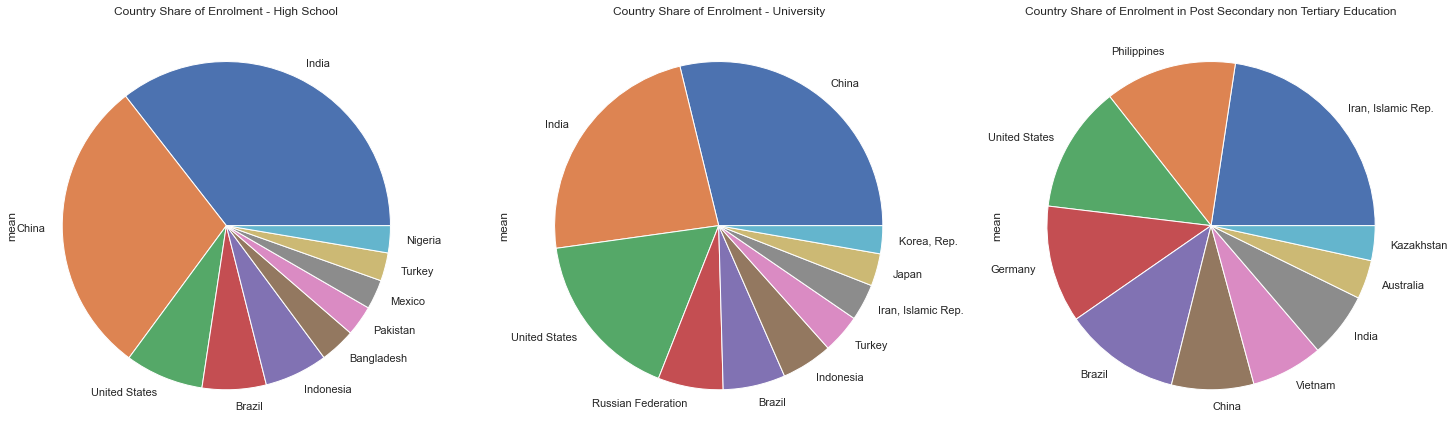

In [252]:
# Sublot
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(25, 15))

# Plot
df_enrolment_upper_secondary_education_subset_cleaned2['mean'].head(10).plot(kind="pie",
                                                                            title="Country Share of Enrolment - High School",
                                                                            ax=axes[0])

df_enrolment_tertiary_education_subset_cleaned2['mean'].head(10).plot(kind="pie",
                                                                      title="Country Share of Enrolment - University",
                                                                      ax=axes[1])

df_enrolment_post_secondary_non_tertiary_education_subset_cleaned2['mean'].head(10).plot(kind="pie",
                                                                                         title="Country Share of Enrolment in Post Secondary non Tertiary Education",
                                                                                          ax=axes[2])
plt.show()

## Variable "Government expenditure on education as % of GDP (%)"

### Initial Analysis

In [253]:
# Let's create a sub dataframe stemming from Data for 'Government expenditure on education as % of GDP (%)' variable called df_enrolment_tertiary_education.
# 'create_dataframe_from_given_dataframe_and_variable' function is defined in utils.py. 
# This function extracts rows for which Indicator Name equals 'Government expenditure on education as % of GDP (%)' and it factors code which is repeated for each sub dataframe creation stemming from Data.
df_government_expenditure_on_education_as_percent_of_gdp = create_dataframe_from_given_dataframe_and_variable(df_edstats_data_with_country_cleaned_sorted_by_country_code, "Government expenditure on education as % of GDP (%)")

# Show
df_government_expenditure_on_education_as_percent_of_gdp.head(5)


214 rows in dataframe
75 columns in dataframe
Index(['Country Code', 'Short Name', 'Long Name', 'Region', 'Currency Unit',
       'Income Group', 'Country Name', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')


Country Code   Short Name                     Long Name  \
1260           ABW        Aruba                         Aruba   
4925           AFG  Afghanistan  Islamic State of Afghanistan   
8590           AGO       Angola   People's Republic of Angola   
12255          ALB      Albania           Republic of Albania   
15920          AND      Andorra       Principality of Andorra   

                          Region   Currency Unit          Income Group  \
1260   Latin America & Caribbean   Aruban florin  High income: nonOECD   
4925                  South Asia  Afghan afghani            Low income   
8590          Sub-Saharan Africa  Angolan kwanza   Upper middle income   
12255      Europe & Central Asia    Albanian lek   Upper middle income   
15920      Europe & Central Asia            Euro  High income: nonOECD   

      Country Name                                     Indicator Name  \
1260         Aruba  Government expenditure on education as % of GD...   
4925   Afghanistan  Government expenditure on education as % of GD...   
8590        Angola  Government expenditure on education as % of GD...   
12255      Albania  Government expenditure on education as % of GD...   
15920      Andorra  Government expenditure on education as % of GD...   

          Indicator Code  1970     1971     1972     1973  1974     1975  \
1260   SE.XPD.TOTL.GD.ZS   NaN      NaN      NaN      NaN   NaN      NaN   
4925   SE.XPD.TOTL.GD.ZS   NaN  1.16036  1.11718  1.42788   NaN  1.30332   
8590   SE.XPD.TOTL.GD.ZS   NaN      NaN      NaN      NaN   NaN      NaN   
12255  SE.XPD.TOTL.GD.ZS   NaN      NaN      NaN      NaN   NaN      NaN   
15920  SE.XPD.TOTL.GD.ZS   NaN      NaN      NaN      NaN   NaN      NaN   

       1976  1977  1978     1979     1980     1981     1982  1983  1984  \
1260    NaN   NaN   NaN      NaN      NaN      NaN      NaN   NaN   NaN   
4925    NaN   NaN   NaN  1.73398  1.83639  1.90443  1.73199   NaN   NaN   
8590    NaN   NaN   NaN      NaN      NaN      NaN      NaN   NaN   NaN   
12255   NaN   NaN   NaN      NaN      NaN      NaN      NaN   NaN   NaN   
15920   NaN   NaN   NaN      NaN      NaN      NaN      NaN   NaN   NaN   

        1985    1986    1987  1988  1989  1990  1991  1992  1993    1994  \
1260     NaN     NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN   
4925     NaN     NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN   
8590   4.622  6.0545  6.1175   NaN   NaN   NaN   NaN   NaN   NaN     NaN   
12255    NaN     NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN  3.2633   
15920    NaN     NaN     NaN   NaN   NaN   NaN   NaN   NaN   NaN     NaN   

          1995     1996     1997     1998     1999     2000     2001     2002  \
1260       NaN      NaN      NaN  4.76316  4.39554  4.71468  4.73949  4.92427   
4925       NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
8590       NaN      NaN      NaN  2.59149      NaN  2.60753      NaN      NaN   
12255  3.76044  2.97977  3.23613  3.32812  3.37669  3.28719  3.34271  3.05522   
15920      NaN      NaN  3.71328      NaN      NaN      NaN      NaN  1.69684   

         2003     2004     2005     2006     2007     2008     2009     2010  \
1260      NaN  4.40890  4.68076      NaN  4.79918  4.91559  5.92467  6.71249   
4925      NaN      NaN      NaN      NaN      NaN      NaN      NaN  3.46149   
8590      NaN      NaN  2.77713  2.85845      NaN      NaN      NaN  3.47623   
12255  3.0647  3.17017  3.23791  3.15794  3.26756      NaN      NaN      NaN   
15920     NaN  1.53254  1.60025  2.19399  2.07405  2.93457  3.16387  3.06580   

          2011     2012     2013     2014     2015  2016  2017  2020  2025  \
1260   6.03687  6.54906  6.80806  6.16293      NaN   NaN   NaN   NaN   NaN   
4925   3.43914  2.52754  3.48140  3.78028  3.31754   NaN   NaN   NaN   NaN   
8590       NaN      NaN      NaN      NaN      NaN   NaN   NaN   NaN   NaN   
12255      NaN      NaN  3.53944      NaN      NaN   NaN   NaN   NaN   NaN   
15920  3

In [254]:
# Check stats
df_government_expenditure_on_education_as_percent_of_gdp.describe()

1970       1971       1972       1973       1974       1975  \
count  28.000000  48.000000  45.000000  48.000000  46.000000  54.000000   
mean    3.697463   3.750444   3.926796   3.917349   3.980870   4.071763   
std     1.542681   1.586317   1.648166   1.737680   1.498455   1.717278   
min     1.458090   1.052160   1.117180   1.112620   1.336090   0.904510   
25%     2.199600   2.770285   2.789730   2.673017   3.099095   2.563457   
50%     3.687860   3.475595   3.906390   3.438735   3.880900   4.044510   
75%     4.627980   4.573593   4.726360   5.124648   4.730450   5.224770   
max     6.301580   7.710190   7.634060   8.793290   7.286900   7.761910   

            1976       1977       1978       1979       1980       1981  \
count  48.000000  48.000000  48.000000  55.000000  64.000000  56.000000   
mean    4.174724   4.378305   4.334219   4.256104   4.166705   4.193747   
std     1.756189   1.700525   1.817399   1.936381   1.771445   1.641347   
min     1.165640   1.493730   1.643660   1.129920   0.937230   1.070650   
25%     2.663140   3.021117   2.869385   2.633235   2.651348   2.760345   
50%     4.112370   4.478400   4.265660   4.154940   4.241135   4.351975   
75%     5.829487   5.775050   5.775633   5.470580   5.334682   5.389543   
max     7.140490   7.389710   8.426060   9.377870   8.640140   7.830700   

            1982       1983       1984       1985       1986       1987  \
count  60.000000  54.000000  57.000000  54.000000  60.000000  54.000000   
mean    4.108377   4.266247   4.423366   4.205297   4.171686   4.215338   
std     1.689078   1.908337   2.083475   1.914676   1.728483   1.750819   
min     1.011270   1.033370   0.704140   0.825700   0.722500   0.861200   
25%     2.739490   2.650002   3.001630   2.723188   3.104998   3.120557   
50%     4.418860   4.471455   4.366100   4.222630   3.731965   4.048820   
75%     5.378005   5.440445   5.517450   5.300365   5.424127   5.350725   
max     7.328360  10.096940  12.028930  10.233050   9.713600  11.644760   

            1988       1989       1990       1991       1992       1993  \
count  54.000000  56.000000  52.000000  54.000000  57.000000  57.000000   
mean    4.339597   4.207887   4.003048   4.171984   4.608116   4.582986   
std     1.874604   1.845725   1.851416   1.509774   3.131701   1.841304   
min     0.814840   0.872050   1.062670   1.073990   0.913600   0.781180   
25%     3.333973   3.025055   2.835650   3.101008   2.988890   3.478620   
50%     4.268990   4.161165   3.716250   3.905875   4.105410   4.659880   
75%     5.200840   5.030670   4.855115   5.380765   5.323960   5.594290   
max    12.337290  12.284230  12.454260   7.144970  22.322210   8.577030   

            1994       1995       1996          1997       1998        1999  \
count  70.000000  81.000000  80.000000  3.800000e+01  91.000000  119.000000   
mean    5.163640   4.140294   4.157360  9.818380e+04   4.135383    4.625283   
std     5.049882   1.594250   1.714861  6.052205e+05   1.707522    2.015448   
min     0.902000   1.004930   1.077400  1.071210e+00   0.000000    1.195280   
25%     3.448010   3.035810   2.955697  2.824093e+00   2.851065    3.398570   
50%     4.690090   4.302000   4.117005  3.897885e+00   4.039170    4.428090   
75%     5.611658   4.923840   5.069915  5.454395e+00   5.181710    5.500370   
max    44.333981   8.640970   9.896600  3.730834e+06   8.332910   14.539040   

             2000        2001        2002        2003        2004        2005  \
count  121.000000  117.000000  126.000000  113.000000  125.000000  112.000000   
mean     4.369804    4.644764    4.548950    4.665503    4.334642    4.531653   
std      1.919664    1.855938    1.830244    2.016910    1.775144    1.921923   
min      1.012180    1.158100    1.426440    1.363380    1.034500    1.139180   
25%      2.976190    3.290500    3.150672    3.294780    3.173430    3.235135   
50%      4.136860    4.341400    4.053645    4.194240    4.108130    4.340875   
75%      5.340210    5.617140

In [255]:
# Check data type
df_government_expenditure_on_education_as_percent_of_gdp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 1260 to 781905
Data columns (total 75 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    214 non-null    object 
 1   Short Name      214 non-null    object 
 2   Long Name       214 non-null    object 
 3   Region          214 non-null    object 
 4   Currency Unit   214 non-null    object 
 5   Income Group    214 non-null    object 
 6   Country Name    214 non-null    object 
 7   Indicator Name  214 non-null    object 
 8   Indicator Code  214 non-null    object 
 9   1970            28 non-null     float64
 10  1971            48 non-null     float64
 11  1972            45 non-null     float64
 12  1973            48 non-null     float64
 13  1974            46 non-null     float64
 14  1975            54 non-null     float64
 15  1976            48 non-null     float64
 16  1977            48 non-null     float64
 17  1978            48 non-null  

<AxesSubplot:>

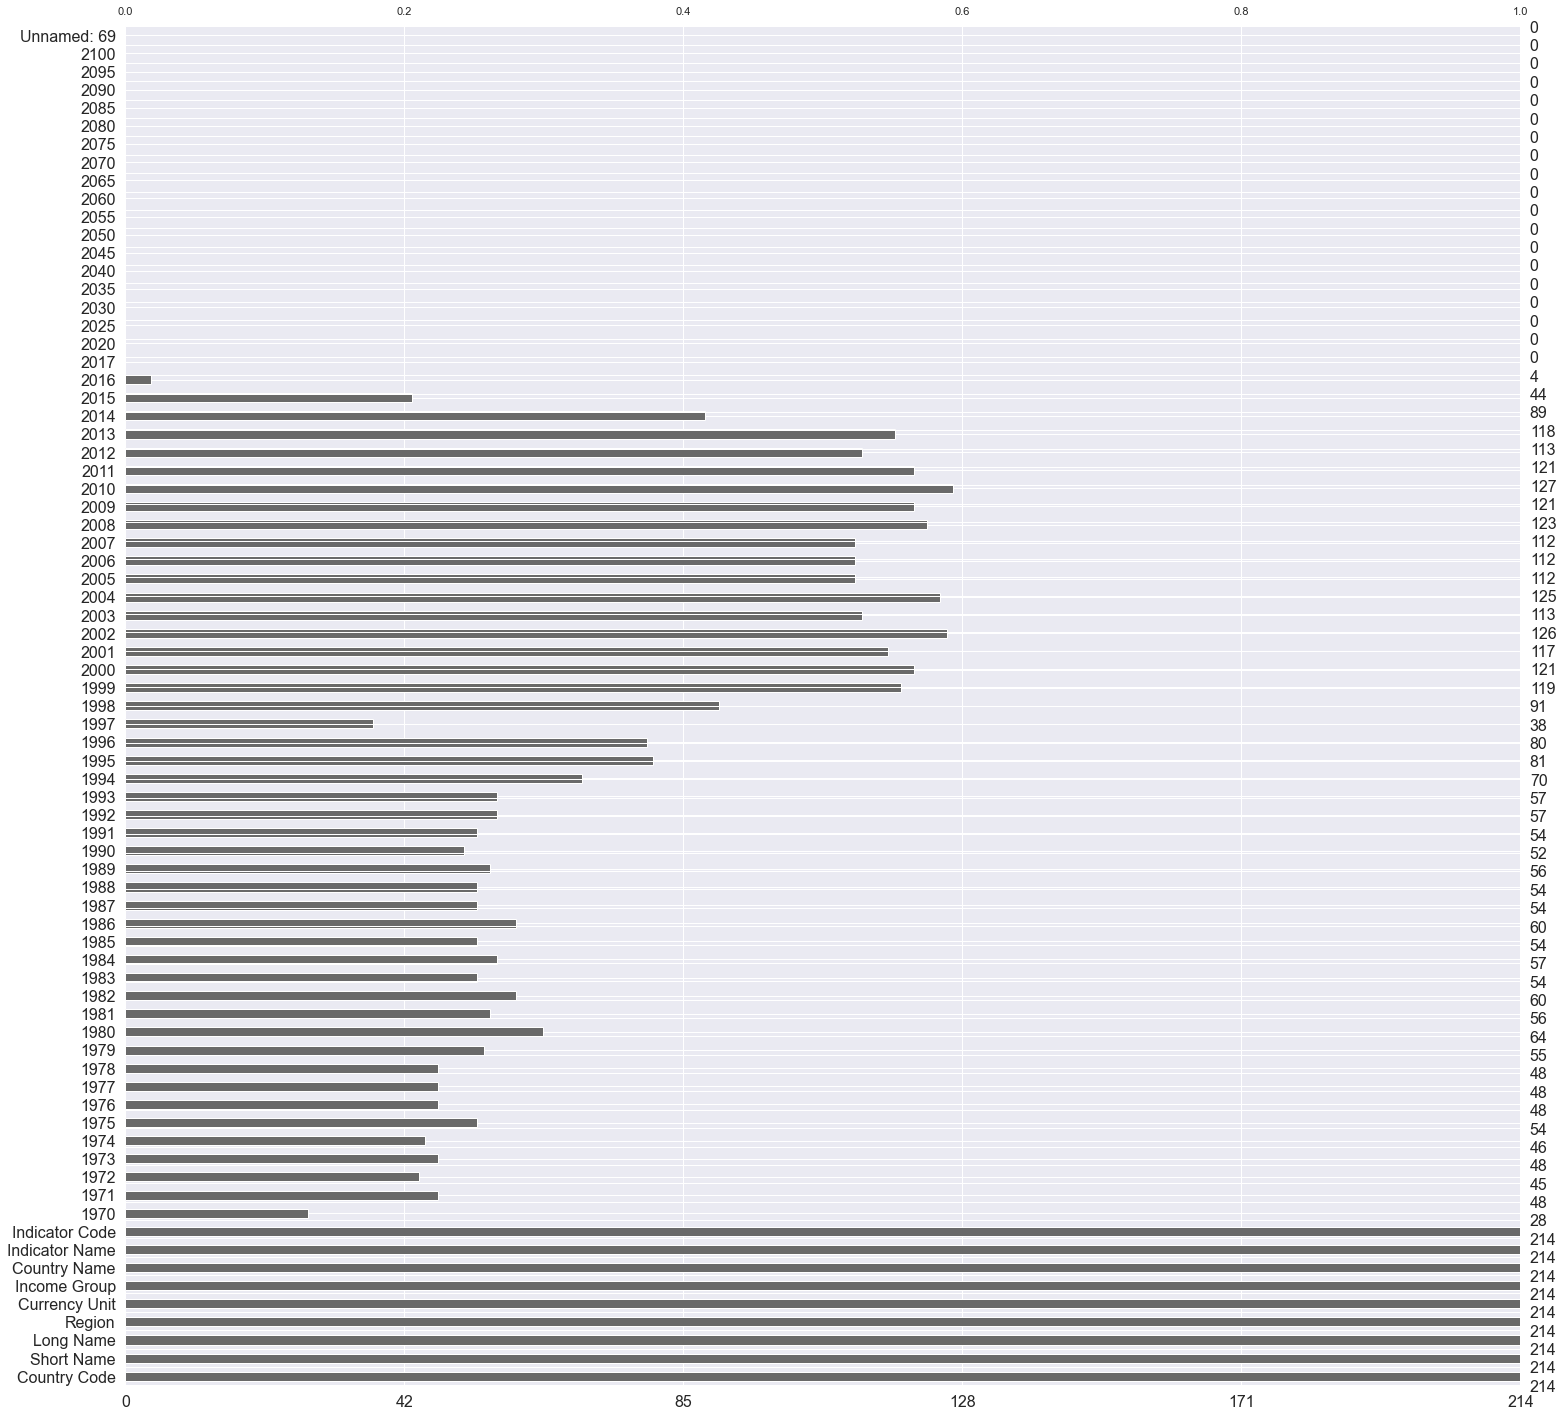

In [256]:
# Check missing data
msno.bar(df_government_expenditure_on_education_as_percent_of_gdp)

### Select column from 2005 to 2015

<AxesSubplot:>

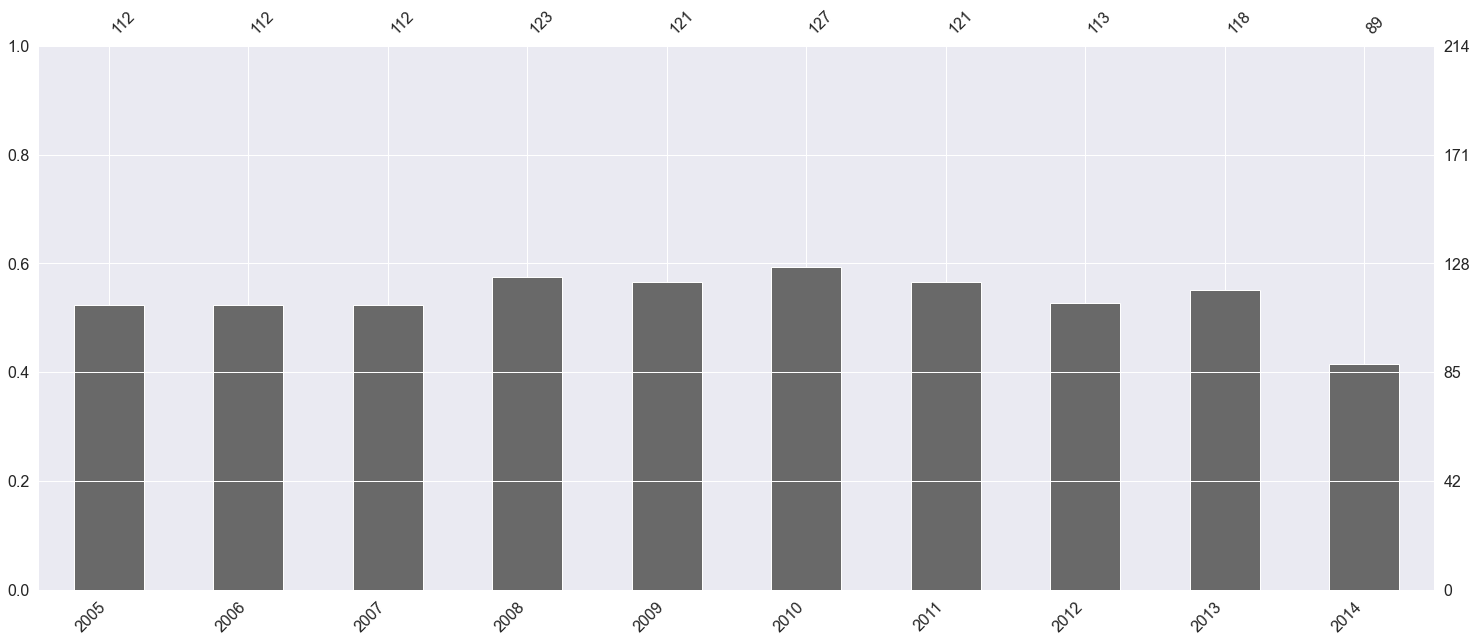

In [257]:
# Let's start by selecting the relevant time columns for the study of our variable. 
# 'select_columns' function is defined in utils.py. 
# We will select the last 10 years of avialable data
df_government_expenditure_on_education_as_percent_of_gdp_subset = select_columns(df_government_expenditure_on_education_as_percent_of_gdp,'2005','2014')

#Change index to "REFERENCE_VARIABLE"
df_government_expenditure_on_education_as_percent_of_gdp_subset = df_government_expenditure_on_education_as_percent_of_gdp_subset.set_index(REFERENCE_VARIABLE)

# Check missing data
#msno.matrix(df_government_expenditure_on_education_as_percent_of_gdp_subset)
msno.bar(df_government_expenditure_on_education_as_percent_of_gdp_subset)

### Clean 1 - Dismiss rows with full NaN values from 2005 to 2015

<AxesSubplot:>

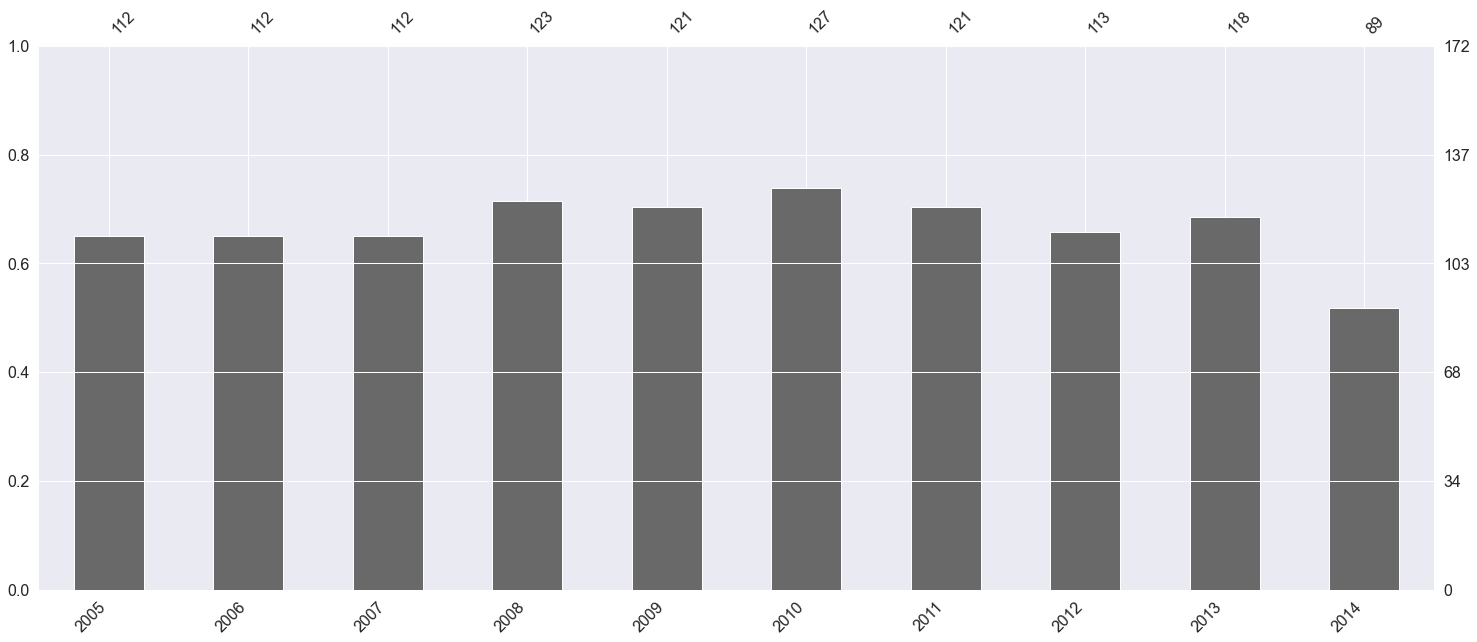

In [258]:
# First let's dismiss rows/countries for which no data is available from 2005 to 2015
df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned1 = df_government_expenditure_on_education_as_percent_of_gdp_subset.dropna(subset=['2005','2006','2007','2008','2009','2010','2011','2012','2013','2014'], how='all')

# Check missing data
msno.bar(df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned1)

### Clean 2 - Imputation by row mean for remaining NaN values

<AxesSubplot:>

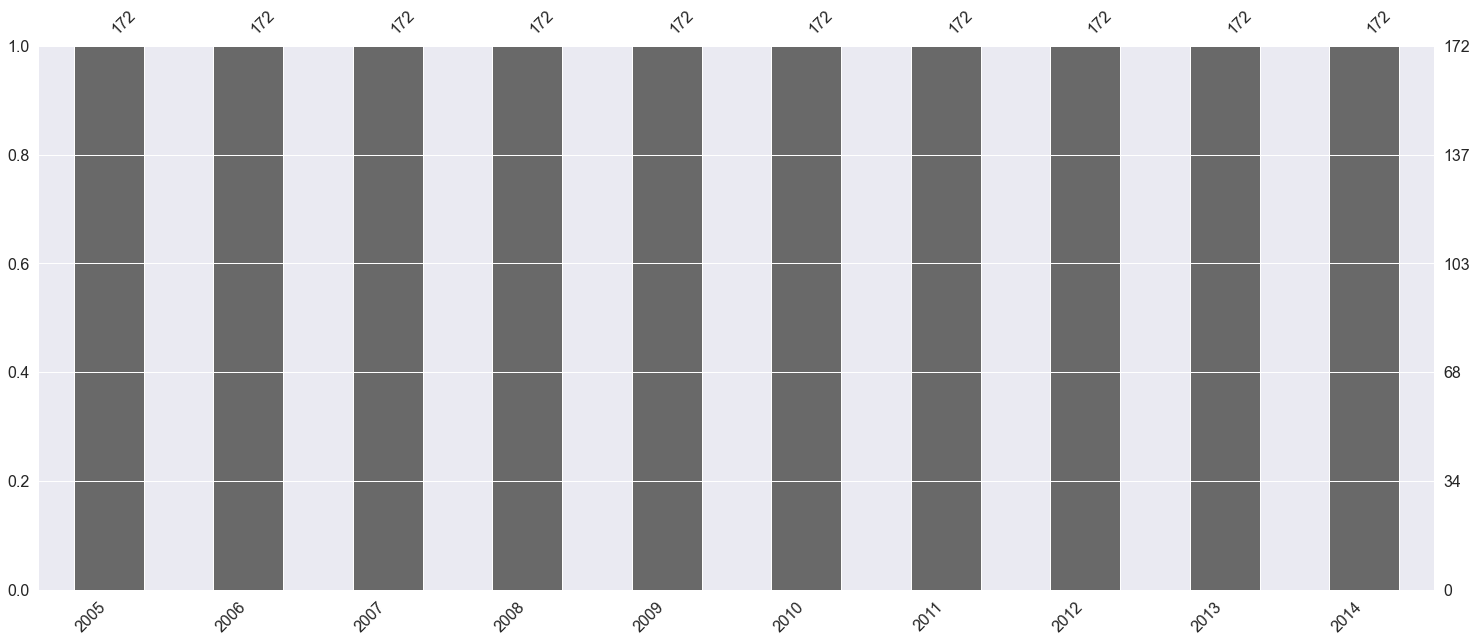

In [259]:
# Second let's impute by the mean for any NaN value on each row as this variable is relatively stable through time
df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned2 = df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned1.T.fillna(df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned1.mean(axis=1)).T

# Check missing data
msno.bar(df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned2)

### Add mean column, sort values and set index to "variable_reference"

In [260]:
#  Fill mean column with computed means along rows
df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned2["Government expenditure on education as % of GDP (%) (mean 2010-2014)"] = df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned2.iloc[:,1:5].mean(axis=1)

# Sort
df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned2 = df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned2.sort_values("Government expenditure on education as % of GDP (%) (mean 2010-2014)", ascending=False)

# Show
df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned2.head(20)


2005  \
Country Name          Country Code Region                                  
Cuba                  CUB          Latin America & Caribbean   10.557690   
Lesotho               LSO          Sub-Saharan Africa          12.079670   
Botswana              BWA          Sub-Saharan Africa          10.678590   
Solomon Islands       SLB          East Asia & Pacific          9.413570   
Timor-Leste           TLS          East Asia & Pacific          8.474134   
Moldova               MDA          Europe & Central Asia        7.162730   
Djibouti              DJI          Middle East & North Africa   8.361840   
Denmark               DNK          Europe & Central Asia        8.065150   
Iceland               ISL          Europe & Central Asia        7.418310   
Bolivia               BOL          Latin America & Caribbean    6.982454   
Zimbabwe              ZWE          Sub-Saharan Africa           6.817810   
Sao Tome and Principe STP          Sub-Saharan Africa           5.260450   
Swaziland             SWZ          Sub-Saharan Africa           6.503680   
Namibia               NAM          Sub-Saharan Africa           6.957137   
Cyprus                CYP          Europe & Central Asia        6.196000   
Norway                NOR          Europe & Central Asia        6.865030   
Ukraine               UKR          Europe & Central Asia        6.064690   
Sweden                SWE          Europe & Central Asia        6.553540   
Tunisia               TUN          Middle East & North Africa   6.451570   
Puerto Rico           PRI          Latin America & Caribbean    6.390770   

                                                                    2006  \
Country Name          Country Code Region                                  
Cuba                  CUB          Latin America & Caribbean    9.057290   
Lesotho               LSO          Sub-Saharan Africa          11.271280   
Botswana              BWA          Sub-Saharan Africa           9.721000   
Solomon Islands       SLB          East Asia & Pacific          9.413570   
Timor-Leste           TLS          East Asia & Pacific          8.474134   
Moldova               MDA          Europe & Central Asia        7.498930   
Djibouti              DJI          Middle East & North Africa   8.257330   
Denmark               DNK          Europe & Central Asia        7.740310   
Iceland               ISL          Europe & Central Asia        7.349410   
Bolivia               BOL          Latin America & Caribbean    6.313610   
Zimbabwe              ZWE          Sub-Saharan Africa           6.817810   
Sao Tome and Principe STP          Sub-Saharan Africa           4.545750   
Swaziland             SWZ          Sub-Saharan Africa           6.705020   
Namibia               NAM          Sub-Saharan Africa           6.037820   
Cyprus                CYP          Europe & Central Asia        6.227600   
Norway                NOR          Europe & Central Asia        6.372180   
Ukraine               UKR          Europe & Central Asia        6.210480   
Sweden                SWE          Europe & Central Asia        6.408770   
Tunisia               TUN          Middle East & North Africa   6.438590   
Puerto Rico           PRI          Latin America & Caribbean    6.390770   

                                                                    2007  \
Country Name          Country Code Region                                  
Cuba                  CUB          Latin America & Caribbean   11.868290   
Lesotho               LSO          Sub-Saharan Africa          11.570697   
Botswana              BWA          Sub-Saharan Africa           8.851490   
Solomon Islands       SLB          East Asia & Pacific          9.879950   
Timor-Leste           TLS          East Asia & Pacific          8.474134   
Moldova               MDA          Europe & Central Asia        8.293430   
Djibouti              DJI          Middle East & North Africa   8.389160   
Denmark               DNK          Eur

### Plot - Global

#### Plot 1 - Folium

In [261]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [20, 15], zoom_start = 1.5)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
map.choropleth(geo_data = country_geo, data = df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned2.reset_index(REFERENCE_VARIABLE),
                 columns = [REFERENCE_VARIABLE[1], 'Government expenditure on education as % of GDP (%) (mean 2010-2014)'],
                 key_on = 'feature.id',
                 fill_color = 'YlGnBu', fill_opacity = 0.7, line_opacity = 0.2,
                 legend_name = 'Government expenditure on education as % of GDP (%) (mean 2010-2014)')

map

/Users/romain/opt/anaconda3/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


#### Plot 2 - (Horizontal Chart Plot) Government expenditure on education as % of GDP (%) (mean 2010-2014) Ranking

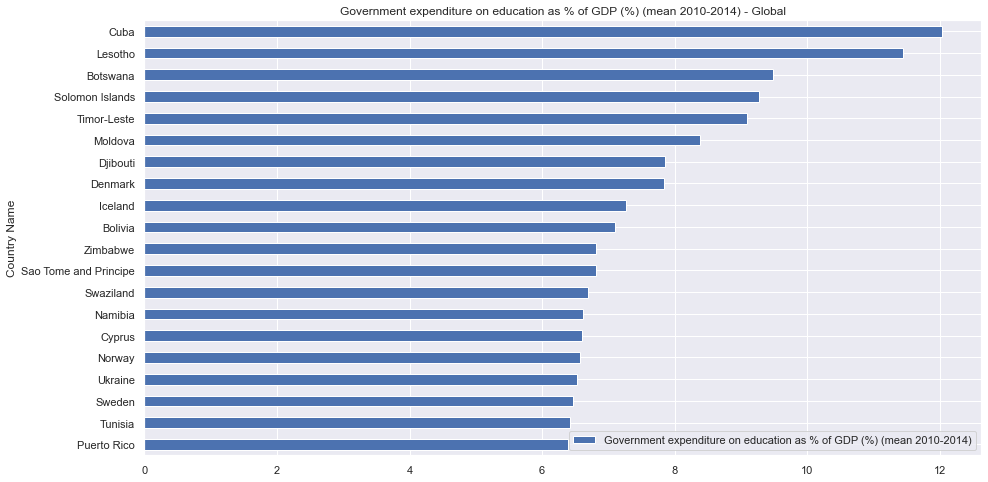

In [262]:
# Plot
(
df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned2["Government expenditure on education as % of GDP (%) (mean 2010-2014)"]
.reset_index(['Country Code', 'Region'])
.drop(['Country Code', 'Region'], axis = 1)
.head(20)
.plot.barh(figsize=(15,8)).invert_yaxis()
)

plt.title("Government expenditure on education as % of GDP (%) (mean 2010-2014) - Global")
plt.show()


### Plot - Region

In [263]:
# Reset index
df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned2.reset_index(["Country Code", "Region"], inplace = True)

# Fill list with regions' dataframes for next plot
list_df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned2 = []

for i in range(len(list_regions)):
    list_df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned2.append(df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned2[df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned2['Region'] == list_regions[i]])
 




####  Plot - (Horizontal Chart Plot) Government expenditure on education as % of GDP (%) (mean 2010-2014) Ranking

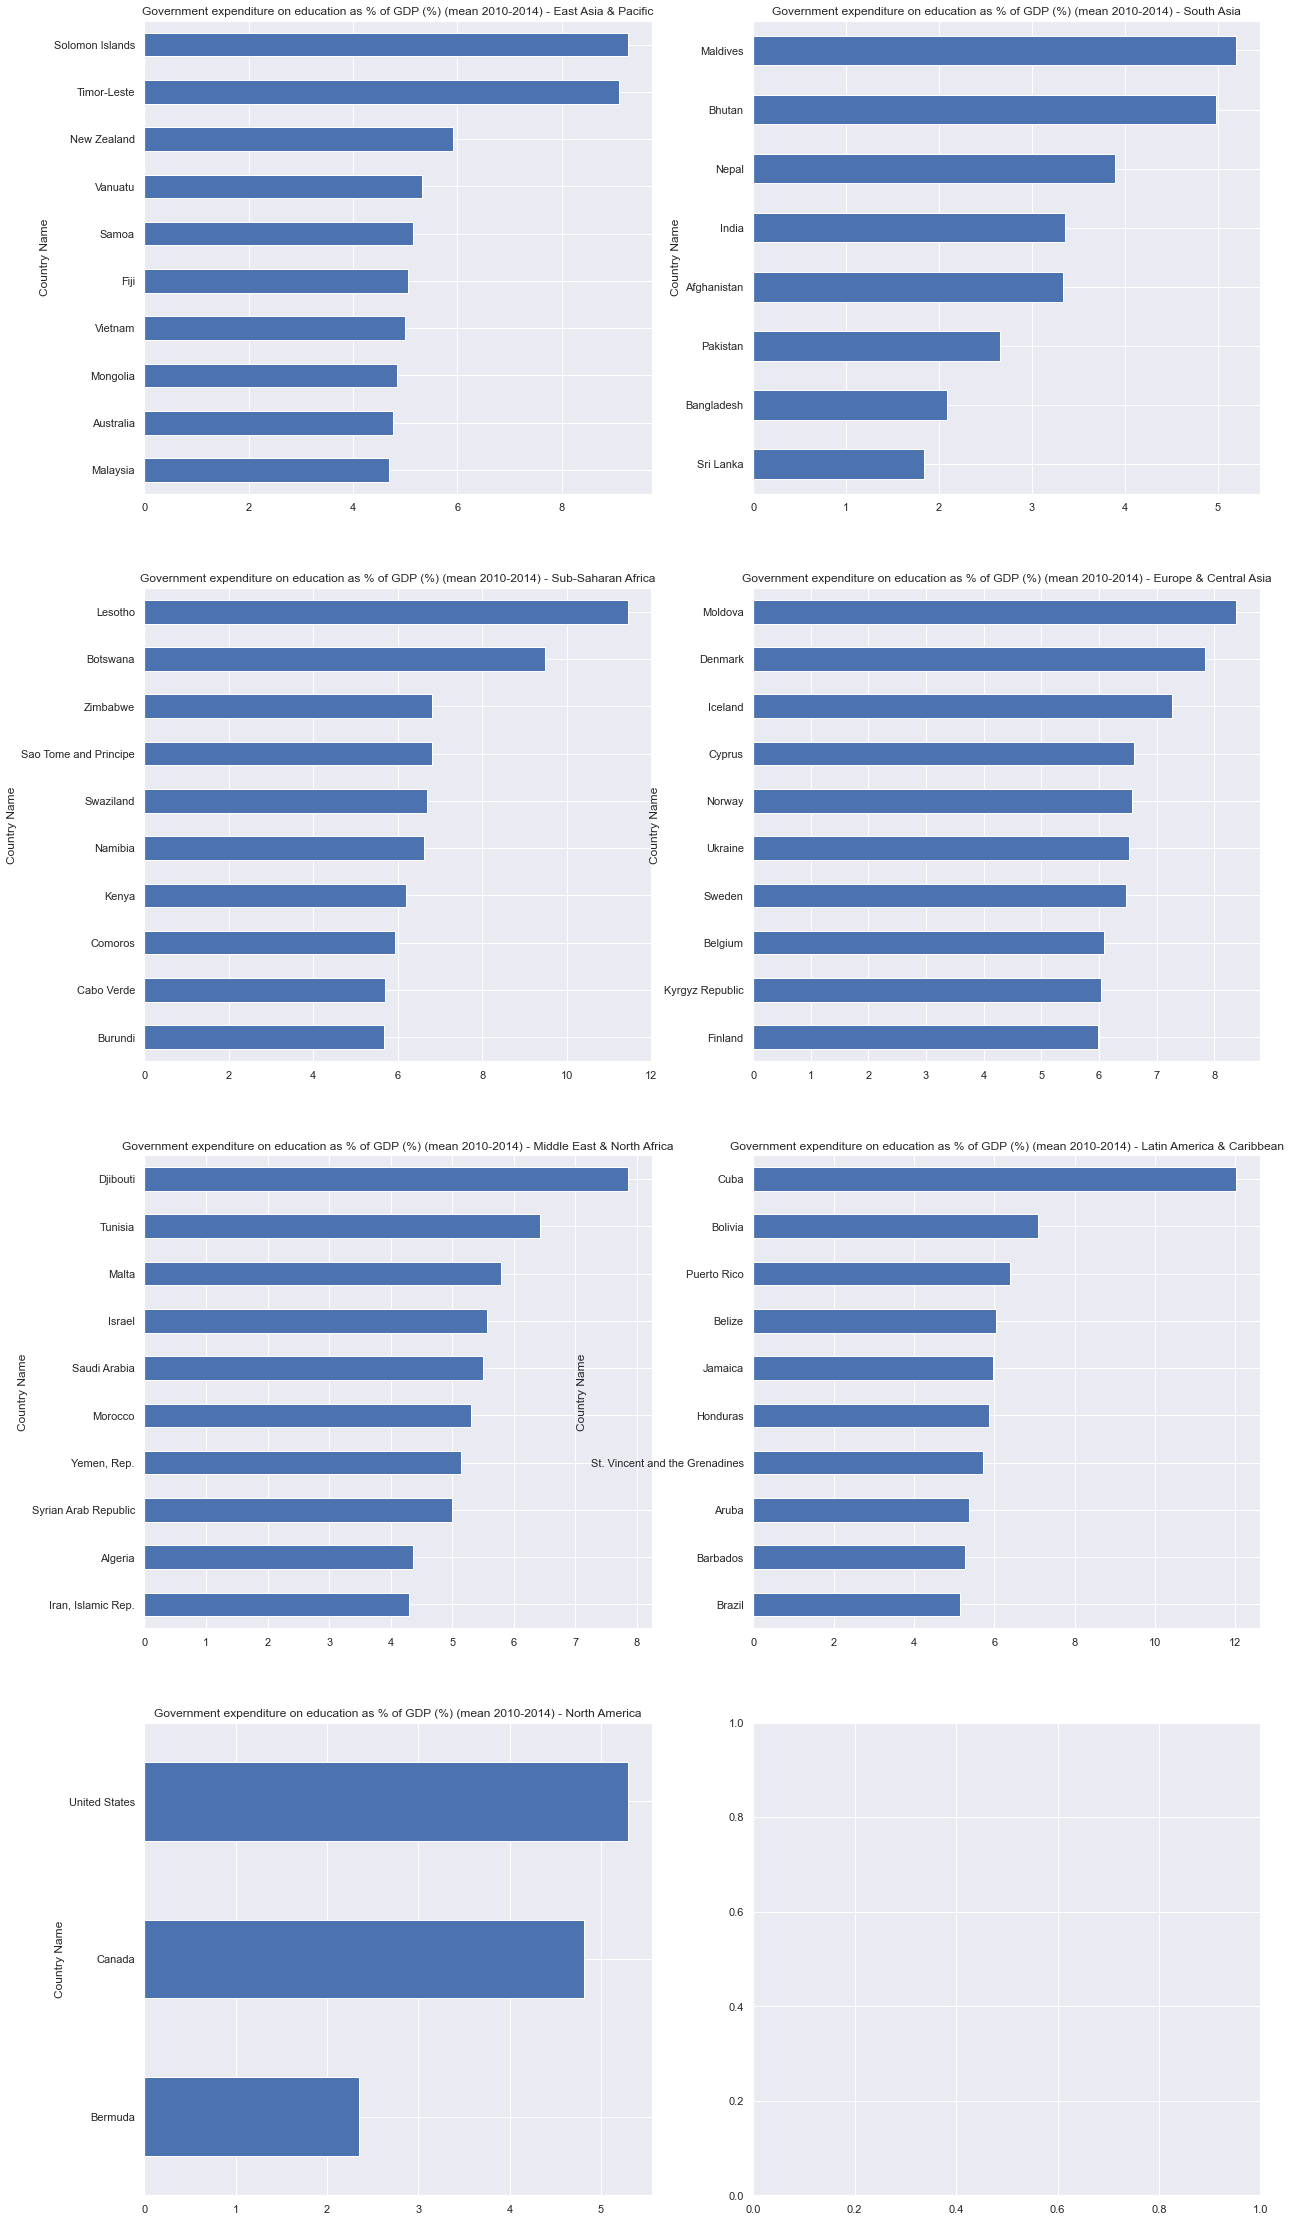

In [264]:
#Sublot
nrows = 4
ncols = 2
fig4, axes4 = plt.subplots(nrows = nrows, ncols = ncols,figsize = (20, 40))

# Plot
nrows_ = 0
ncols_ = 0
i = 0
    
for nrows_ in range(nrows):
    for ncols_ in range(ncols):
        if i <  len(list_df_by_region):  
            (
            list_df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned2[i]['Government expenditure on education as % of GDP (%) (mean 2010-2014)']
                .head(10)
                .T.plot(kind = "barh",                    
                            title = 'Government expenditure on education as % of GDP (%) (mean 2010-2014)' + ' - ' + list_regions[i], 
                            ax = axes4[nrows_][ncols_])
                .invert_yaxis()                                                             
            )
        i = i + 1 
        ncols_ = ncols_ + 1
    nrows_ = nrows_ + 1  
plt.show()



In [265]:
# Reinitialize index for general merge
df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned2.reset_index("Country Name", inplace = True)
df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned2.set_index(REFERENCE_VARIABLE, inplace = True)


## Genaral DataFrame

### Merge all previous dataframes

In [266]:
df_internet_users_subset_cleaned2_superior_X_for_2016 = df_internet_users_subset_cleaned2_superior_X_for_2016.rename(columns = {'2016':'Internet Users (%)(2016)'})

# List of dataframes to merge
data_frames_to_merge = [df_internet_users_subset_cleaned2_superior_X_for_2016,
                        df_population_growth_subset_cleaned2, 
                        df_gdp_capita_ppp_subset_cleaned2_filtered_ranking_2016,
                        df_population_15_64_subset_cleaned2,
                        df_enrolment_total,
                        df_government_expenditure_on_education_as_percent_of_gdp_subset_cleaned2
                        ]


# Merge into df_general
df_general = pd.concat(data_frames_to_merge, axis = 1, sort = False, join = 'inner')

# Select relevant columns
df_general = df_general[['Internet Users (%)(2016)', 
                         'Population Growth (%)(Mean 2012-2016)', 
                         'GDP per capita, PPP (current international $) (2016)',
                         '15-64 population (mean 2013-2015)', 
                         'Total enrolment in education (mean 2010-2014)',
                         'Government expenditure on education as % of GDP (%) (mean 2010-2014)']]

# Print parameters 
print(str(len(df_general)) + " rows in dataframe")
print(str(len(df_general.columns)) + " columns in dataframe")
print(df_general.columns)

# Show 
df_general

66 rows in dataframe
6 columns in dataframe
Index(['Internet Users (%)(2016)', 'Population Growth (%)(Mean 2012-2016)',
       'GDP per capita, PPP (current international $) (2016)',
       '15-64 population (mean 2013-2015)',
       'Total enrolment in education (mean 2010-2014)',
       'Government expenditure on education as % of GDP (%) (mean 2010-2014)'],
      dtype='object')


Internet Users (%)(2016)  \
Country Name   Country Code Region                                                 
Iceland        ISL          Europe & Central Asia                      98.240016   
Luxembourg     LUX          Europe & Central Asia                      97.493930   
Norway         NOR          Europe & Central Asia                      97.298204   
Denmark        DNK          Europe & Central Asia                      96.967785   
United Kingdom GBR          Europe & Central Asia                      94.775801   
...                                                                          ...   
Peru           PER          Latin America & Caribbean                  45.461741   
Jamaica        JAM          Latin America & Caribbean                  45.000000   
Belize         BLZ          Latin America & Caribbean                  44.575740   
Algeria        DZA          Middle East & North Africa                 42.945527   
Botswana       BWA          Sub-Saharan Africa                         39.362997   

                                                        Population Growth (%)(Mean 2012-2016)  \
Country Name   Country Code Region                                                              
Iceland        ISL          Europe & Central Asia                                    0.933204   
Luxembourg     LUX          Europe & Central Asia                                    2.349885   
Norway         NOR          Europe & Central Asia                                    1.099199   
Denmark        DNK          Europe & Central Asia                                    0.568258   
United Kingdom GBR          Europe & Central Asia                                    0.738142   
...                                                                                       ...   
Peru           PER          Latin America & Caribbean                                1.309569   
Jamaica        JAM          Latin America & Caribbean                                0.363263   
Belize         BLZ          Latin America & Caribbean                                2.171907   
Algeria        DZA          Middle East & North Africa                               1.957759   
Botswana       BWA          Sub-Saharan Africa                                       1.851060   

                                                        GDP per capita, PPP (current international $) (2016)  \
Country Name   Country Code Region                                                                             
Iceland        ISL          Europe & Central Asia                                            51398.926506      
Luxembourg     LUX          Europe & Central Asia                                           103556.591156      
Norway         NOR          Europe & Central Asia                                            59384.811722      
Denmark        DNK          Europe & Central Asia                                            49818.804707      
United Kingdom GBR          Europe & Central Asia                                            43080.956403      
...                                                                                                   ...      
Peru           PER          Latin America & Caribbean                                        13043.882165      
Jamaica        JAM          Latin America & Caribbean                                         8838.436599      
Belize         BLZ          Latin America & Caribbean                                         8477.962375      
Algeria        DZA          Middle East & North Africa                                       15042.442301      
Botswana       BWA          Sub-Saharan Africa                                               16989.643548      

                                                        15-64 population (mean 2013-2015)  \
Country Name   Country Code Region                                                          
Iceland        ISL          Europe & Central Asia         

In [267]:
# Check stats
df_general.describe()

Internet Users (%)(2016)  Population Growth (%)(Mean 2012-2016)  \
count                 66.000000                              66.000000   
mean                  70.827323                               0.856662   
std                   16.592634                               0.931535   
min                   39.362997                              -0.655678   
25%                   58.189304                               0.222806   
50%                   70.768306                               0.851478   
75%                   86.292925                               1.368538   
max                   98.240016                               5.386916   

       GDP per capita, PPP (current international $) (2016)  \
count                                          66.000000      
mean                                        30112.808517      
std                                         17944.821179      
min                                          8477.962375      
25%                                         15977.387379      
50%                                         25928.591251      
75%                                         41473.836651      
max                                        103556.591156      

       15-64 population (mean 2013-2015)  \
count                       6.600000e+01   
mean                        2.061003e+07   
std                         3.430122e+07   
min                         6.480350e+04   
25%                         3.098578e+06   
50%                         6.815226e+06   
75%                         2.636917e+07   
max                         2.118206e+08   

       Total enrolment in education (mean 2010-2014)  \
count                                   6.600000e+01   
mean                                    2.624301e+06   
std                                     4.863252e+06   
min                                     5.516750e+03   
25%                                     3.966215e+05   
50%                                     9.022206e+05   
75%                                     3.240470e+06   
max                                     3.302015e+07   

       Government expenditure on education as % of GDP (%) (mean 2010-2014)  
count                                          66.000000                     
mean                                            4.793673                     
std                                             1.255175                     
min                                             2.044570                     
25%                                             4.040082                     
50%                                             4.794294                     
75%                                             5.318586                     
max                                             9.481603

In [268]:
# Check data type
df_general.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 66 entries, ('Iceland', 'ISL', 'Europe & Central Asia') to ('Botswana', 'BWA', 'Sub-Saharan Africa')
Data columns (total 6 columns):
 #   Column                                                                Non-Null Count  Dtype  
---  ------                                                                --------------  -----  
 0   Internet Users (%)(2016)                                              66 non-null     float64
 1   Population Growth (%)(Mean 2012-2016)                                 66 non-null     float64
 2   GDP per capita, PPP (current international $) (2016)                  66 non-null     float64
 3   15-64 population (mean 2013-2015)                                     66 non-null     float64
 4   Total enrolment in education (mean 2010-2014)                         66 non-null     float64
 5   Government expenditure on education as % of GDP (%) (mean 2010-2014)  66 non-null     float64
dtypes: float64(6)
memory

### Create "Effective internet users" colmun 

In [269]:
# This new indicator represents a rough estmation of the number of people using the internet in a given country

df_general_plus_effective_internet_users = df_general


# Compute new variable from 'Internet Users' and '15-64 population'
df_general_plus_effective_internet_users['Effective Internet Users'] = df_general_plus_effective_internet_users['Internet Users (%)(2016)']*df_general_plus_effective_internet_users['15-64 population (mean 2013-2015)']/100

# Sort
df_general_plus_effective_internet_users = df_general_plus_effective_internet_users.sort_values('Effective Internet Users', ascending = False)

# Show
df_general_plus_effective_internet_users.head(20)




Internet Users (%)(2016)  \
Country Name       Country Code Region                                                 
United States      USA          North America                              76.176737   
Brazil             BRA          Latin America & Caribbean                  59.682747   
Japan              JPN          East Asia & Pacific                        92.000000   
Mexico             MEX          Latin America & Caribbean                  59.540446   
Germany            DEU          Europe & Central Asia                      89.647101   
United Kingdom     GBR          Europe & Central Asia                      94.775801   
France             FRA          Europe & Central Asia                      85.622200   
Korea, Rep.        KOR          East Asia & Pacific                        92.716545   
Turkey             TUR          Europe & Central Asia                      58.347734   
Iran, Islamic Rep. IRN          Middle East & North Africa                 53.226773   
Spain              ESP          Europe & Central Asia                      80.561333   
Italy              ITA          Europe & Central Asia                      61.324253   
Thailand           THA          East Asia & Pacific                        47.504966   
Canada             CAN          North America                              89.840000   
Poland             POL          Europe & Central Asia                      73.300700   
Argentina          ARG          Latin America & Caribbean                  70.150764   
South Africa       ZAF          Sub-Saharan Africa                         54.000000   
Colombia           COL          Latin America & Caribbean                  58.136494   
Malaysia           MYS          East Asia & Pacific                        78.788310   
Australia          AUS          East Asia & Pacific                        88.238658   

                                                            Population Growth (%)(Mean 2012-2016)  \
Country Name       Country Code Region                                                              
United States      USA          North America                                            0.722468   
Brazil             BRA          Latin America & Caribbean                                0.882772   
Japan              JPN          East Asia & Pacific                                     -0.131617   
Mexico             MEX          Latin America & Caribbean                                1.371074   
Germany            DEU          Europe & Central Asia                                    0.587415   
United Kingdom     GBR          Europe & Central Asia                                    0.738142   
France             FRA          Europe & Central Asia                                    0.469878   
Korea, Rep.        KOR          East Asia & Pacific                                      0.517538   
Turkey             TUR          Europe & Central Asia                                    1.597211   
Iran, Islamic Rep. IRN          Middle East & North Africa                               1.229347   
Spain              ESP          Europe & Central Asia                                   -0.128233   
Italy              ITA          Europe & Central Asia                                    0.407129   
Thailand           THA          East Asia & Pacific                                      0.391052   
Canada             CAN          North America                                            1.101038   
Poland             POL          Europe & Central Asia                                   -0.060643   
Argentina          ARG          Latin America & Caribbean                                1.024992   
South Africa       ZAF          Sub-Saharan Africa                                       1.553955   
Colombia           COL          Latin America & Caribbean                                0.945588   
Malaysia           MYS          East Asia & Pacific                                      1.707512   
Au

In [270]:
# Check stats
df_general_plus_effective_internet_users.describe()

Internet Users (%)(2016)  Population Growth (%)(Mean 2012-2016)  \
count                 66.000000                              66.000000   
mean                  70.827323                               0.856662   
std                   16.592634                               0.931535   
min                   39.362997                              -0.655678   
25%                   58.189304                               0.222806   
50%                   70.768306                               0.851478   
75%                   86.292925                               1.368538   
max                   98.240016                               5.386916   

       GDP per capita, PPP (current international $) (2016)  \
count                                          66.000000      
mean                                        30112.808517      
std                                         17944.821179      
min                                          8477.962375      
25%                                         15977.387379      
50%                                         25928.591251      
75%                                         41473.836651      
max                                        103556.591156      

       15-64 population (mean 2013-2015)  \
count                       6.600000e+01   
mean                        2.061003e+07   
std                         3.430122e+07   
min                         6.480350e+04   
25%                         3.098578e+06   
50%                         6.815226e+06   
75%                         2.636917e+07   
max                         2.118206e+08   

       Total enrolment in education (mean 2010-2014)  \
count                                   6.600000e+01   
mean                                    2.624301e+06   
std                                     4.863252e+06   
min                                     5.516750e+03   
25%                                     3.966215e+05   
50%                                     9.022206e+05   
75%                                     3.240470e+06   
max                                     3.302015e+07   

       Government expenditure on education as % of GDP (%) (mean 2010-2014)  \
count                                          66.000000                      
mean                                            4.793673                      
std                                             1.255175                      
min                                             2.044570                      
25%                                             4.040082                      
50%                                             4.794294                      
75%                                             5.318586                      
max                                             9.481603                      

       Effective Internet Users  
count              6.600000e+01  
mean               1.456257e+07  
std                2.488581e+07  
min                3.662351e+04  
25%                2.530168e+06  
50%                5.142946e+06  
75%                1.926917e+07  
max                1.613580e+08

#### Plot - Global

##### Plot- Folium

In [271]:
# Setup a folium map at a high-level zoom
map = folium.Map(location = [20, 15], zoom_start = 1.5)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
map.choropleth(geo_data = country_geo, data = df_general_plus_effective_internet_users.reset_index("Country Code"),
                 columns = [REFERENCE_VARIABLE[1],'GDP per capita, PPP (current international $) (2016)'],
                 key_on = 'feature.id',
                 fill_color = 'YlGnBu', fill_opacity = 0.7, line_opacity = 0.2,
                 legend_name = 'Effective Internet Users')

map

/Users/romain/opt/anaconda3/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


## Attractiveness Score Calculation

### 1st Method - Percentiles

#### Overwrite each value by its weighted percentile equivalent in the column

In [272]:
# Create a copy into new variable
df_general_percentile = df_general_plus_effective_internet_users

# Overwrite each value by its weighted percentile equivalent in the corresponding column 

# Weight of 1
df_general_percentile['Internet Users (%)(2016)'] = df_general_percentile['Internet Users (%)(2016)'].rank(pct = True)*100
# Weight of 1
df_general_percentile['Population Growth (%)(Mean 2012-2016)'] = df_general_percentile['Population Growth (%)(Mean 2012-2016)'].rank(pct = True)*100
# Weight of 1
df_general_percentile['15-64 population (mean 2013-2015)'] = df_general_percentile['15-64 population (mean 2013-2015)'].rank(pct = True)*100
# Weight of 1
df_general_percentile['Total enrolment in education (mean 2010-2014)'] = df_general_percentile['Total enrolment in education (mean 2010-2014)'].rank(pct = True)*100
# Weight of 1
df_general_percentile['GDP per capita, PPP (current international $) (2016)'] = df_general_percentile['GDP per capita, PPP (current international $) (2016)'].rank(pct = True)*100
# Weight of 2 
df_general_percentile['Effective Internet Users'] = 2*df_general_percentile['Effective Internet Users'].rank(pct = True)*100
# Weight of 2 
df_general_percentile['Government expenditure on education as % of GDP (%) (mean 2010-2014)'] = 2*(100 - df_general_plus_effective_internet_users['Government expenditure on education as % of GDP (%) (mean 2010-2014)'].rank(pct = True)*100)

# Print parameters 
print(str(len(df_general_percentile)) + " rows in dataframe")
print(str(len(df_general_percentile.columns)) + " columns in dataframe")
print(df_general_percentile.columns)

# Show df_general_rank
df_general_percentile.head(15)


66 rows in dataframe
7 columns in dataframe
Index(['Internet Users (%)(2016)', 'Population Growth (%)(Mean 2012-2016)',
       'GDP per capita, PPP (current international $) (2016)',
       '15-64 population (mean 2013-2015)',
       'Total enrolment in education (mean 2010-2014)',
       'Government expenditure on education as % of GDP (%) (mean 2010-2014)',
       'Effective Internet Users'],
      dtype='object')


Internet Users (%)(2016)  \
Country Name       Country Code Region                                                 
United States      USA          North America                              57.575758   
Brazil             BRA          Latin America & Caribbean                  33.333333   
Japan              JPN          East Asia & Pacific                        90.909091   
Mexico             MEX          Latin America & Caribbean                  31.818182   
Germany            DEU          Europe & Central Asia                      84.848485   
United Kingdom     GBR          Europe & Central Asia                      93.939394   
France             FRA          Europe & Central Asia                      74.242424   
Korea, Rep.        KOR          East Asia & Pacific                        92.424242   
Turkey             TUR          Europe & Central Asia                      27.272727   
Iran, Islamic Rep. IRN          Middle East & North Africa                 16.666667   
Spain              ESP          Europe & Central Asia                      69.696970   
Italy              ITA          Europe & Central Asia                      37.878788   
Thailand           THA          East Asia & Pacific                        12.121212   
Canada             CAN          North America                              86.363636   
Poland             POL          Europe & Central Asia                      53.030303   

                                                            Population Growth (%)(Mean 2012-2016)  \
Country Name       Country Code Region                                                              
United States      USA          North America                                           45.454545   
Brazil             BRA          Latin America & Caribbean                               53.030303   
Japan              JPN          East Asia & Pacific                                     13.636364   
Mexico             MEX          Latin America & Caribbean                               75.757576   
Germany            DEU          Europe & Central Asia                                   42.424242   
United Kingdom     GBR          Europe & Central Asia                                   46.969697   
France             FRA          Europe & Central Asia                                   34.848485   
Korea, Rep.        KOR          East Asia & Pacific                                     37.878788   
Turkey             TUR          Europe & Central Asia                                   86.363636   
Iran, Islamic Rep. IRN          Middle East & North Africa                              69.696970   
Spain              ESP          Europe & Central Asia                                   15.151515   
Italy              ITA          Europe & Central Asia                                   33.333333   
Thailand           THA          East Asia & Pacific                                     30.303030   
Canada             CAN          North America                                           63.636364   
Poland             POL          Europe & Central Asia                                   16.666667   

                                                            GDP per capita, PPP (current international $) (2016)  \
Country Name       Country Code Region                                                                             
United States      USA          North America                                                       93.939394      
Brazil             BRA          Latin America & Caribbean                                           22.727273      
Japan              JPN          East Asia & Pacific                                                 75.757576      
Mexico             MEX          Latin America & Caribbean                                           34.848485      
Germany            DEU          Europe & Central Asia                                               84.848485      
United Kingdom     GBR          E

#### Rename columns

In [273]:
df_general_percentile = df_general_percentile.rename(columns = {'Internet Users (%)(2016)' : 'Internet Users (%)(2016) (Percentile)'})
df_general_percentile = df_general_percentile.rename(columns = {'Population Growth (%)(Mean 2012-2016)' : 'Population Growth (%)(Mean 2012-2016) (Percentile)'})
df_general_percentile = df_general_percentile.rename(columns = {'15-64 population (mean 2013-2015)' : '15-64 Population (Mean 2013-2015) (Percentile)'})
df_general_percentile = df_general_percentile.rename(columns = {'Total enrolment in education (mean 2010-2014)' : 'Total Enrolment in Education (Mean 2010-2014) (Percentile)'})
df_general_percentile = df_general_percentile.rename(columns = {'Government expenditure on education as % of GDP (%) (mean 2010-2014)' : 'Government Expenditure on Education as % of GDP (%)(Mean 2010-2014) (Percentile) - REVERSE'})
df_general_percentile = df_general_percentile.rename(columns = {'Effective Internet Users':'Effective Internet Users (2016) (Percentile)'})
df_general_percentile = df_general_percentile.rename(columns = {'GDP per capita, PPP (current international $) (2016)' : 'GDP per capita, PPP (current international $)(2016) (Percentile)'})



#### Create "Attractiveness Score" colmun with mean value of each weighted country's indicators percentiles 

In [274]:
# Copy into new variable
df_general_percentile_attractiveness_score = df_general_percentile

# Selected columns/indicators :
selected_indicators = ['Population Growth (%)(Mean 2012-2016) (Percentile)',
                       'Total Enrolment in Education (Mean 2010-2014) (Percentile)',
                       'Government Expenditure on Education as % of GDP (%)(Mean 2010-2014) (Percentile) - REVERSE',
                       'Effective Internet Users (2016) (Percentile)',
                       'GDP per capita, PPP (current international $)(2016) (Percentile)'
                      ]

# Unselected columns/indicators
unselected_indicators = ['Population Growth (%)(Mean 2012-2016) (Percentile)',
                         '15-64 Population (Mean 2013-2015) (Percentile)', 
                         'Internet Users (%)(2016) (Percentile)'
                        ]

# Attractiveness score normalization on a /100 basis
df_general_percentile_attractiveness_score['Attractiveness Score(/100)'] = df_general_percentile_attractiveness_score[selected_indicators].mean(axis = 1)*100/150

# Sort values
df_general_percentile_attractiveness_score = df_general_percentile_attractiveness_score.sort_values('Attractiveness Score(/100)', ascending = False)

# Delete columns not taken into account in the computation of 'Attractiveness Score(/100)' indicator
df_general_percentile_attractiveness_score_selected_indicators = df_general_percentile_attractiveness_score.drop(unselected_indicators, axis = 1)

# Print parameters 
print(str(len(df_general_percentile_attractiveness_score_selected_indicators)) + " rows in dataframe")
print(str(len(df_general_percentile_attractiveness_score_selected_indicators.columns)) + " columns in dataframe")
print(df_general_percentile_attractiveness_score_selected_indicators.columns)

# Show 
df_general_percentile_attractiveness_score_selected_indicators.head(15)

66 rows in dataframe
5 columns in dataframe
Index(['GDP per capita, PPP (current international $)(2016) (Percentile)',
       'Total Enrolment in Education (Mean 2010-2014) (Percentile)',
       'Government Expenditure on Education as % of GDP (%)(Mean 2010-2014) (Percentile) - REVERSE',
       'Effective Internet Users (2016) (Percentile)',
       'Attractiveness Score(/100)'],
      dtype='object')


GDP per capita, PPP (current international $)(2016) (Percentile)  \
Country Name       Country Code Region                                                                                         
Turkey             TUR          Europe & Central Asia                                               48.484848                  
Japan              JPN          East Asia & Pacific                                                 75.757576                  
Germany            DEU          Europe & Central Asia                                               84.848485                  
Iran, Islamic Rep. IRN          Middle East & North Africa                                          40.909091                  
Korea, Rep.        KOR          East Asia & Pacific                                                 66.666667                  
Kazakhstan         KAZ          Europe & Central Asia                                               50.000000                  
United States      USA          North America                                                       93.939394                  
Mexico             MEX          Latin America & Caribbean                                           34.848485                  
Italy              ITA          Europe & Central Asia                                               71.212121                  
Australia          AUS          East Asia & Pacific                                                 83.333333                  
United Kingdom     GBR          Europe & Central Asia                                               77.272727                  
Malaysia           MYS          East Asia & Pacific                                                 54.545455                  
Peru               PER          Latin America & Caribbean                                           13.636364                  
Thailand           THA          East Asia & Pacific                                                 28.787879                  
Canada             CAN          North America                                                       80.303030                  

                                                            Total Enrolment in Education (Mean 2010-2014) (Percentile)  \
Country Name       Country Code Region                                                                                   
Turkey             TUR          Europe & Central Asia                                               95.454545            
Japan              JPN          East Asia & Pacific                                                 92.424242            
Germany            DEU          Europe & Central Asia                                               90.909091            
Iran, Islamic Rep. IRN          Middle East & North Africa                                          96.969697            
Korea, Rep.        KOR          East Asia & Pacific                                                 87.878788            
Kazakhstan         KAZ          Europe & Central Asia                                               63.636364            
United States      USA          North America                                                      100.000000            
Mexico             MEX          Latin America & Caribbean                                           93.939394            
Italy              ITA          Europe & Central Asia                                               84.848485            
Australia          AUS          East Asia & Pacific                                                 74.242424            
United Kingdom     GBR          Europe & Central Asia                                               89.393939            
Malaysia           MYS          East Asia & Pacific                                                 71.212121            
Peru               PER          Latin America & Caribbean                                           68.181818            
Thailand           THA          East Asia & Pacific  

#### Plot - Global

##### Plot 1 - (Horizontal Chart Plot) Attractiveness score

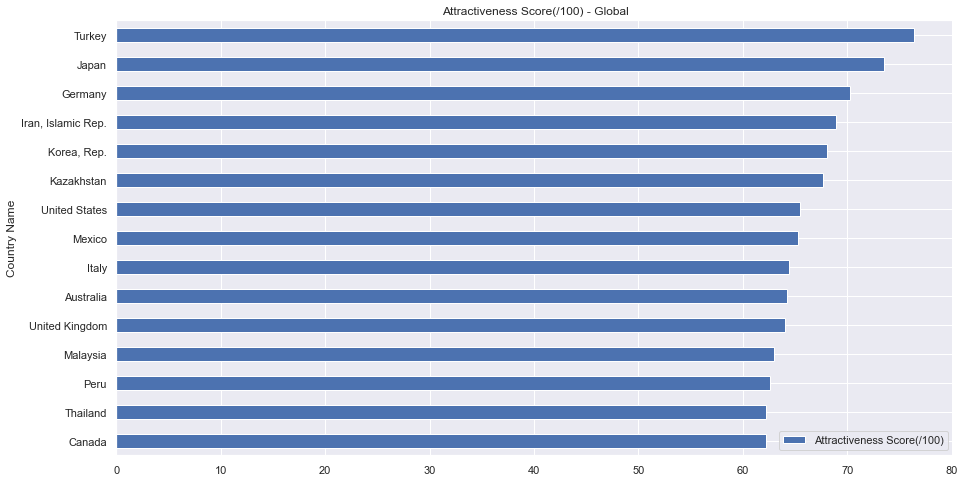

In [275]:
# Plot 
(df_general_percentile_attractiveness_score_selected_indicators['Attractiveness Score(/100)']
.reset_index(['Country Code','Region'])
.head(15)
.plot(kind = "barh", figsize = (15, 8), title = "Attractiveness Score(/100) - Global")
.invert_yaxis()
)


##### Plot 2 - Folium

In [276]:
# Setup a folium map at a high-level zoom
map2 = folium.Map(location = [20, 15], zoom_start = 1.5)

# choropleth maps bind Pandas Data Frames and json geometries.
#This allows us to quickly visualize data combinations
map2.choropleth(geo_data = country_geo, data = df_general_percentile_attractiveness_score_selected_indicators.reset_index("Country Code"),
                 columns = ['Country Code','Attractiveness Score(/100)'],
                 key_on = 'feature.id',
                 fill_color = 'YlGnBu', fill_opacity = 0.7, line_opacity = 0.2,
                 legend_name = 'Effective Internet Users')

map2

/Users/romain/opt/anaconda3/lib/python3.8/site-packages/folium/folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


#### Plot - Region

##### Plot 1 - (Horizontal Chart Plot) Attractiveness score

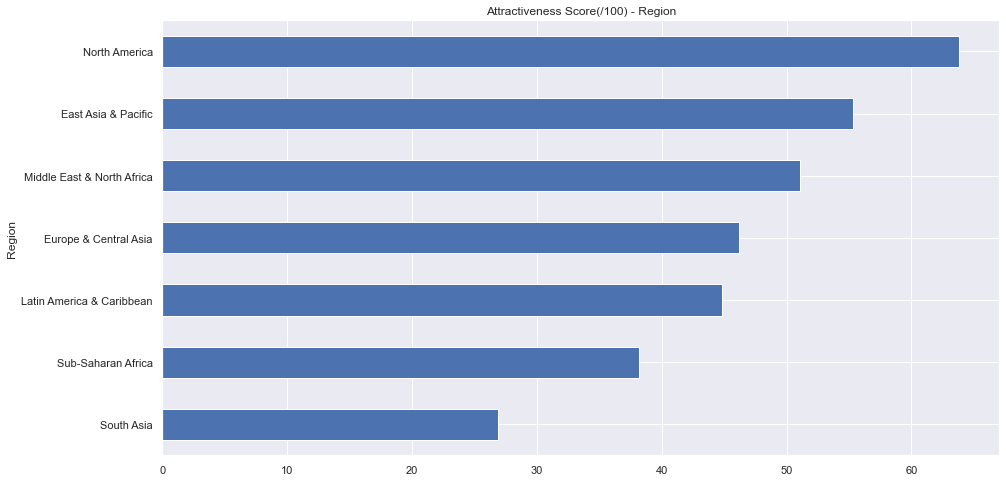

In [277]:
# Plot
(df_general_percentile_attractiveness_score_selected_indicators
 .groupby("Region")['Attractiveness Score(/100)']
 .mean()
 .sort_values(ascending=False)
 .plot(kind="barh", figsize=(15, 8), sort_columns=True, title="Attractiveness Score(/100) - Region")
 .invert_yaxis() 
)

In [278]:
df_general_percentile_attractiveness_score.reset_index("Region", inplace = True)

# Fill list with regions' dataframes for next plot
list_df_general_percentile_by_region = []

for i in range(len(list_regions)):
    list_df_general_percentile_by_region.append(df_general_percentile_attractiveness_score[df_general_percentile_attractiveness_score['Region'] == list_regions[i]])
    
list_df_general_percentile_by_region[0]
df_general_percentile_attractiveness_score.drop("Region", axis = 1, inplace = True)



##### Plot - (Horizontal Chart Plot) Attractiveness score

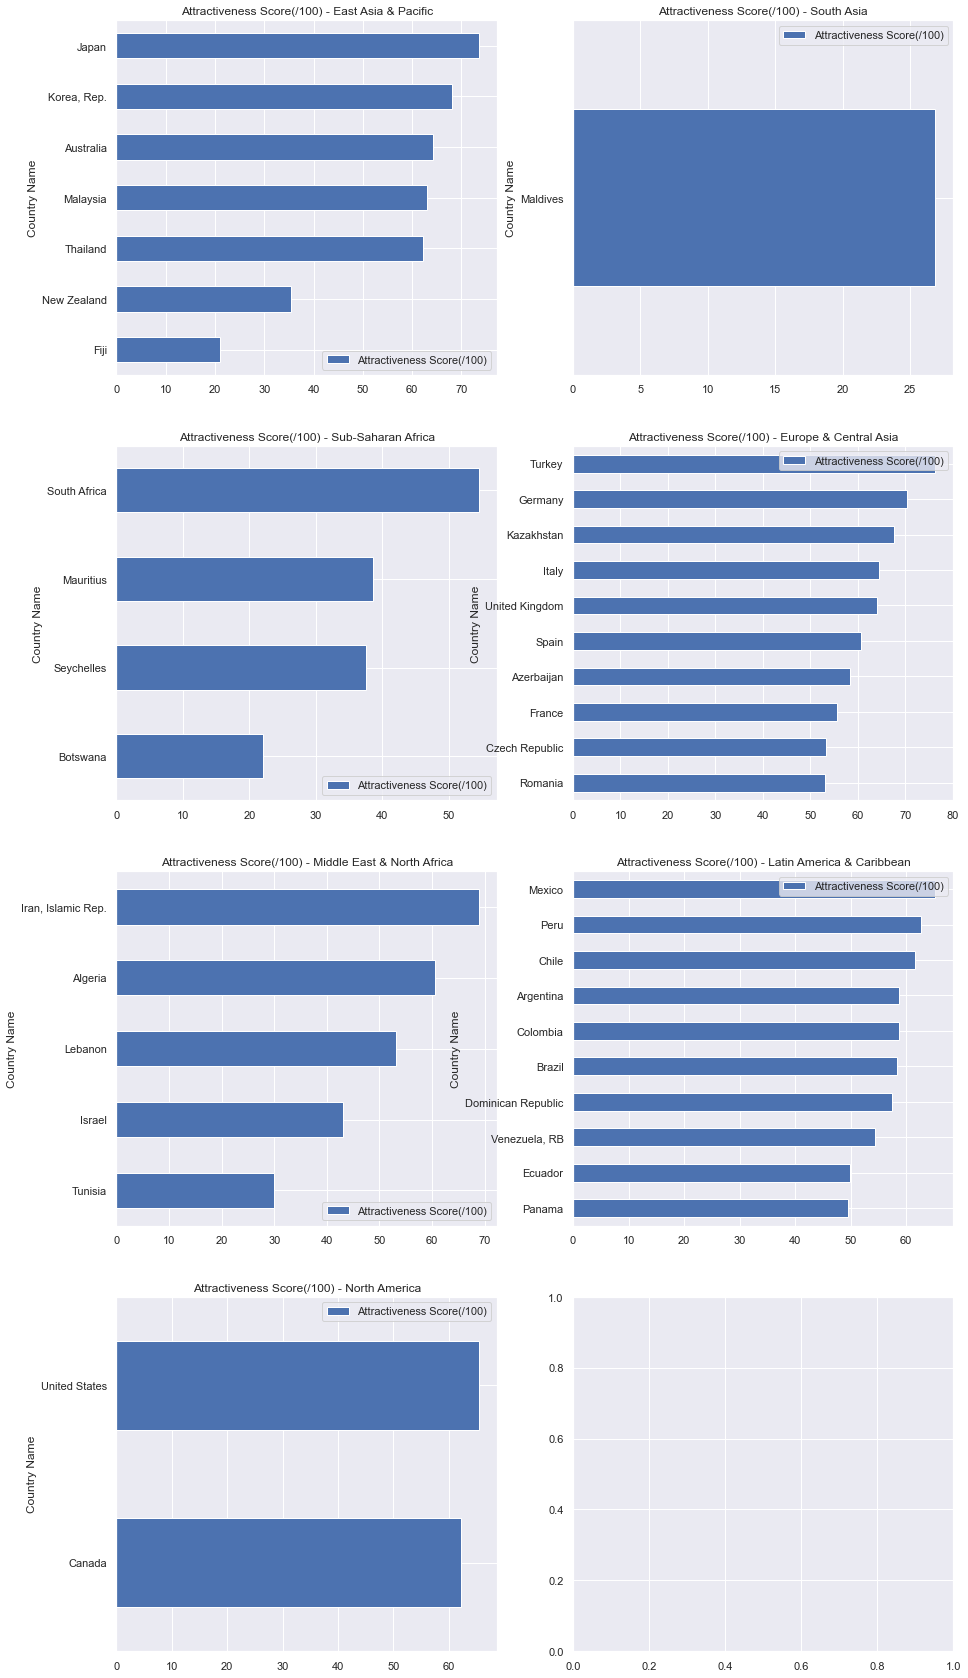

In [279]:
#Sublot
nrows = 4
ncols = 2
fig5, axes5 = plt.subplots(nrows = nrows, ncols = ncols, figsize = (15, 30))

# Plot
nrows_ = 0
ncols_ = 0
i = 0
    
for nrows_ in range(nrows) :
    for ncols_ in range(ncols) :
        if i < len(list_df_by_region) :  
            (
            list_df_general_percentile_by_region[i]["Attractiveness Score(/100)"]
                .head(10)
                .reset_index('Country Code')
                .plot(kind = "barh",                    
                           title = 'Attractiveness Score(/100)' + ' - ' + list_regions[i], 
                           ax = axes5[nrows_][ncols_])
                .invert_yaxis()                                                             
            )

        i = i + 1 
        ncols_ = ncols_ + 1
    nrows_ = nrows_ + 1  
plt.show()


In [280]:
#

# Following .csv files (EdStatsFootNote.csv, EdStatsCountry-Series.csv, EdStatsSeries.csv) have been ignored in our analysis either because they had non numerical data thus hardly 
# exploitables (DESCRIPTION, Source,...), either because these indicators were already present in other files (Country Code,...) or  because these indicators were not relevant for our study
# (SeriesCode,...)

#

# EdStatsFootNote.csv (IGNORED)

## Initial analysis

In [281]:
df_edstats_country_footnote = create_dataframe_from_csv_file("EdStatsFootNote.csv")
df_edstats_country_footnote

643638 rows in dataframe
5 columns in dataframe
Index(['CountryCode', 'SeriesCode', 'Year', 'DESCRIPTION', 'Unnamed: 4'], dtype='object')


CountryCode      SeriesCode    Year  \
0              ABW  SE.PRE.ENRL.FE  YR2001   
1              ABW  SE.TER.TCHR.FE  YR2005   
2              ABW  SE.PRE.TCHR.FE  YR2000   
3              ABW  SE.SEC.ENRL.GC  YR2004   
4              ABW     SE.PRE.TCHR  YR2006   
...            ...             ...     ...   
643633         ZWE     SH.DYN.MORT  YR2007   
643634         ZWE     SH.DYN.MORT  YR2014   
643635         ZWE     SH.DYN.MORT  YR2015   
643636         ZWE     SH.DYN.MORT  YR2017   
643637         ZWE     SP.POP.GROW  YR2017   

                                   DESCRIPTION  Unnamed: 4  
0                          Country estimation.         NaN  
1                          Country estimation.         NaN  
2                          Country estimation.         NaN  
3                          Country estimation.         NaN  
4                          Country estimation.         NaN  
...                                        ...         ...  
643633       Uncertainty bound is 91.6 - 109.3         NaN  
643634          Uncertainty bound is 54.3 - 76         NaN  
643635        Uncertainty bound is 48.3 - 73.3         NaN  
643636  5-year average value between 0s and 5s         NaN  
643637  5-year average value between 0s and 5s         NaN  

[643638 rows x 5 columns]

<AxesSubplot:>

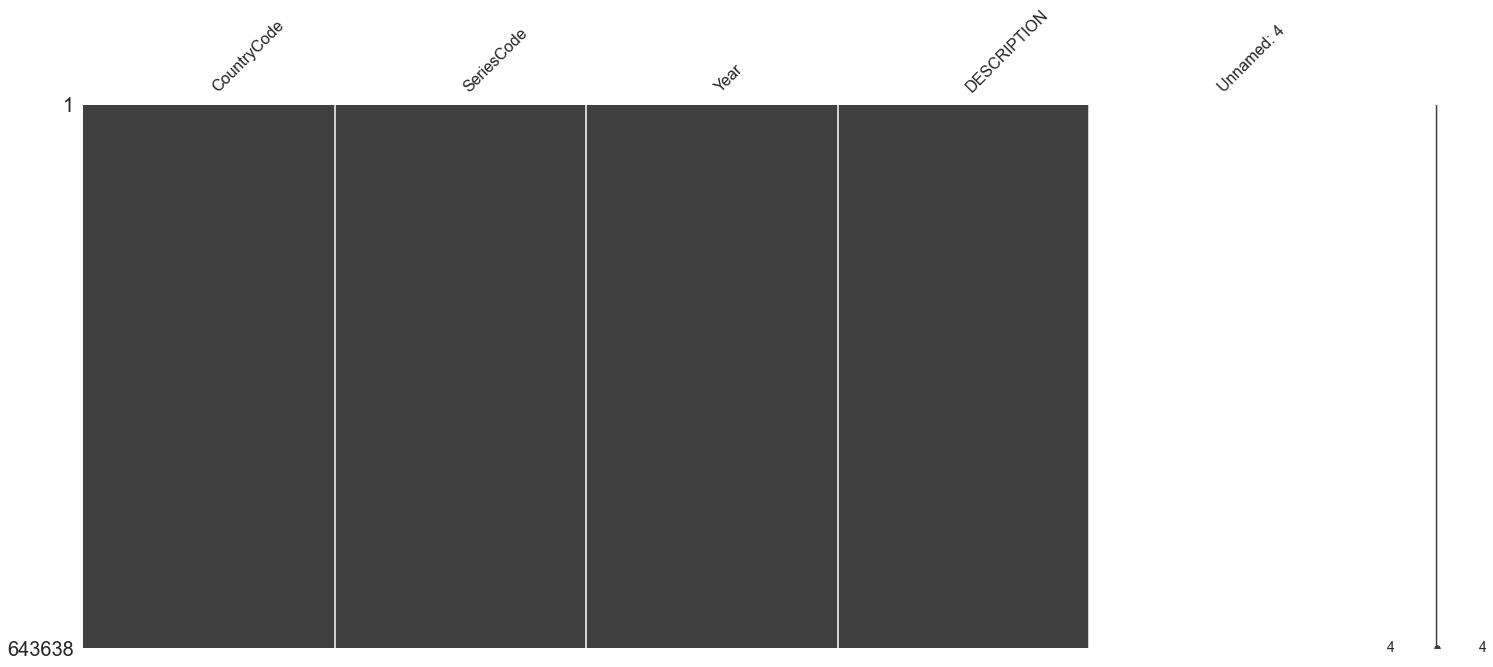

In [282]:
msno.matrix(df_edstats_country_footnote)

<AxesSubplot:>

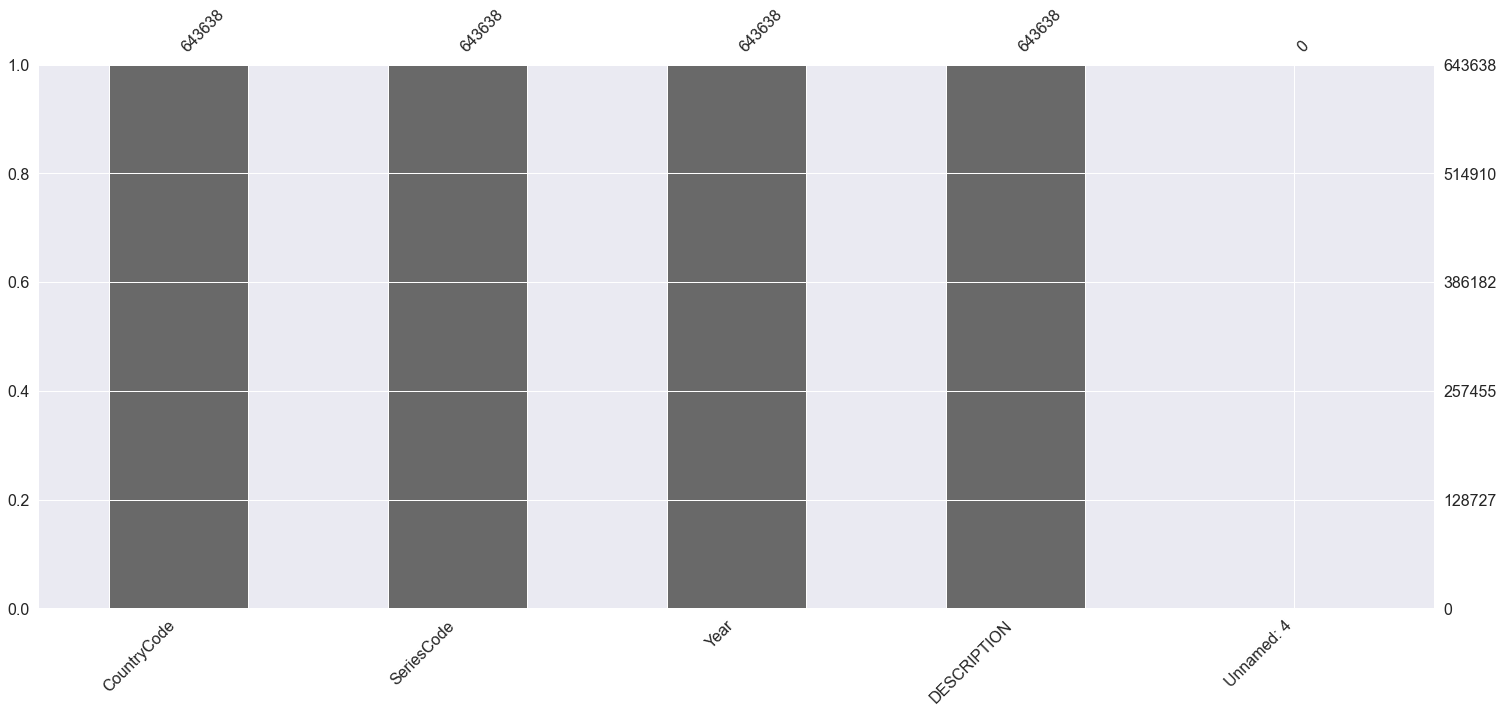

In [283]:
msno.bar(df_edstats_country_footnote)

# EdStatsCountry-Series.csv (IGNORED)

## Initial Analysis

In [284]:
df_edstats_country_series = create_dataframe_from_csv_file("EdStatsCountry-Series.csv")
df_edstats_country_series.head()

613 rows in dataframe
4 columns in dataframe
Index(['CountryCode', 'SeriesCode', 'DESCRIPTION', 'Unnamed: 3'], dtype='object')


CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  Unnamed: 3  
0  Data sources : United Nations World Population...         NaN  
1  Data sources: United Nations World Population ...         NaN  
2  Data sources: United Nations World Population ...         NaN  
3                 Estimates are based on regression.         NaN  
4  Data sources : United Nations World Population...         NaN

In [285]:
df_edstats_country_series.describe(include="all")

CountryCode   SeriesCode  \
count          613          613   
unique         211           21   
top            MDA  SP.POP.GROW   
freq            18          211   
mean           NaN          NaN   
std            NaN          NaN   
min            NaN          NaN   
25%            NaN          NaN   
50%            NaN          NaN   
75%            NaN          NaN   
max            NaN          NaN   

                                              DESCRIPTION  Unnamed: 3  
count                                                 613         0.0  
unique                                                 97         NaN  
top     Data sources : United Nations World Population...         NaN  
freq                                                  154         NaN  
mean                                                  NaN         NaN  
std                                                   NaN         NaN  
min                                                   NaN         NaN  
25%                                                   NaN         NaN  
50%                                                   NaN         NaN  
75%                                                   NaN         NaN  
max                                                   NaN         NaN

<AxesSubplot:>

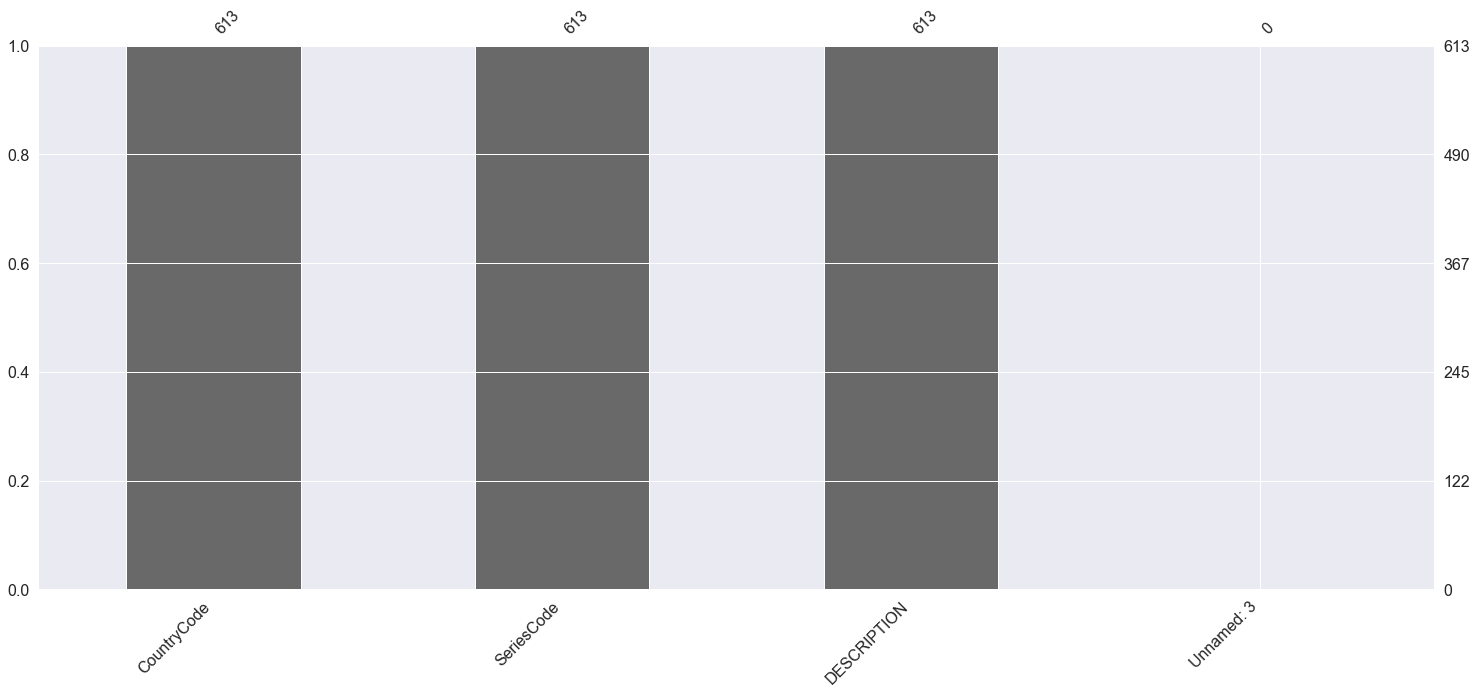

In [286]:
msno.bar(df_edstats_country_series.sample(613))

# EdStatsSeries.csv (IGNORED)

## Initial analysis

In [287]:
df_edstats_series = create_dataframe_from_csv_file("EdStatsSeries.csv")
df_edstats_series.head(10)

3665 rows in dataframe
21 columns in dataframe
Index(['Series Code', 'Topic', 'Indicator Name', 'Short definition',
       'Long definition', 'Unit of measure', 'Periodicity', 'Base Period',
       'Other notes', 'Aggregation method', 'Limitations and exceptions',
       'Notes from original source', 'General comments', 'Source',
       'Statistical concept and methodology', 'Development relevance',
       'Related source links', 'Other web links', 'Related indicators',
       'License Type', 'Unnamed: 20'],
      dtype='object')


Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   
5     BAR.NOED.2024.ZS  Attainment   
6  BAR.NOED.2529.FE.ZS  Attainment   
7     BAR.NOED.2529.ZS  Attainment   
8  BAR.NOED.25UP.FE.ZS  Attainment   
9     BAR.NOED.25UP.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   
5  Barro-Lee: Percentage of population age 20-24 ...   
6  Barro-Lee: Percentage of female population age...   
7  Barro-Lee: Percentage of population age 25-29 ...   
8  Barro-Lee: Percentage of female population age...   
9  Barro-Lee: Percentage of population age 25+ wi...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   
5  Percentage of population age 20-24 with no edu...   
6  Percentage of female population age 25-29 with...   
7  Percentage of population age 25-29 with no edu...   
8  Percentage of female population age 25+ with n...   
9  Percentage of population age 25+ with no educa...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   
5  Percentage of population age 20-24 with no edu...              NaN   
6  Percentage of female population age 25-29 with...              NaN   
7  Percentage of population age 25-29 with no edu...              NaN   
8  Percentage of female population age 25+ with n...              NaN   
9  Percentage of population age 25+ with no educa...              NaN   

  Periodicity Base Period Other notes Aggregation method  \
0         NaN         NaN         NaN                NaN   
1         NaN         NaN         NaN                NaN   
2         NaN         NaN         NaN                NaN   
3         NaN         NaN         NaN                NaN   
4         NaN         NaN         NaN                NaN   
5         NaN         NaN         NaN                NaN   
6         NaN         NaN         NaN                NaN   
7         NaN         NaN         NaN                NaN   
8         NaN         NaN         NaN                NaN   
9         NaN         NaN         NaN                NaN   

  Limitations and exceptions  Notes from original source General comments  \
0                        NaN                         NaN              NaN   
1                        NaN                         NaN              NaN   
2                        NaN                         NaN              NaN   
3                        NaN                         NaN              NaN   
4                        NaN                         NaN              NaN   
5                        NaN                         NaN              NaN   
6                        NaN                         NaN              NaN   
7                        NaN                         NaN              NaN   
8                        NaN                         NaN              NaN   
9                        NaN                         NaN              NaN   

                                             

<AxesSubplot:>

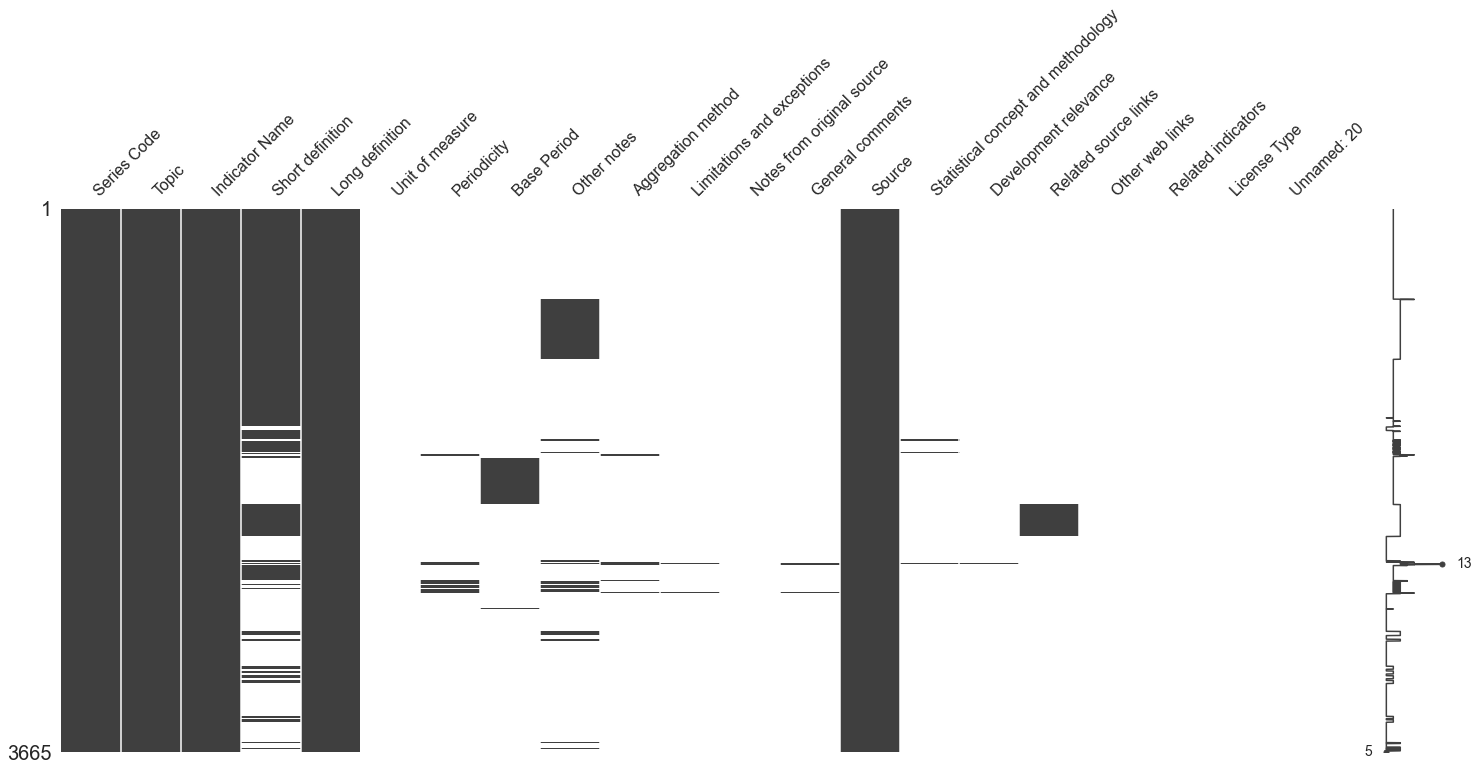

In [288]:
msno.matrix(df_edstats_series)

<AxesSubplot:>

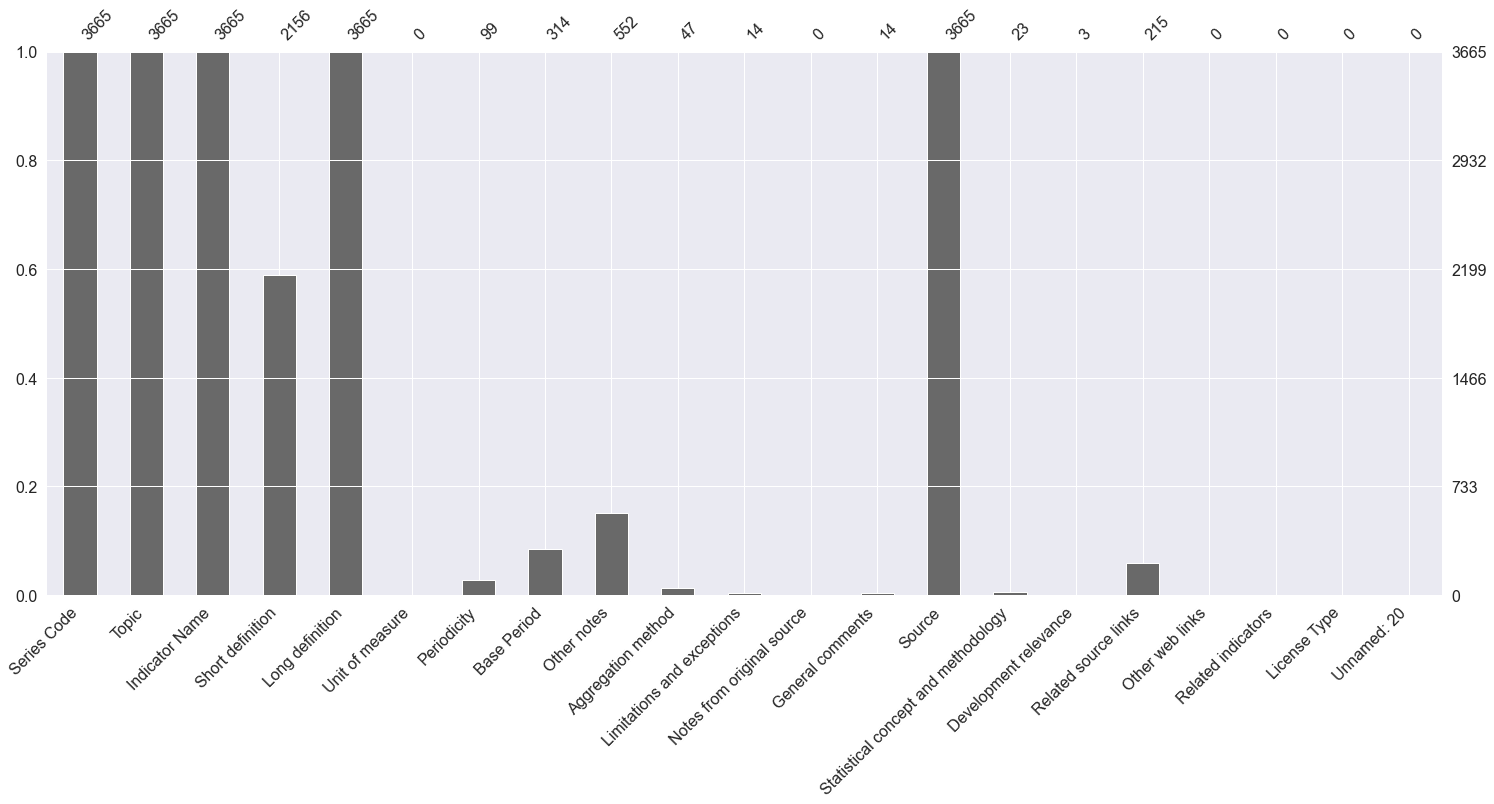

In [289]:
msno.bar(df_edstats_series)